# **Predict Earthquake Damage to Building in Nepal**

In conducting the analysis to build the predictive model, data collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, operating under the Nepal National Planning Commission Secretariat, were used. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on the earthquake's impact, household conditions, and socio-economic-demographic statistics.

# **Modelling Analysis**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance

## **Import Data**

In [ ]:
train_label = pd.read_csv(r"/content/drive/MyDrive/Earthquake Prediction project/train_labels.csv")
train_value = pd.read_csv(r"/content/drive/MyDrive/Earthquake Prediction project/train_values.csv")


## **Checking Data**

In [ ]:
print(f'Train Values: {train_value.shape}')
print(f'Train Labels: {train_label.shape}')



Train Values: (260601, 39)
Train Labels: (260601, 2)


In [ ]:
print("Train Values:",train_value.shape)

Train Values: (260601, 39)


In [ ]:
train_label.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [ ]:
train_value.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

## **Description Data**

**Feature Explanation**

The features contain data about the building structure and its legal ownership. Each row in the data represents a specific building in the earthquake-affected area.

There are 39 columns in the dataset, where the building_id column is unique and acts as an identifier. In the dataset, the same character appearing in different columns does not indicate the same actual value. The explanations of the 38 other features are:

1.	**geo_level_1_id, geo_level_2_id, geo_level_3_id** (int):
    These are hierarchical geographical identifiers, where:
	- **geo_level_1_id**: The largest geographical region (values from 0 to 30).
  - **geo_level_2_id**: A more specific sub-region (values from 0 to 1427).
  - **geo_level_3_id**: The most specific geographical area (values from 0 to 12567).
2.	**count_floors_pre_eq (int)**:
The number of floors the building had before the earthquake.
3.	**age (int)**:
The age of the building in years.
4.	**area_percentage (int)**:
Normalized area of the building’s footprint.
5.	**height_percentage (int)**:
Normalized height of the building.
6.	**land_surface_condition (categorical)**:
The surface condition of the land where the building is located. Possible values:
- n: Normal
- o: Obstructed
- t: Terraced
7.	**foundation_type (categorical)**:
The type of foundation used in the building. Possible values:
- h: Concrete
- i: Brick
- r: Mud
- u: Stone
- w: Other
8.	**roof_type (categorical)**:
The type of roof the building has. Possible values:
- n: Clay
- q: Sheet
- x: Other
9.	**ground_floor_type (categorical)**:
The material used for the ground floor. Possible values:
o	f: Mud
o	m: Brick
o	v: Wood
o	x: Cement
o	z: Other
10.	**other_floor_type (categorical)**:
The material used for floors above the ground floor. Possible values:
o	j: Wood
o	q: Brick
o	s: Cement
o	x: Other

11.	**position (categorical)**:
The position of the building relative to its neighbors. Possible values:
o	j: Attached
o	o: Corner
o	s: In-between
o	t: Independent
12.	**plan_configuration (categorical)**:
The architectural plan configuration of the building. Possible values:
- a: L-shape
- c: U-shape
- d: H-shape
- f: T-shape
- m: Rectangular
- n: Square
- o: Circular
- q: Irregular
- s: Polygonal
- u: Other
13.	**has_superstructure_adobe_mud (binary)**:
Indicates if the building’s superstructure was made of Adobe/Mud.
14.	**has_superstructure_mud_mortar_stone (binary)**:
Indicates if the superstructure was made of Mud Mortar - Stone.
15.	**has_superstructure_stone_flag (binary)**:
Indicates if the superstructure was made of Stone.
16.	**has_superstructure_cement_mortar_stone (binary)**:
Indicates if the superstructure was made of Cement Mortar - Stone.
17.**	has_superstructure_mud_mortar_brick (binary)**:
Indicates if the superstructure was made of Mud Mortar - Brick.
18.	**has_superstructure_cement_mortar_brick (binary)**:
Indicates if the superstructure was made of Cement Mortar - Brick.
19.	**has_superstructure_timber (binary)**:
Indicates if the superstructure was made of Timber.
20.	**has_superstructure_bamboo (binary)**:
Indicates if the superstructure was made of Bamboo.
21.	**has_superstructure_rc_non_engineered (binary)**:
Indicates if the superstructure was made of non-engineered reinforced concrete.
22.	**has_superstructure_rc_engineered (binary)**:
Indicates if the superstructure was made of engineered reinforced concrete.
23.	**has_superstructure_other (binary)**:
Indicates if the superstructure was made of other materials.
24.	**legal_ownership_status (categorical)**:
The legal ownership status of the land. Possible values:
- a: Owner-occupied
- r: Rented
- v: Informally owned
- w: Other
25.	**count_families (int)**:
The number of families living in the building.
26.	**has_secondary_use (binary)**:
Indicates if the building was used for any secondary purpose.
27.	**has_secondary_use_agriculture (binary)**:
Indicates if the building was used for agricultural purposes.
28.	**has_secondary_use_hotel (binary)**:
Indicates if the building was used as a hotel.
29.	**has_secondary_use_rental (binary)**:
Indicates if the building was used for rental purposes.
30.	**has_secondary_use_institution (binary)**:
Indicates if the building was used by an institution.
31.	**has_secondary_use_school (binary)**:
Indicates if the building was used as a school.
32.	**has_secondary_use_industry (binary)**:
Indicates if the building was used for industrial purposes.
33.	**has_secondary_use_health_post (binary)**:
Indicates if the building was used as a health post.
34.	**has_secondary_use_gov_office (binary)**:
Indicates if the building was used as a government office.
35.	**has_secondary_use_police (binary)**:
Indicates if the building was used as a police station.
36.	**has_secondary_use_other (binary)**:
Indicates if the building was used for any other secondary purpose.
Target Variable:
37.	**damage_grade (ordinal)**:
The damage grade represents the level of damage caused by the earthquake:
- 1: Low damage.
- 2: Medium damage.
- 3: Severe damage(PRCP-1015-EquakeDamageP…).







## **Data Preparation**
##### **Merge Feature and Label on Training Data**

In [ ]:
train = pd.merge(train_value, train_label)

In [ ]:
train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

#### **Check Null and Duplicate Data**

In [ ]:
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
legal_ownership_status                    0
count_families                            0
has_secondary_use                         0
has_secondary_use_agriculture             0
has_secondary_use_hotel                   0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school                  0
has_secondary_use_industry                0
has_secondary_use_health_post             0
has_secondary_use_gov_office              0
has_secondary_use_use_police              0
has_secondary_use_other                   0
damage_grade                              0
dtype: int64

To remove duplicate data, we can use .drop_duplicates(). Since the building_id column, which indicates the building ID, must be unique, we will remove any duplicate entries in that column.

In [ ]:
print('Size of data before dropping duplicates:', train.shape)
train = train.drop_duplicates(subset='building_id', keep='last')
print('Size of data after dropping duplicates:', train.shape)


Size of data before dropping duplicates: (260601, 40)
Size of data after dropping duplicates: (260601, 40)


There are no duplicate entries in the column. **`building_id`**

#### **Check Data Columns and Info**

In [ ]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

There are 32 columns in the data with an integer type and 8 columns with an object type.

### **Data for Numeric and Categorical**

#### **Numeric**

In [ ]:
train.select_dtypes(include=['int64']).columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'damage_grade'],
      dt

#### **Categorical**

In [ ]:
train.select_dtypes(include=['object']).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [ ]:
train.select_dtypes(exclude=['int64']).columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

### Summary Data

In [ ]:
train.describe()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        260601.000000  260601.000000    260601.000000      260601.000000   
mean              2.129723      26.535029         8.018051           5.434365   
std               0.727665      73.565937         4.392231           1.918418   
min               1.000000       0.000000         1.000000           2.000000   
25%               2.000000      10.000000         5.000000           4.000000   
50%               2.000000      15.000000         7.000000           5.000000   
75%               2.000000      30.000000         9.000000           6.000000   
max               9.000000     995.000000       100.000000          32.000000   

       has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  ...  \
count                 260601.000000                        260601.000000  ...   
mean                       0.088645                             0.761935  ...   
std                        0.284231                             0.425900  ...   
min                        0.000000                             0.000000  ...   
25%                        0.000000                             1.000000  ...   
50%                        0.000000                             1.000000  ...   
75%                        0.000000                             1.000000  ...   
max                        1.000000                             1.000000  ...   

       has_secondary_use_hotel  has_secondary_use_rental  \
count            260601.000000             260601.000000   
mean                  0.033626                  0.008101   
std                   0.180265                  0.089638   
min                   0.000000                  0.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                   1.000000                  1.000000   

       has_secondary_use_institution  has_secondary_use_school  \
count                  260601.000000             260601.000000   
mean                        0.000940                  0.000361   
std                         0.030647                  0.018989   
min                         0.000000                  0.000000   
25%                         0.000000                  0.000000   
50%                         0.000000                  0.000000   
75%                         0.000000                  0.000000   
max                         1.000000                  1.000000   

       has_secondary_use_industry  has_secondary_use_health_post  \
count               260601.000000                  260601.000000   
mean                     0.001071                       0.000188   
std                      0.032703                       0.013711   
min                      0.000000                       0.000000   
25%                      0.000000                       0.000000   
50%                      0.000000                       0.000000   
75%                      0.000000                       0.000000   
max                      1.000000                       1.000000   

       has_secondary_use_gov_office  has_secondary_use_use_police  \
count                 260601.000000                 260601.000000   
mean                 

Based on the descriptive statistics above, it appears that the average number of floors in the buildings is 2. The average age of the buildings is 26.53 years, with one very old building having an age of 995 years. This very old building can influence the average age of the buildings. The average area and height of the buildings are 8.01 m² for the area and 5.43 m for the height.

In [ ]:
train.describe(include='O')

land_surface_condition foundation_type roof_type ground_floor_type  \
count                  260601          260601    260601            260601   
unique                      3               5         3                 5   
top                         t               r         n                 f   
freq                   216757          219196    182842            209619   

       other_floor_type position plan_configuration legal_ownership_status  
count            260601   260601             260601                 260601  
unique                4        4                 10                      4  
top                   q        s                  d                      v  
freq             165282   202090             250072                 250939

## **Exploratory Data Analysis (EDA)**

In [ ]:
train['damage_grade'] = train['damage_grade'].astype('category')
train['damage_grade']

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: category
Categories (3, int64): [1, 2, 3]

In [ ]:
train['damage_grade'] = train['damage_grade'].replace({1:'Low', 2:'Medium', 3:'High'})
train['damage_grade']

0           High
1         Medium
2           High
3         Medium
4           High
           ...  
260596    Medium
260597      High
260598      High
260599    Medium
260600      High
Name: damage_grade, Length: 260601, dtype: category
Categories (3, object): ['Low', 'Medium', 'High']

In [ ]:
train['damage_grade'].unique()

['High', 'Medium', 'Low']
Categories (3, object): ['Low', 'Medium', 'High']

# **Univariate Analysis**

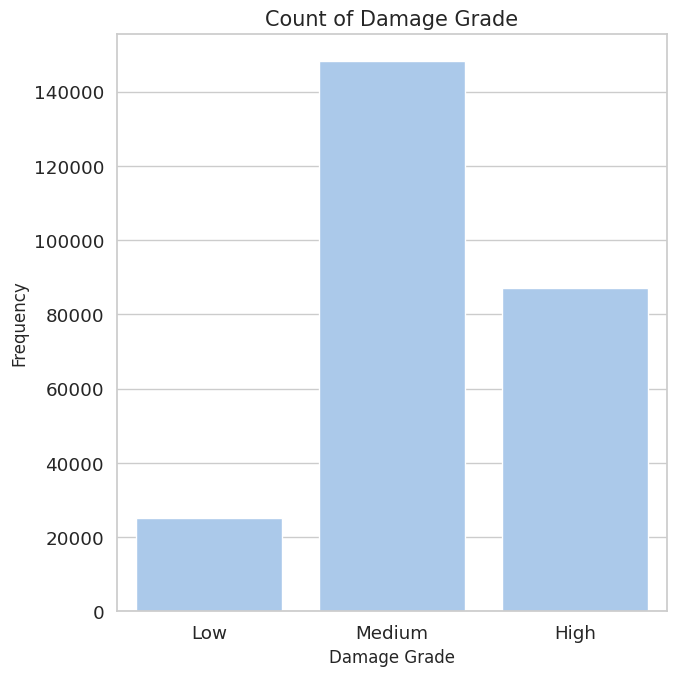

In [ ]:
plt.figure(figsize=(7,7))

sns.set_theme(style='whitegrid', palette='pastel', context='notebook', font_scale=1.2)
sns.countplot(x='damage_grade',data=train, order=['Low', 'Medium', 'High'])
plt.xlabel('Damage Grade', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Count of Damage Grade', fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
low_damage = sum(train['damage_grade'] == 'Low')
medium_damage = sum(train['damage_grade'] == 'Medium')
high_damage = sum(train['damage_grade'] == 'High')
total_buildings = len(train)

print(f'Number of buildings with low damage level: {low_damage}')
print(f'Number of buildings with medium damage level: {medium_damage}')
print(f'Number of buildings with high damage level: {high_damage}\n')

print(f'Percentage of buildings with low damage level: {low_damage / total_buildings * 100:.2f}%')
print(f'Percentage of buildings with medium damage level: {medium_damage / total_buildings * 100:.2f}%')
print(f'Percentage of buildings with high damage level: {high_damage / total_buildings * 100:.2f}%')



Number of buildings with low damage level: 25124
Number of buildings with medium damage level: 148259
Number of buildings with high damage level: 87218

Percentage of buildings with low damage level: 9.64%
Percentage of buildings with medium damage level: 56.89%
Percentage of buildings with high damage level: 33.47%


Based on the above graph, it appears that the number of buildings with a medium damage level is the highest at 56.89%, followed by buildings with a high damage level at 33.47%, and finally, buildings with a low damage level at 9.64%.

# **Bi-Variate Analysis**

#### **Check Between Feature and Label**

##### **Geo Level and Damage Grade**

In [ ]:
def plot_box(data, col_y, y_label, title, col_x = 'damage_grade', x_label = 'Damage Grade'):
    plt.figure(figsize=(7,7))
    sns.set_theme()
    sns.boxplot(x=col_x, y=col_y, data=data, order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

**1. Geo Level 1**

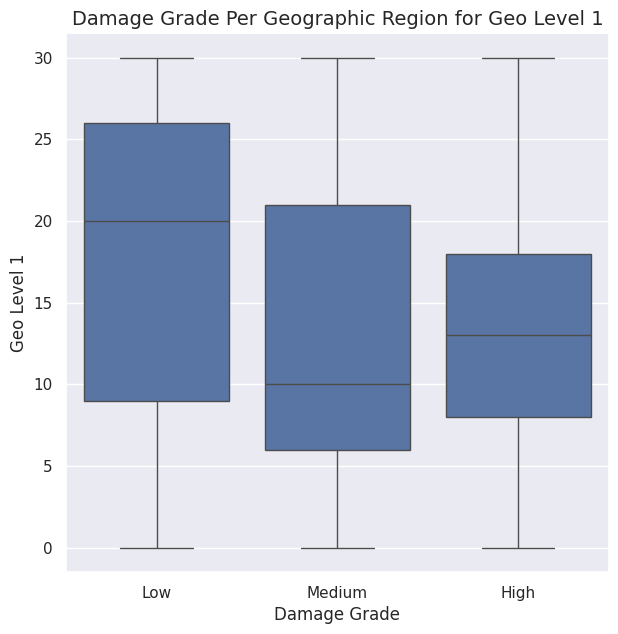

In [ ]:
plot_box(train, 'geo_level_1_id', 'Geo Level 1','Damage Grade Per Geographic Region for Geo Level 1')

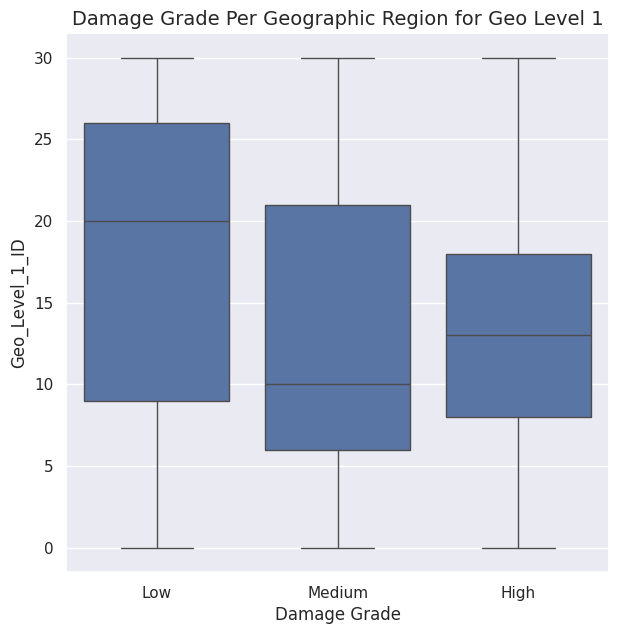

In [ ]:
plt.figure(figsize=(7,7))
sns.set_theme()
sns.boxplot(x='damage_grade', y='geo_level_1_id', data=train, order=['Low', 'Medium', 'High'])
plt.xlabel('Damage Grade', fontsize=12)
plt.ylabel('Geo_Level_1_ID', fontsize=12)
plt.title('Damage Grade Per Geographic Region for Geo Level 1', fontsize=14)
plt.show()

Based on the above graph, buildings located at geographic level 1 exhibit low, medium, and high damage levels. At geographic level 1, 75% of the buildings with low damage are situated at values ranging from 9 to 26, with values from 6 to 21 for medium damage, and values from 8 to 18 for high damage. Since geographic level 1 is the most extensive compared to other geographic levels, it appears that buildings at geographic level 1 with values from 8 to 18 experience more damage than those at other values.








**2. Geo Level 2**

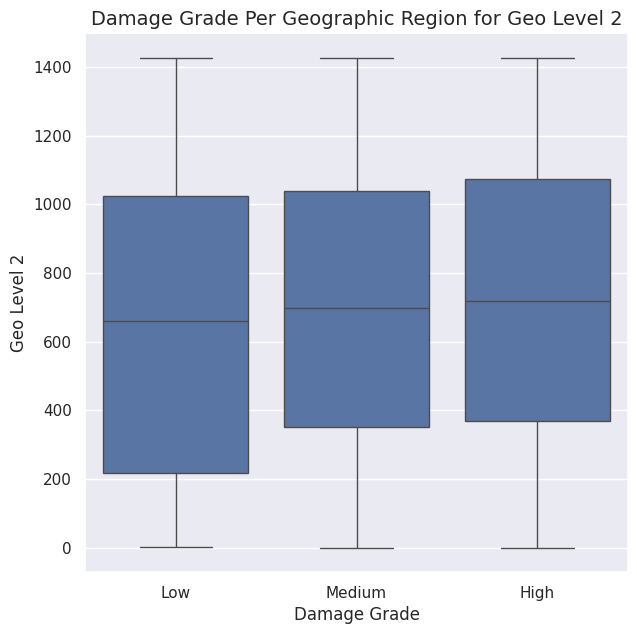

In [ ]:
plot_box(train, 'geo_level_2_id', 'Geo Level 2','Damage Grade Per Geographic Region for Geo Level 2')

Based on the above graph, buildings located at geographic level 2 exhibit low, medium, and high damage levels. At geographic level 2, 75% of the buildings with low damage are found at values ranging from 200 to 1100, with values from 350 to 1100 for medium damage and also from 350 to 1100 for high damage. Since geographic level 2 is a narrower geographic level compared to level 1, it appears that the distribution of damage among buildings at geographic level 2 is more similar across the three damage levels.

**3. Geo Level 3**

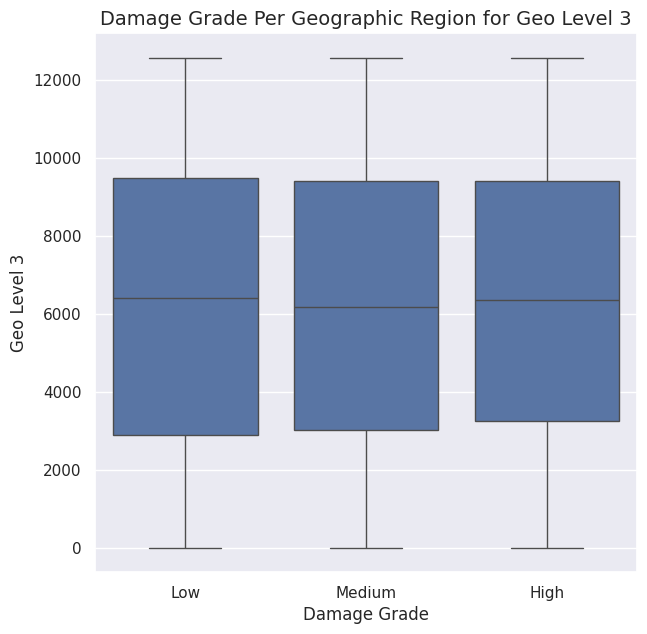

In [ ]:
plot_box(train, 'geo_level_3_id', 'Geo Level 3','Damage Grade Per Geographic Region for Geo Level 3')

Based on the above graph, buildings located at geographic level 3 exhibit low, medium, and high damage levels. Since geographic level 3 is a narrower geographic level compared to others, the buildings at geographic level 3 show nearly the same damage levels across all values.








#### **Number of Floor and Damage Grade**

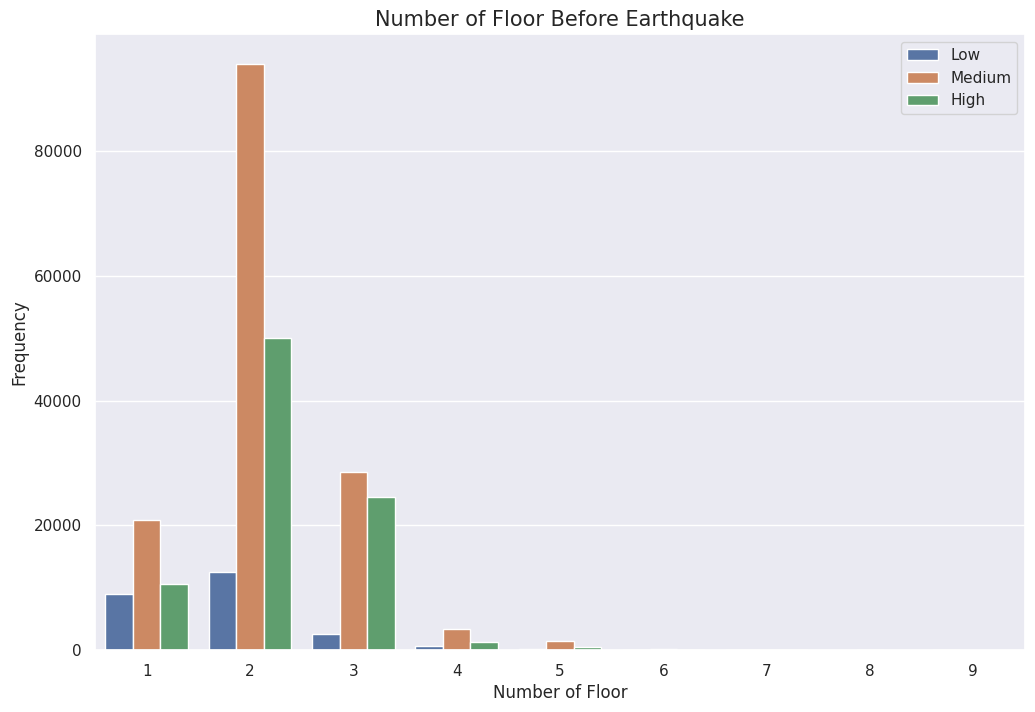

In [ ]:
plt.figure(figsize=(12,8))

sns.countplot(x='count_floors_pre_eq',data=train, hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Number of Floor', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Number of Floor Before Earthquake', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Buildings in Nepal that sustained damage from the earthquake have a diverse number of floors, ranging from buildings with 1 floor to those with 9 floors. The three most common types of buildings based on the number of floors are 2-floor buildings, followed by 3-floor and 1-floor buildings. It is observed that buildings with 2 floors experience a medium damage level, followed by high damage and then low damage. This pattern also applies to buildings with 3 floors and 1 floor.

#### **Age and Damage Grade**

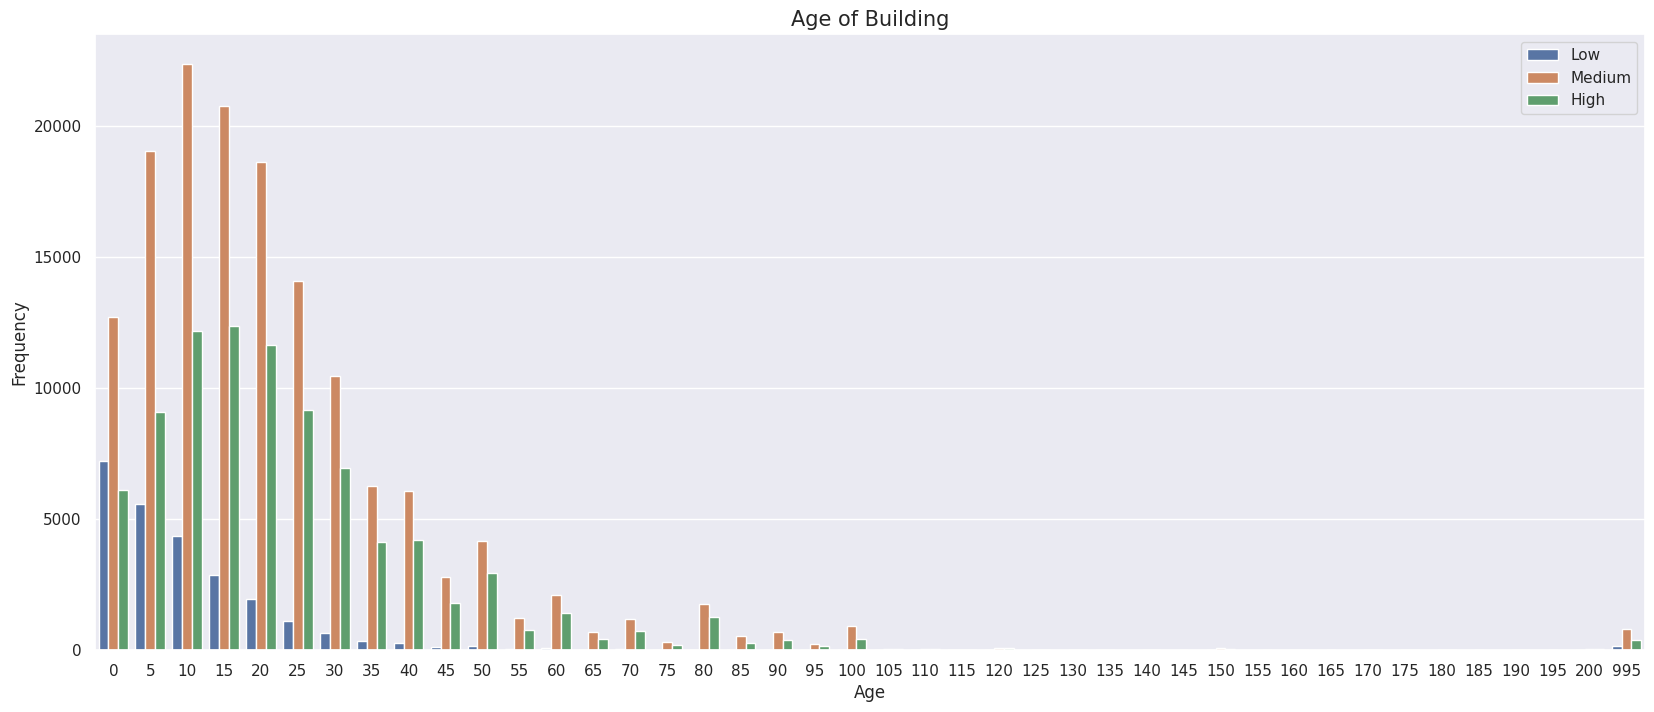

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(x='age',data=train, hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age of Building', fontsize=15)
plt.legend(loc='upper right')
plt.show()



In the above graph, it is observed that the age distribution of buildings ranges from 0 to 200 years, followed by a significant number of buildings aged over 950 years. Therefore, the plot will be divided into four segments: the range of 0-50 years, 51-100 years, 101-150 years, and over 150 years.

**1. Segment 1 (0 to 50 years old building)**

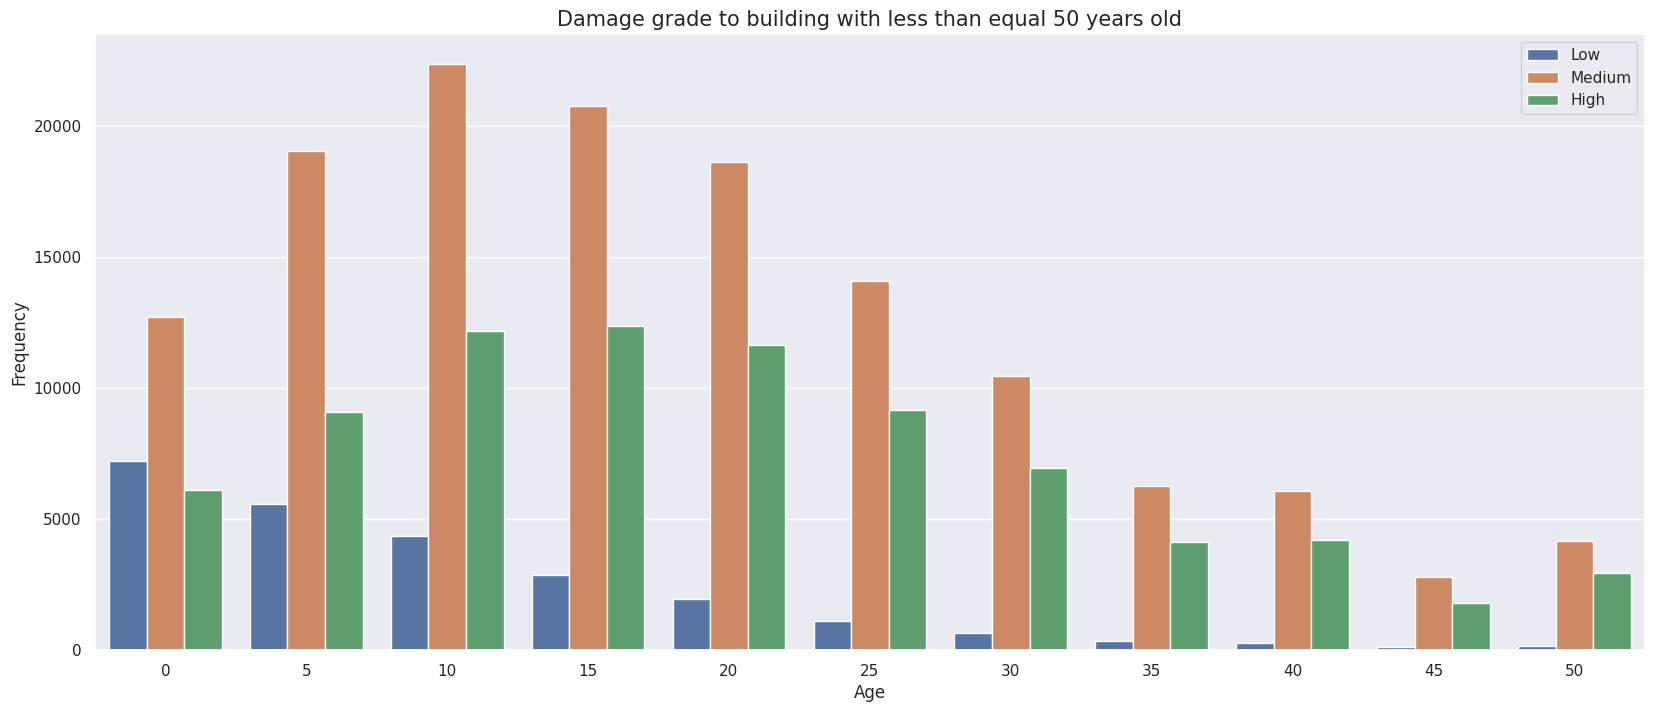

In [ ]:
plt.figure(figsize=(20,8))

segment_1_age = train[train['age']<=50]
sns.countplot(x='age',data=segment_1_age, hue=segment_1_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with less than equal 50 years old', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Based on the  above graph, it can be seen that for buildings aged between 0 and 50 years, the most common damage level is medium damage. In the age range of 0 to 40 years, there is a noticeable decline in the number of buildings with low damage.

**2. Segment 2 (51 to 100 years old building)**

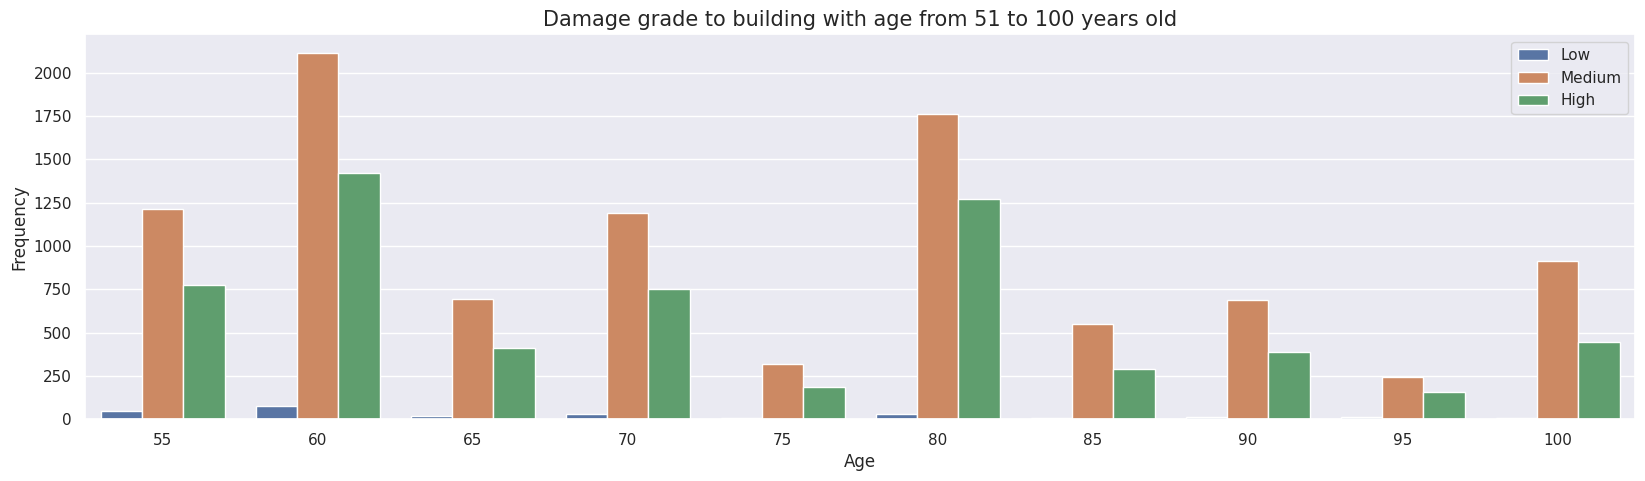

In [ ]:
plt.figure(figsize=(20,5))

segment_2_age = train[(train['age']>50) & (train['age']<=100)]
sns.countplot(x='age',data=segment_2_age, hue=segment_2_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with age from 51 to 100 years old', fontsize=15)
plt.legend(loc='upper right')
plt.show()

Based on the image above, it can be observed that for buildings aged between 51 and 100 years, the most common damage level is medium damage. In this age range, there are only a few buildings that experience low damage.








**3. Segment 3 (101 to 150 years old building)**

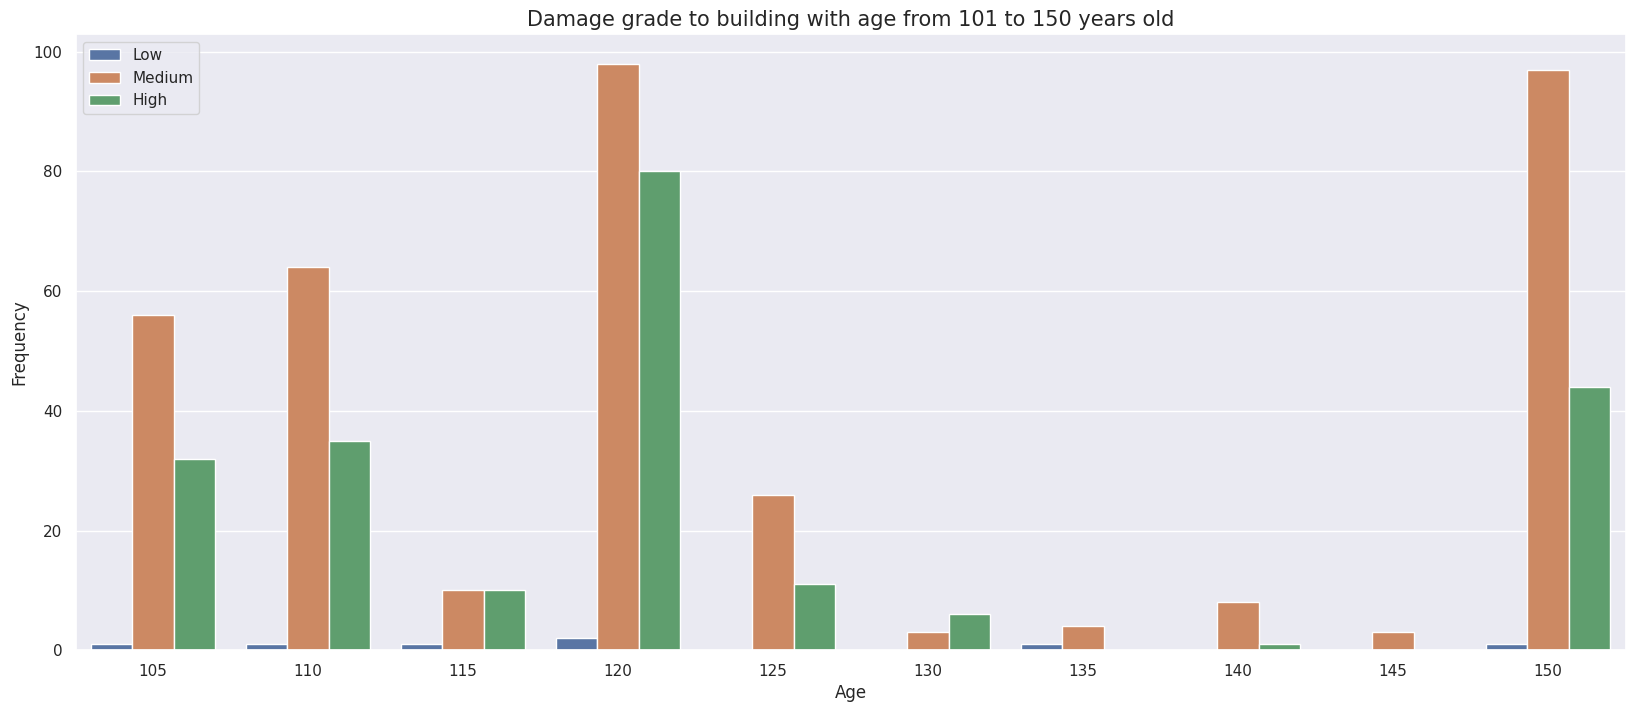

In [ ]:
plt.figure(figsize=(20,8))

segment_3_age = train[(train['age']>100) & (train['age']<=150)]
sns.countplot(x='age',data=segment_3_age, hue=segment_3_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with age from 101 to 150 years old', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Several buildings aged between 101 and 150 years are predominantly classified as having medium and high damage levels.

**4. Segment 4 (150 to 1000 years old building)**

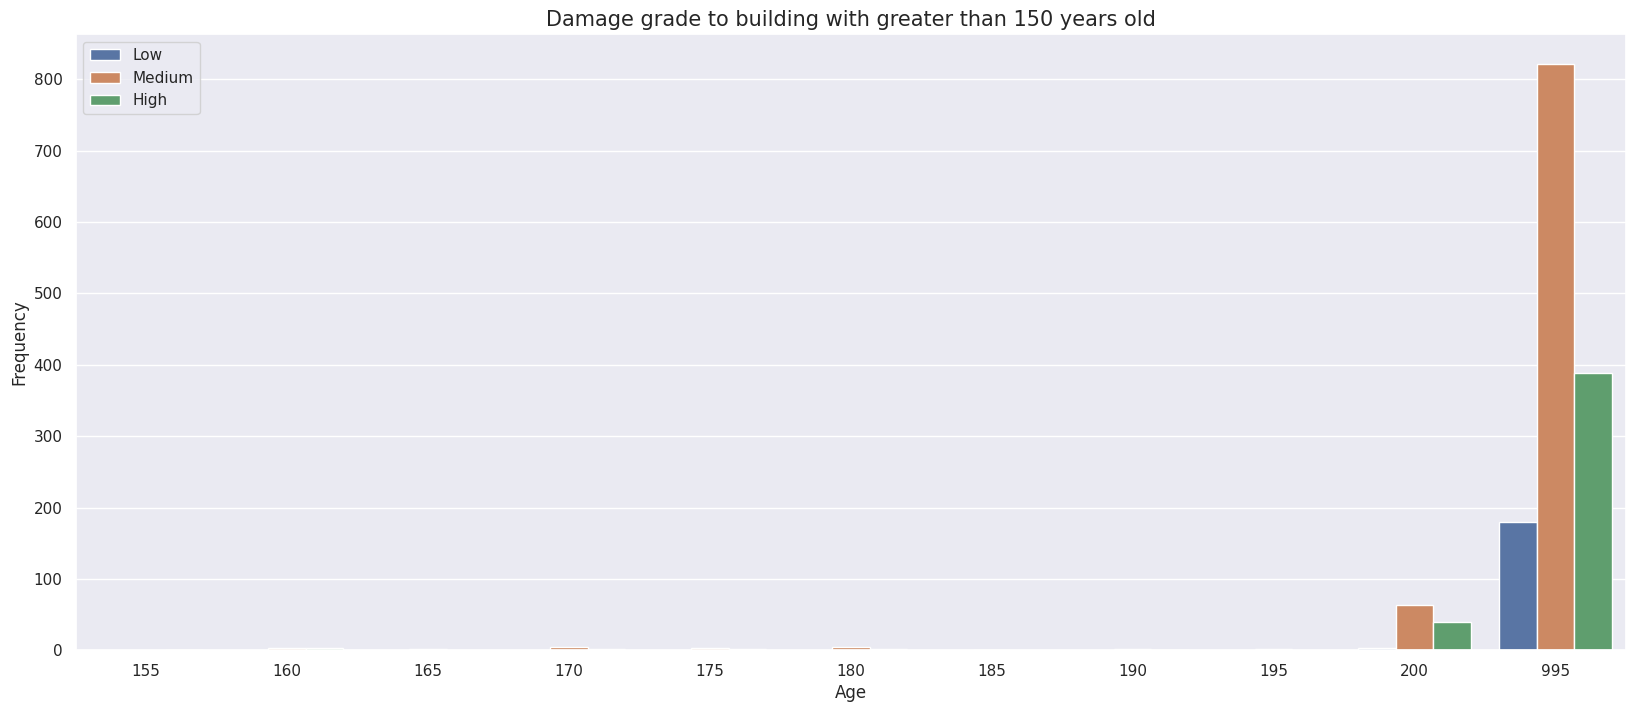

In [ ]:
plt.figure(figsize=(20,8))

segment_4_age = train[train['age']>150]
sns.countplot(x='age',data=segment_4_age, hue=segment_4_age['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage grade to building with greater than 150 years old', fontsize=15)
plt.legend(loc='upper left')
plt.show()

Based on the image above, there are buildings older than 200 years that experience low, medium, and high damage levels. Among them, there is a very old building aged 995 years, and many of these buildings exhibit medium damage.








#### **Area Percentage and Damage Grade**

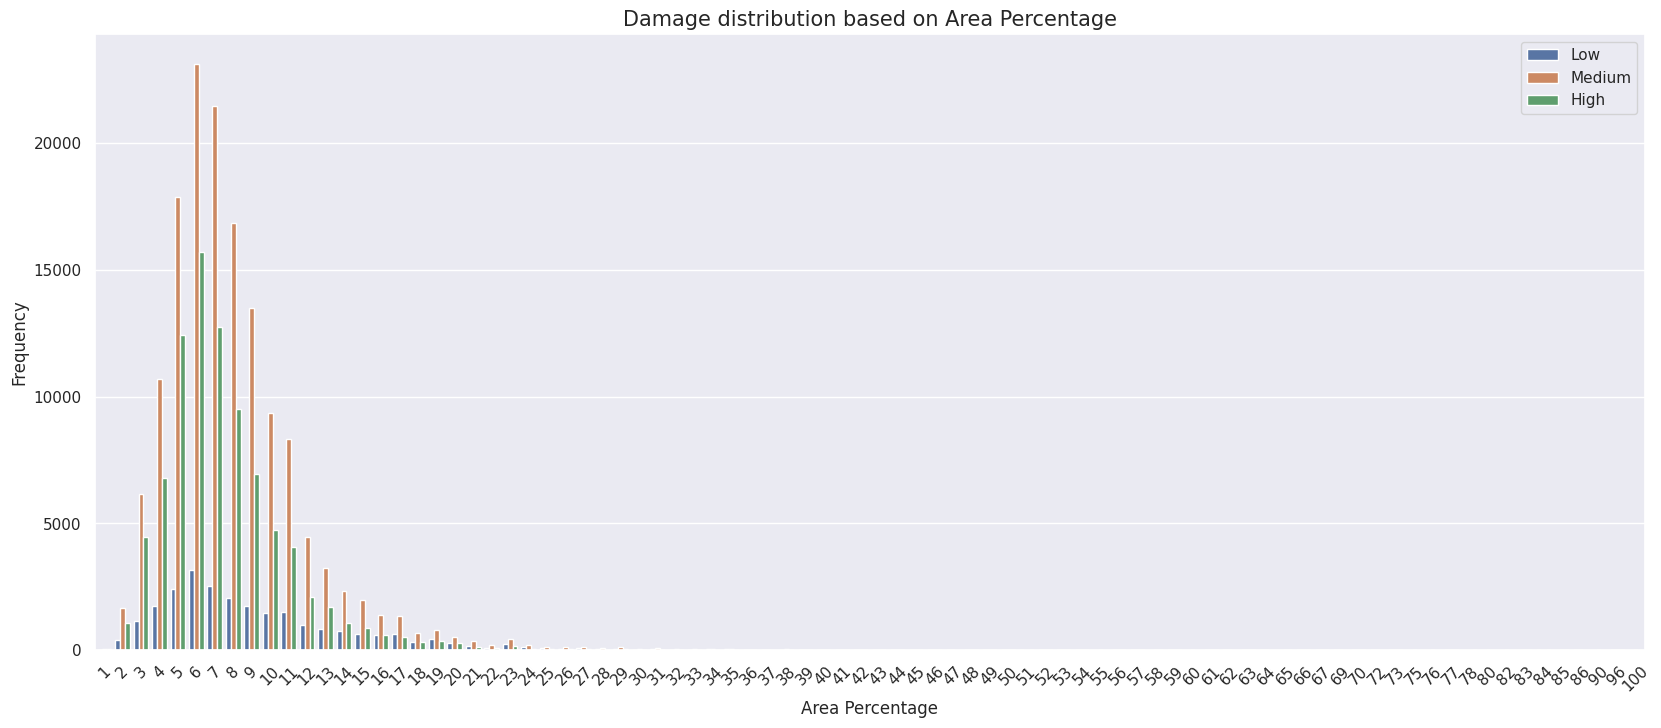

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(x='area_percentage',data=train, hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Area Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Area Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

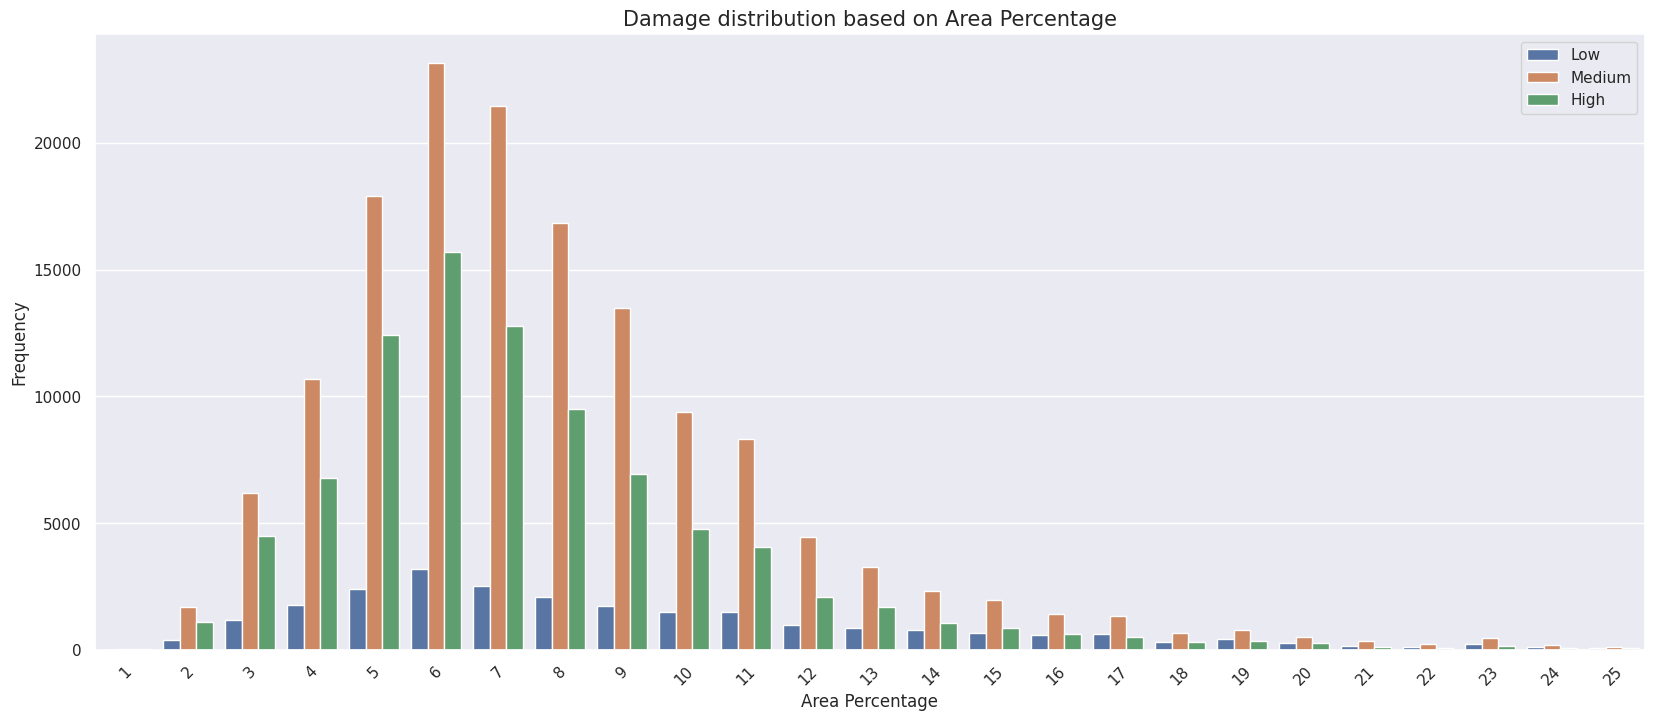

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(x='area_percentage',data=train[train["area_percentage"]<=25], hue='damage_grade', hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Area Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Area Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

It appears that many buildings in Nepal have an area percentage ranging from 1 to 20 m², and the majority of them experience medium damage due to the earthquake.

#### **Height Percentage and Damage Grade**

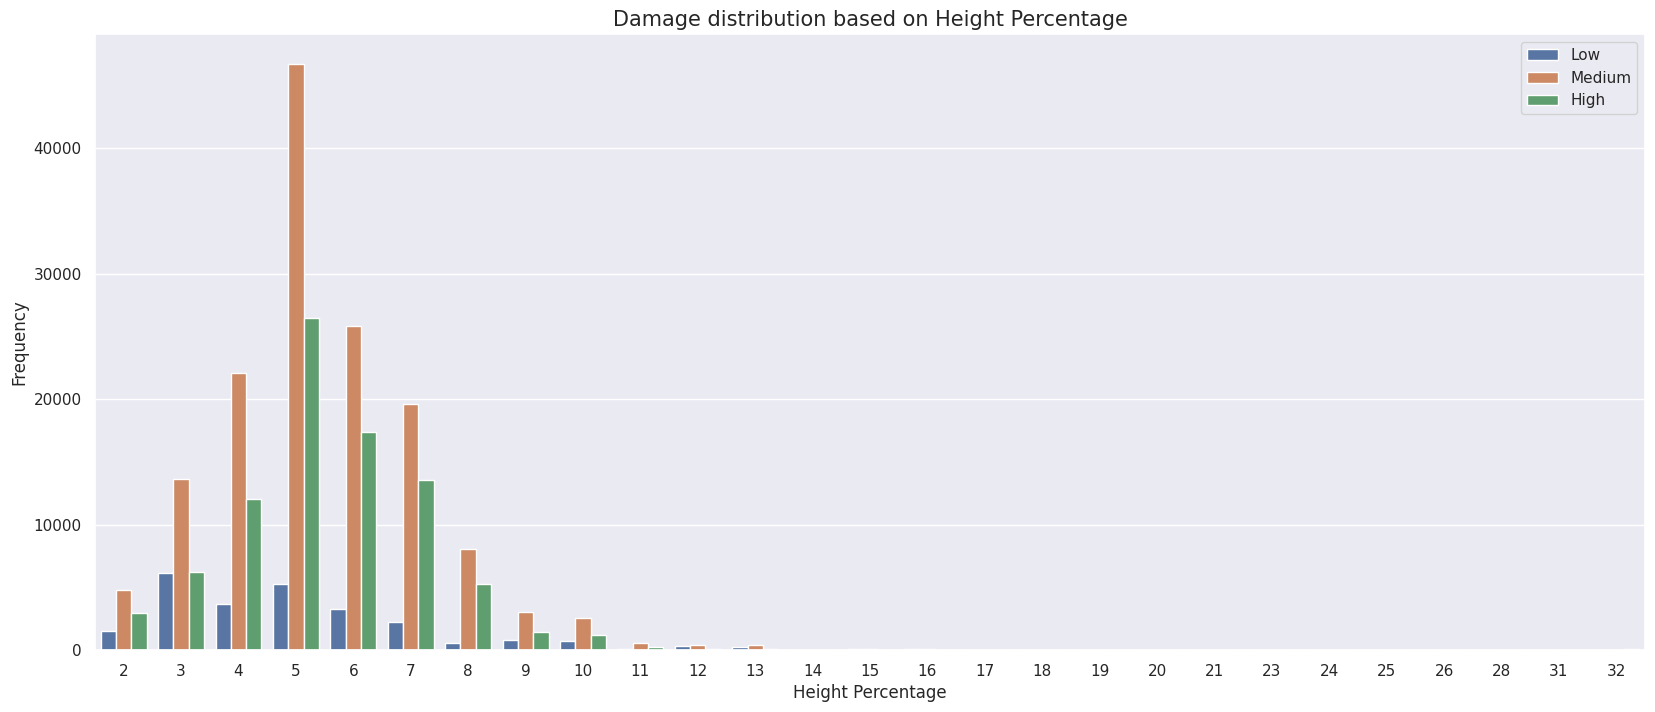

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(x='height_percentage',data=train, hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Height Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Height Percentage', fontsize=15)
plt.legend(loc='upper right')
plt.show()

The height of the buildings ranges from 2 to 10 m, and they predominantly experience medium damage due to the earthquake.

#### **Count Families and Damage Grade**

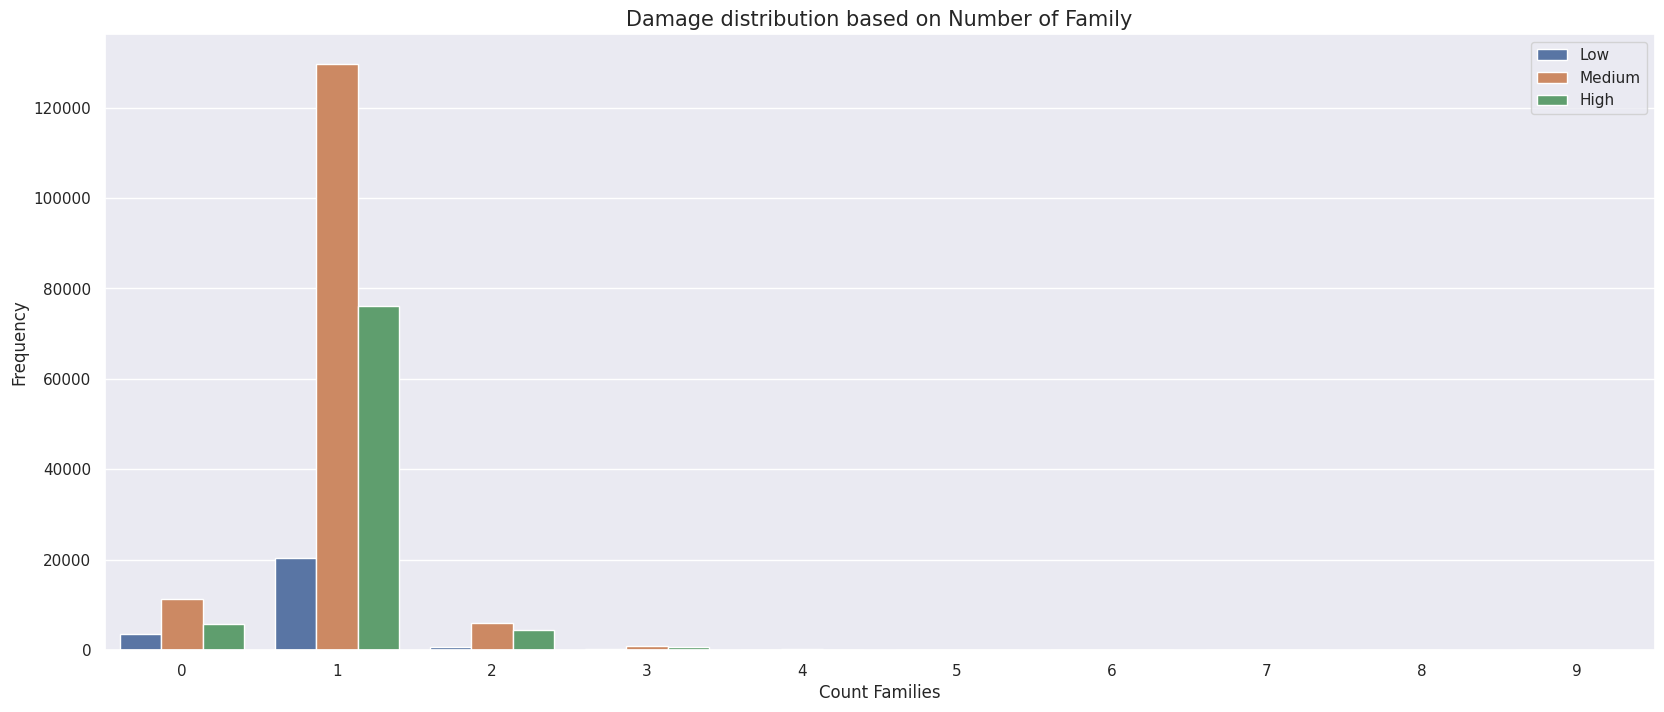

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(x='count_families',data=train, hue=train['damage_grade'], hue_order=['Low', 'Medium', 'High'])
plt.xlabel('Count Families', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Damage distribution based on Number of Family', fontsize=15)
plt.legend(loc='upper right')
plt.show()

The majority of buildings in Nepal affected by the earthquake are inhabited by 0 to 2 people. Buildings with 0 residents indicate that these structures are not private residences but rather public facilities that are not used for daily living.

#### **Land Surface Condition and Damage Grade**

In [ ]:
def cat_plot(data, col_x, x_label, col_y = 'damage_grade'):
    plt.figure(figsize=(10,4))

    sns.countplot(data=data,x=col_x, hue=data[col_y], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Damage distribution based on {}'.format(x_label), fontsize=15)
    plt.legend(loc='upper right')
    plt.show()

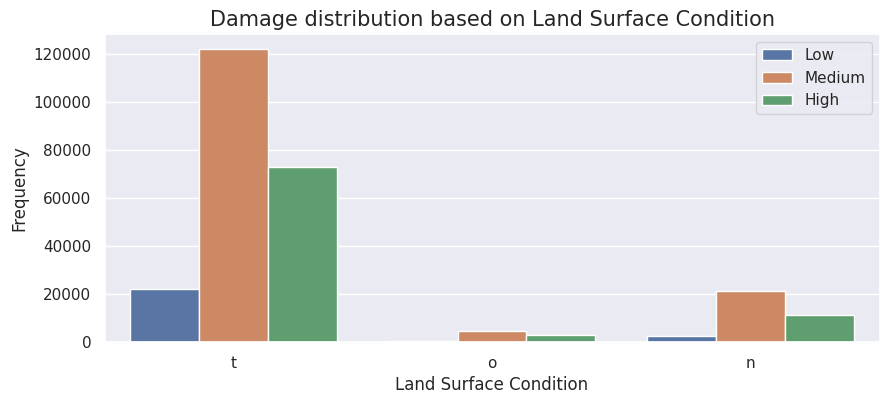

In [ ]:
cat_plot(train, 'land_surface_condition', 'Land Surface Condition')

Based on the image above, buildings in Nepal have a land surface condition categorized as 't', and this land surface condition influences the level of damage experienced by the buildings.

#### **Foundation Type and Damage Grade**

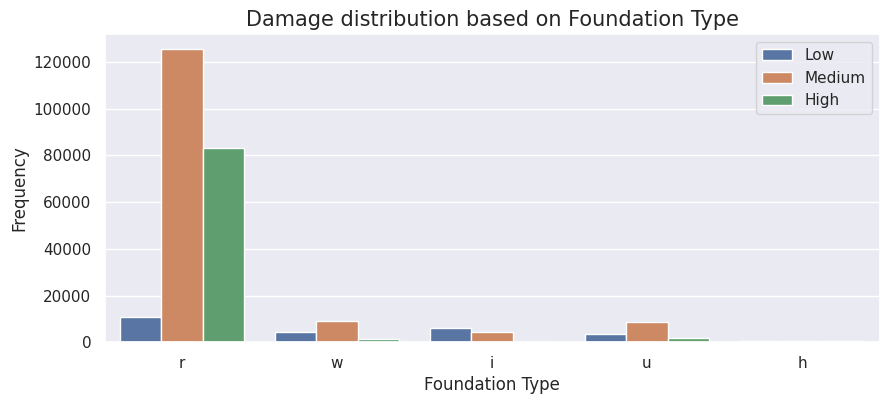

In [ ]:
cat_plot(train, 'foundation_type', 'Foundation Type')

Based on the image above, buildings with foundation type r have the highest quantity and significantly influence the level of damage occurring in the buildings.

#### **Roof Type and Damage Grade**

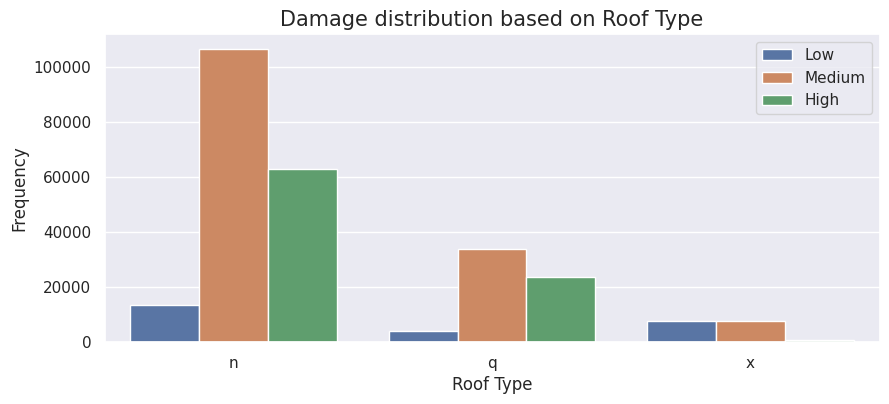

In [ ]:
cat_plot(train, 'roof_type', 'Roof Type')

Buildings with roof type n have the highest quantity and significantly influence the level of damage occurring in the buildings.

#### **Ground Floor Type and Damage Grade**

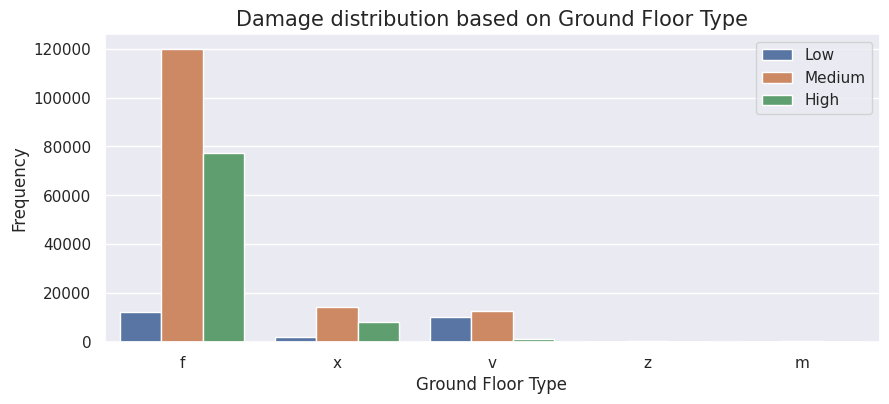

In [ ]:
cat_plot(train, 'ground_floor_type', 'Ground Floor Type')

Buildings with floor type f used on the ground floor have the highest quantity and significantly influence the level of damage occurring in the buildings.

#### **Other Floor Type and Damage Grade**

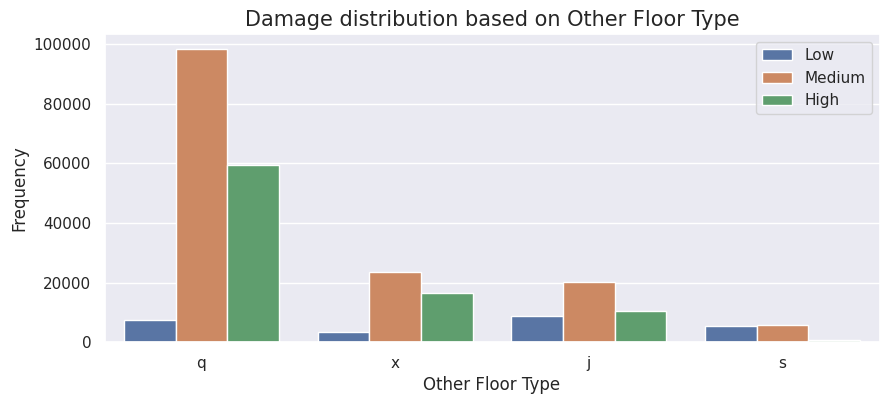

In [ ]:
cat_plot(train, 'other_floor_type', 'Other Floor Type')

Buildings with floor type q used on other floors predominantly experience moderate to high levels of damage..

#### **Position and Damage Grade**

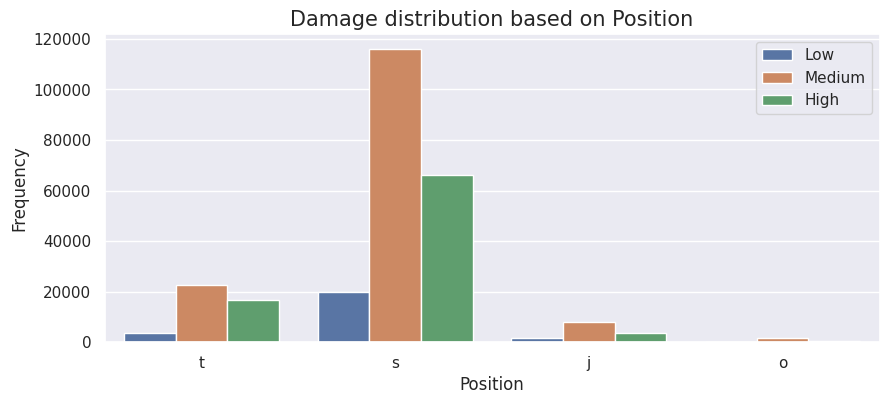

In [ ]:
cat_plot(train, 'position', 'Position')


Buildings in Nepal predominantly have position type s, and the majority experience moderate levels of damage due to earthquakes.

#### **Plan Configuration and Damage Grade**

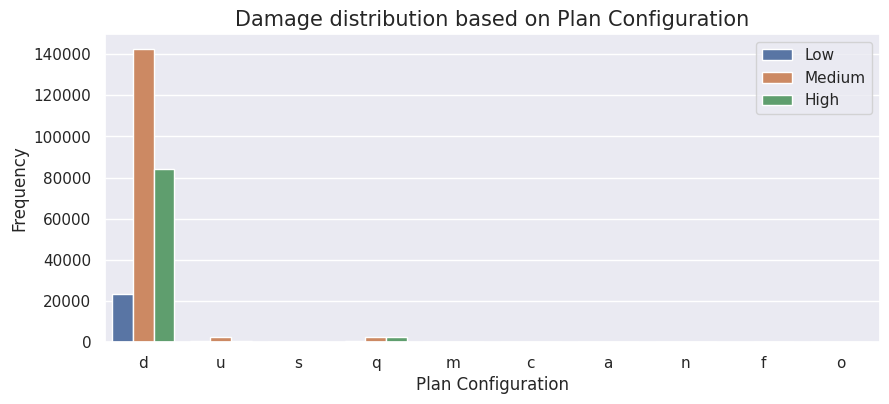

In [ ]:
cat_plot(train, 'plan_configuration', 'Plan Configuration')

Plan configuration* Buildings in Nepal are dominated by type d, with many experiencing moderate levels of damage.

#### **Legal Ownership and Damage Grade**


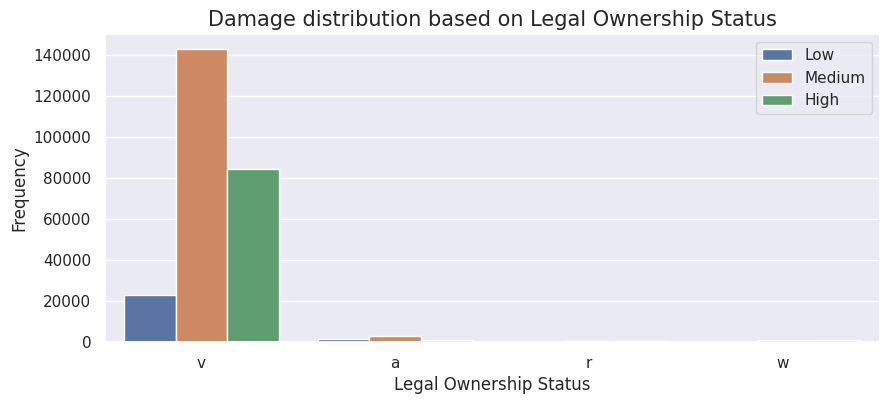

In [ ]:
cat_plot(train, 'legal_ownership_status', 'Legal Ownership Status')

The ownership status of buildings is dominated by type v, with many experiencing moderate levels of damage.








#### **Numerical Feature (Binary) and Damage Grade**

In [ ]:
def count_plot(data, col_x, x_label, title, col_y = 'damage_grade'):
    plt.figure(figsize=(10,4))

    p = sns.countplot(data=data,x=col_x, hue=data[col_y], hue_order=['Low', 'Medium', 'High'])
    plt.xlabel(x_label, fontsize=12)
    p.set_xticklabels(['No', 'Yes'])
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Damage distribution that has {}'.format(title), fontsize=15)
    plt.legend(loc='upper right')
    plt.show()

**Has Superstructure Adobe Mud**

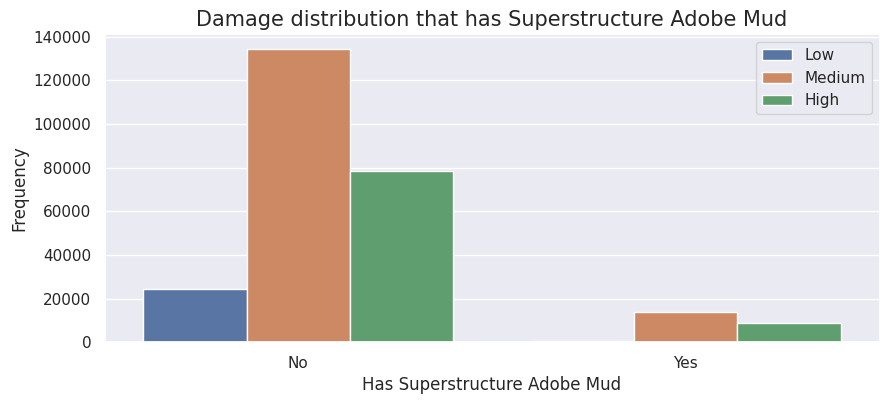

In [ ]:
count_plot(train, 'has_superstructure_adobe_mud', 'Has Superstructure Adobe Mud', 'Superstructure Adobe Mud')

**Has Superstructure Mud Mortar Stone**

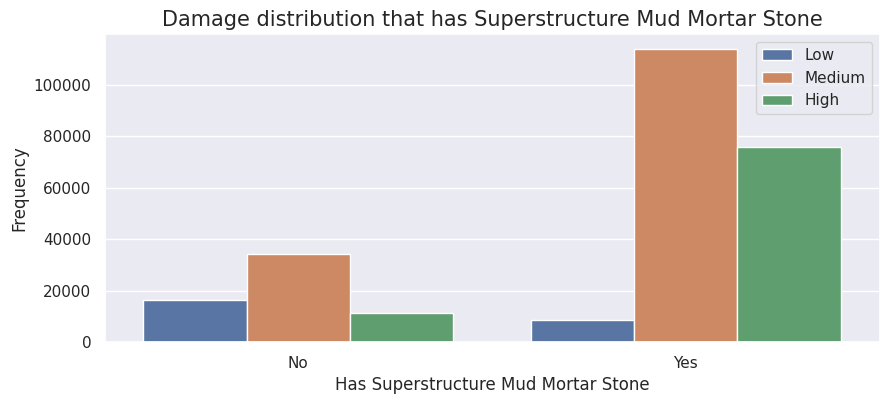

In [ ]:
count_plot(train, 'has_superstructure_mud_mortar_stone', 'Has Superstructure Mud Mortar Stone', 'Superstructure Mud Mortar Stone')

**Has Superstructure Stone Flag**

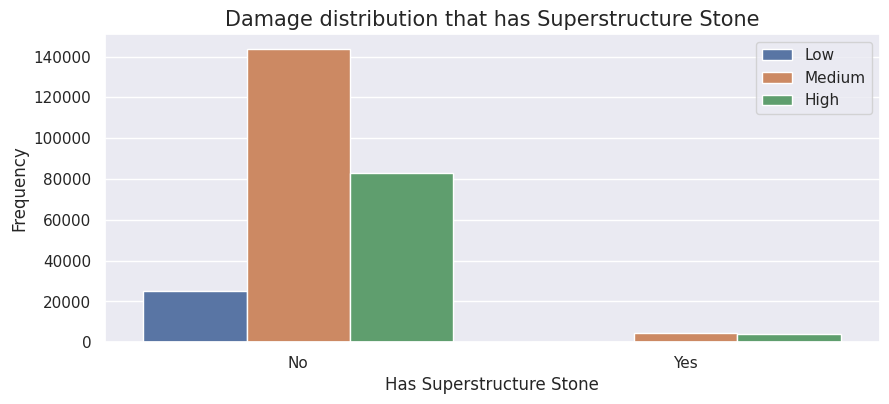

In [ ]:
count_plot(train, 'has_superstructure_stone_flag', 'Has Superstructure Stone', 'Superstructure Stone')

**Has Superstructure Cement Mortar Stone**

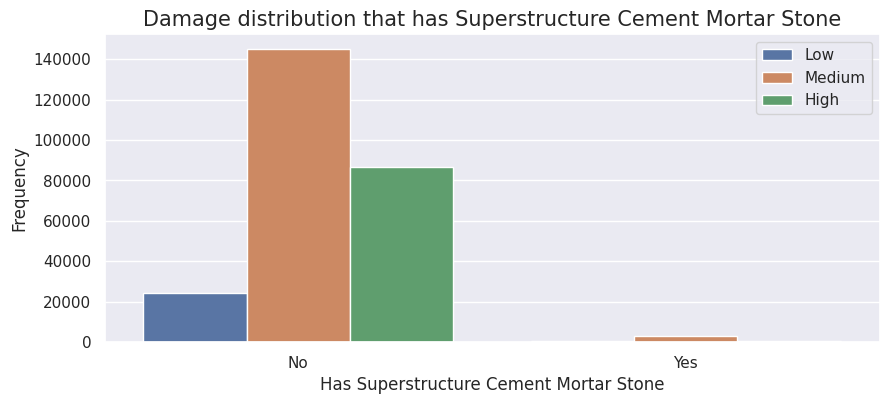

In [ ]:
count_plot(train, 'has_superstructure_cement_mortar_stone', 'Has Superstructure Cement Mortar Stone', 'Superstructure Cement Mortar Stone')

**Has Superstructure Mud Mortar Brick**

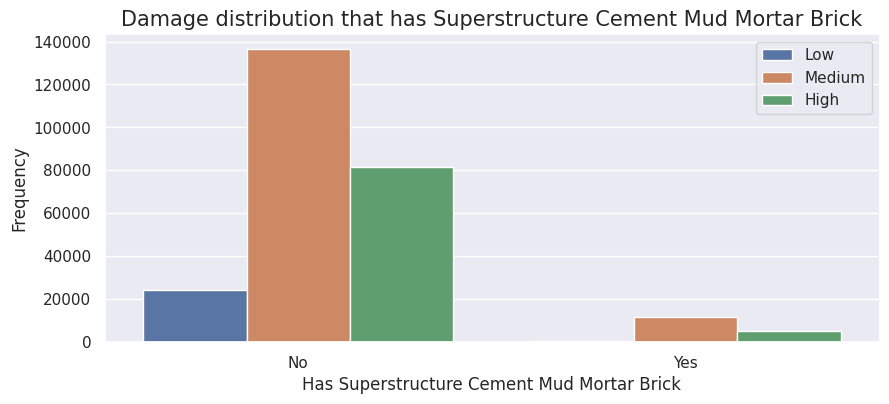

In [ ]:
count_plot(train, 'has_superstructure_mud_mortar_brick', 'Has Superstructure Cement Mud Mortar Brick', 'Superstructure Cement Mud Mortar Brick')

**Has Superstructure Cement Mortar Brick**

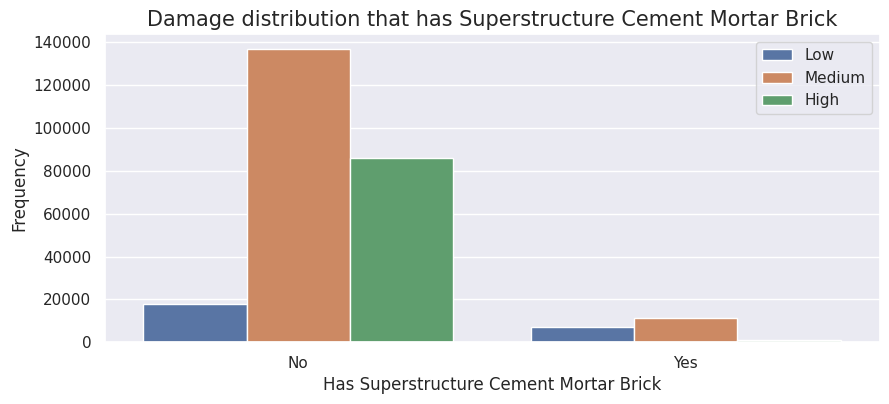

In [ ]:
count_plot(train, 'has_superstructure_cement_mortar_brick', 'Has Superstructure Cement Mortar Brick', 'Superstructure Cement Mortar Brick')

**Has Superstructure Timber**

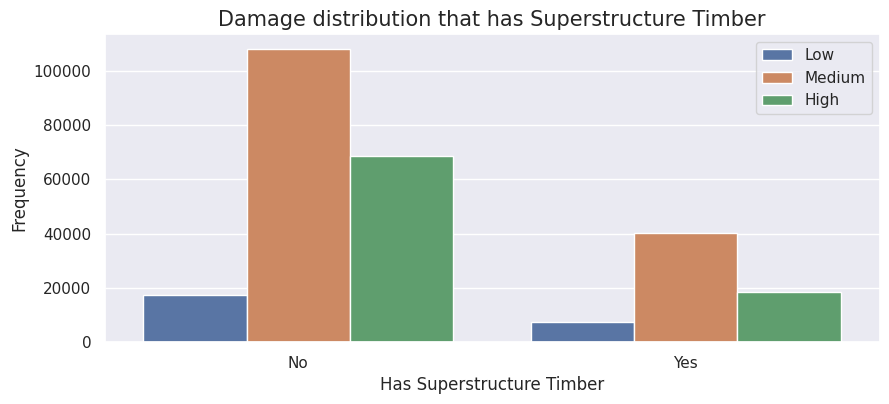

In [ ]:
count_plot(train, 'has_superstructure_timber', 'Has Superstructure Timber', 'Superstructure Timber')

**Has Superstructure Bamboo**

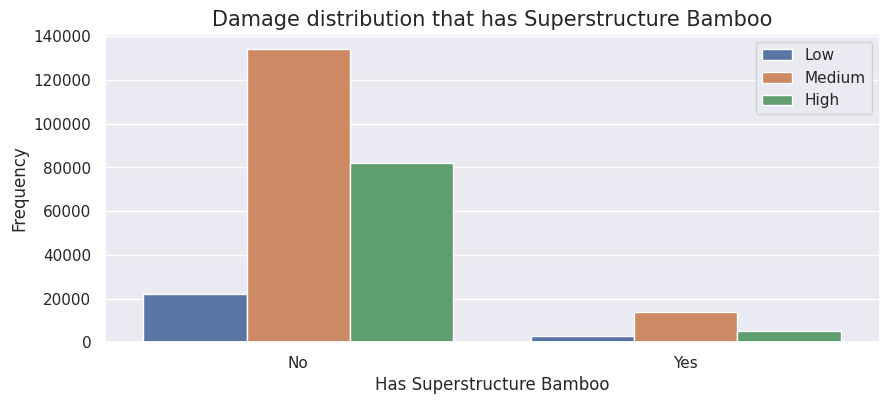

In [ ]:
count_plot(train, 'has_superstructure_bamboo', 'Has Superstructure Bamboo', 'Superstructure Bamboo')

**Has Superstructure RC Non Engineered**

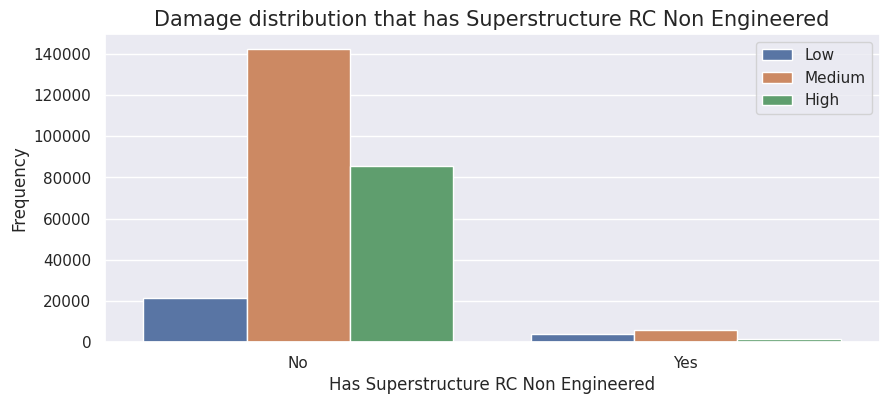

In [ ]:
count_plot(train, 'has_superstructure_rc_non_engineered', 'Has Superstructure RC Non Engineered', 'Superstructure RC Non Engineered')

**Has Superstructure RC Engineered**

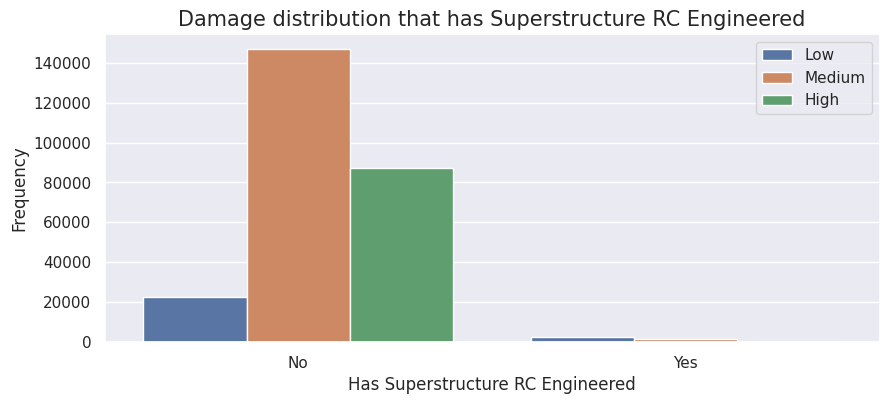

In [ ]:
count_plot(train, 'has_superstructure_rc_engineered', 'Has Superstructure RC Engineered', 'Superstructure RC Engineered')

**Has Superstructure Other**

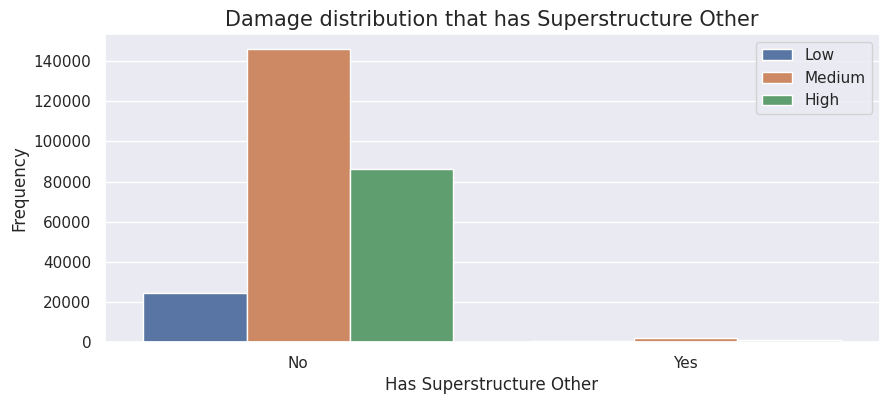

In [ ]:
count_plot(train, 'has_superstructure_other', 'Has Superstructure Other', 'Superstructure Other')

In buildings in Nepal, the most commonly used superstructure is a mixed superstructure of Mud Mortar Stone or Timber. Most of the buildings with these superstructures experience moderate levels of damage, followed by high levels of damage.

**Has Secondary Use**

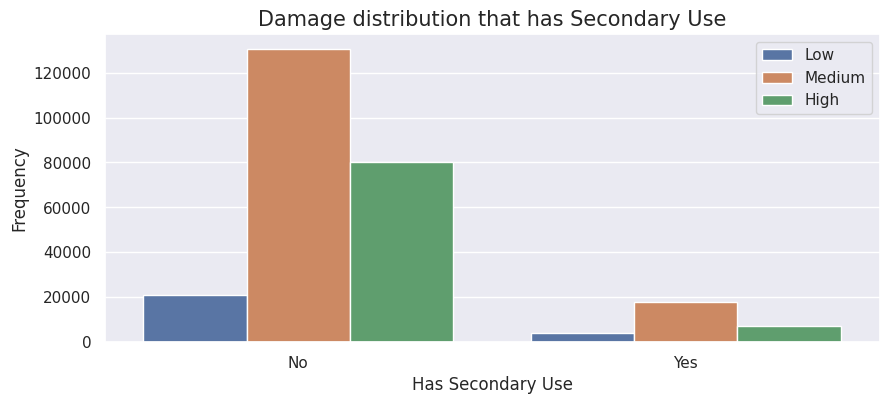

In [ ]:
count_plot(train, 'has_secondary_use', 'Has Secondary Use', 'Secondary Use')

**Has Secondary Use Agriculture**

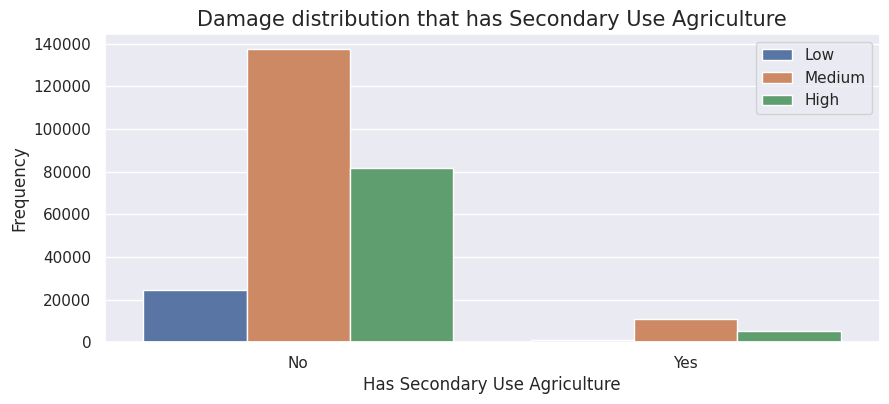

In [ ]:
count_plot(train, 'has_secondary_use_agriculture', 'Has Secondary Use Agriculture', 'Secondary Use Agriculture')

**Has Secondary Use Hotel**

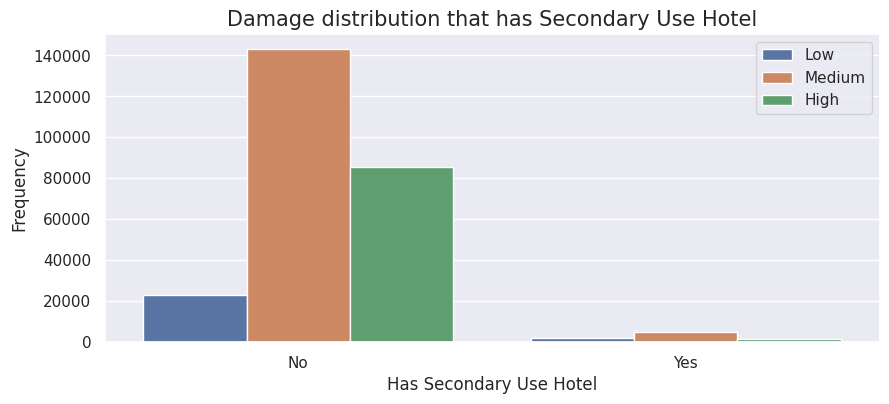

In [ ]:
count_plot(train, 'has_secondary_use_hotel', 'Has Secondary Use Hotel', 'Secondary Use Hotel')

**Has Secondary Use Rental**

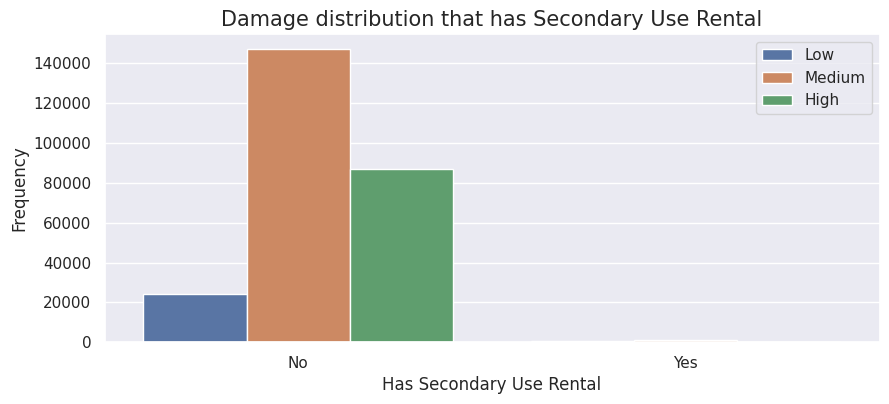

In [ ]:
count_plot(train, 'has_secondary_use_rental', 'Has Secondary Use Rental', 'Secondary Use Rental')

**Has Secondary Use Institution**

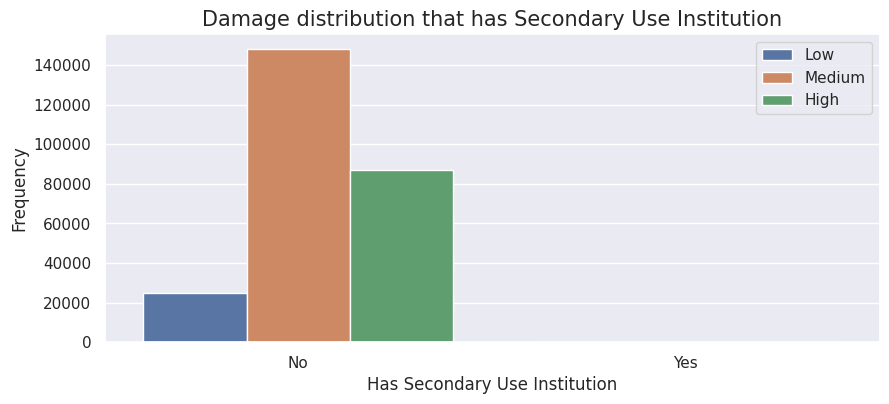

In [ ]:
count_plot(train, 'has_secondary_use_institution', 'Has Secondary Use Institution', 'Secondary Use Institution')

**Has Secondary Use School**

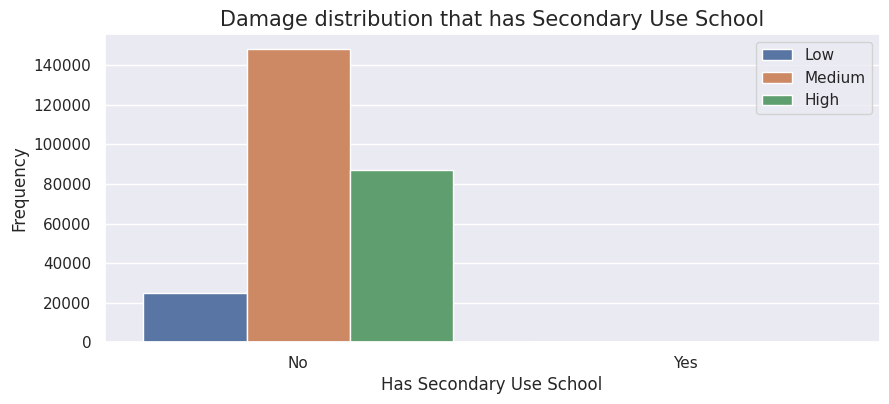

In [ ]:
count_plot(train, 'has_secondary_use_school', 'Has Secondary Use School', 'Secondary Use School')

**Has Secondary User Industry**

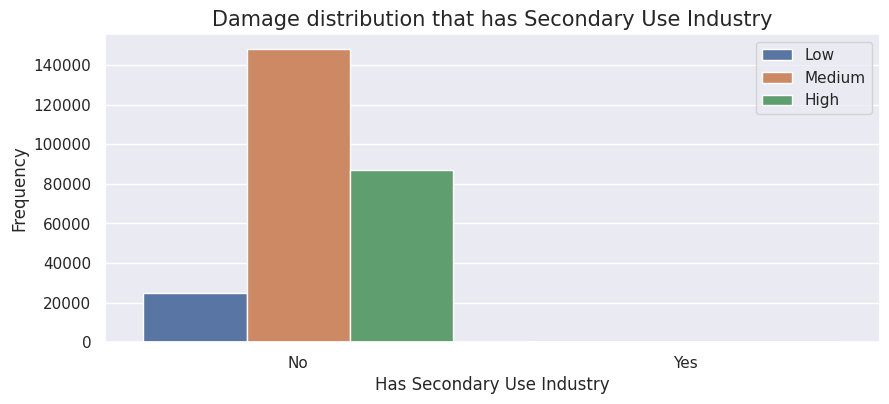

In [ ]:
count_plot(train, 'has_secondary_use_industry', 'Has Secondary Use Industry', 'Secondary Use Industry')

**Has Secondary Use Health Post**

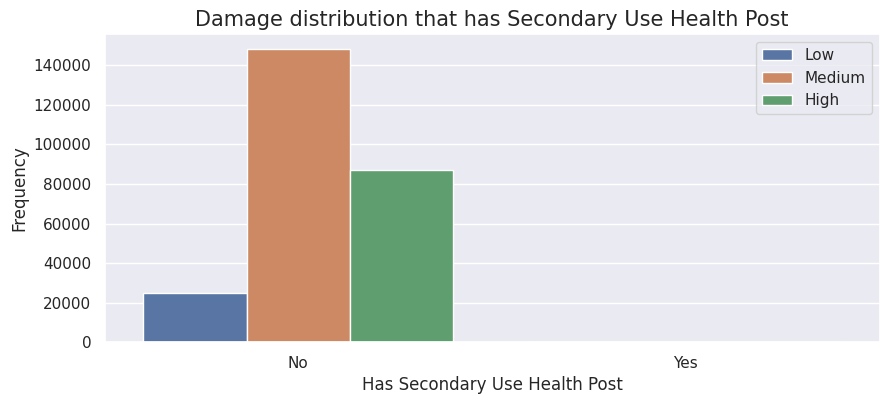

In [ ]:
count_plot(train, 'has_secondary_use_health_post', 'Has Secondary Use Health Post', 'Secondary Use Health Post')

**Has Secondary Use Goverment Office**

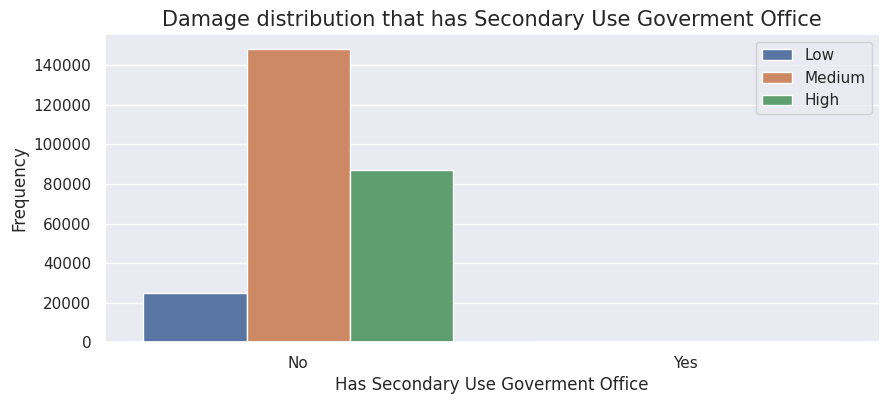

In [ ]:
count_plot(train, 'has_secondary_use_gov_office', 'Has Secondary Use Goverment Office', 'Secondary Use Goverment Office')

**Has Secondary Use Police**

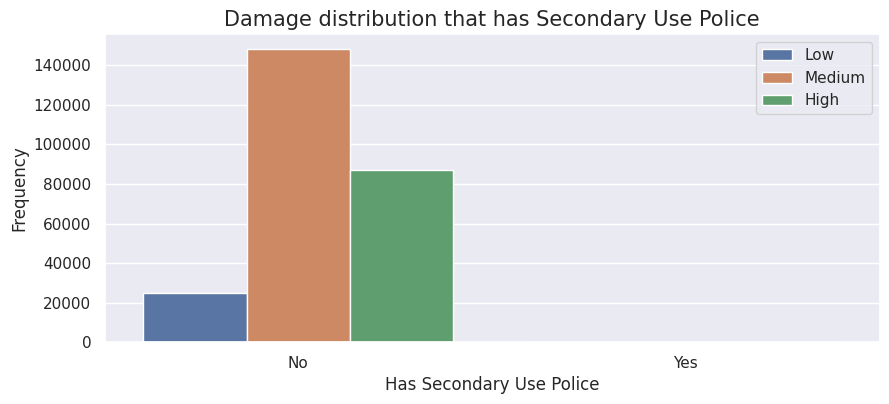

In [ ]:
count_plot(train, 'has_secondary_use_use_police', 'Has Secondary Use Police', 'Secondary Use Police')

**Has Secondary Use Other**

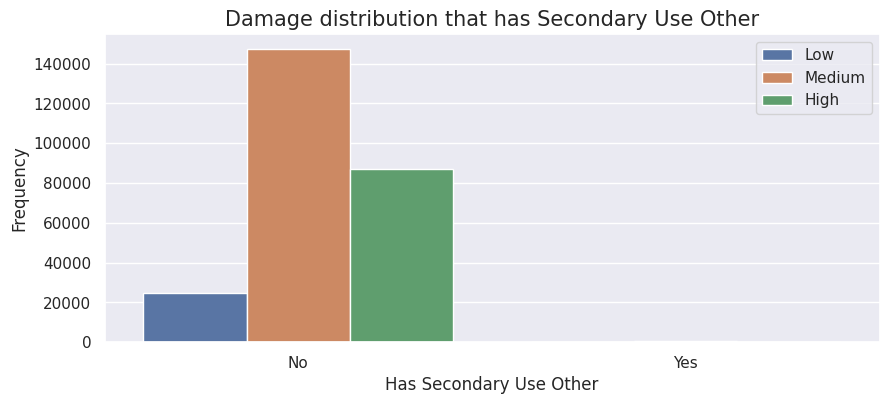

In [ ]:
count_plot(train, 'has_secondary_use_other', 'Has Secondary Use Other', 'Secondary Use Other')

In addition to buildings for personal purposes, many buildings in Nepal are used for agricultural purposes, hotels, rentals, institutions, schools, health posts, government offices, police stations, and other purposes. Buildings with secondary purposes as agricultural facilities and hotels represent the two sectors with the highest number of buildings compared to other secondary purposes. Most buildings with secondary purposes in agriculture and hotels experience moderate levels of damage.








In [ ]:
def facet_plot(data, col, x, x_label):
    grid = sns.FacetGrid(data, col=col, row='damage_grade', height=4, aspect=2, sharey=False)
    grid.map(plt.hist, x, bins=20)
    grid.set_xlabels(x_label)
    grid.set_ylabels('Frequency')
    plt.show()

#### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Number of Floor**

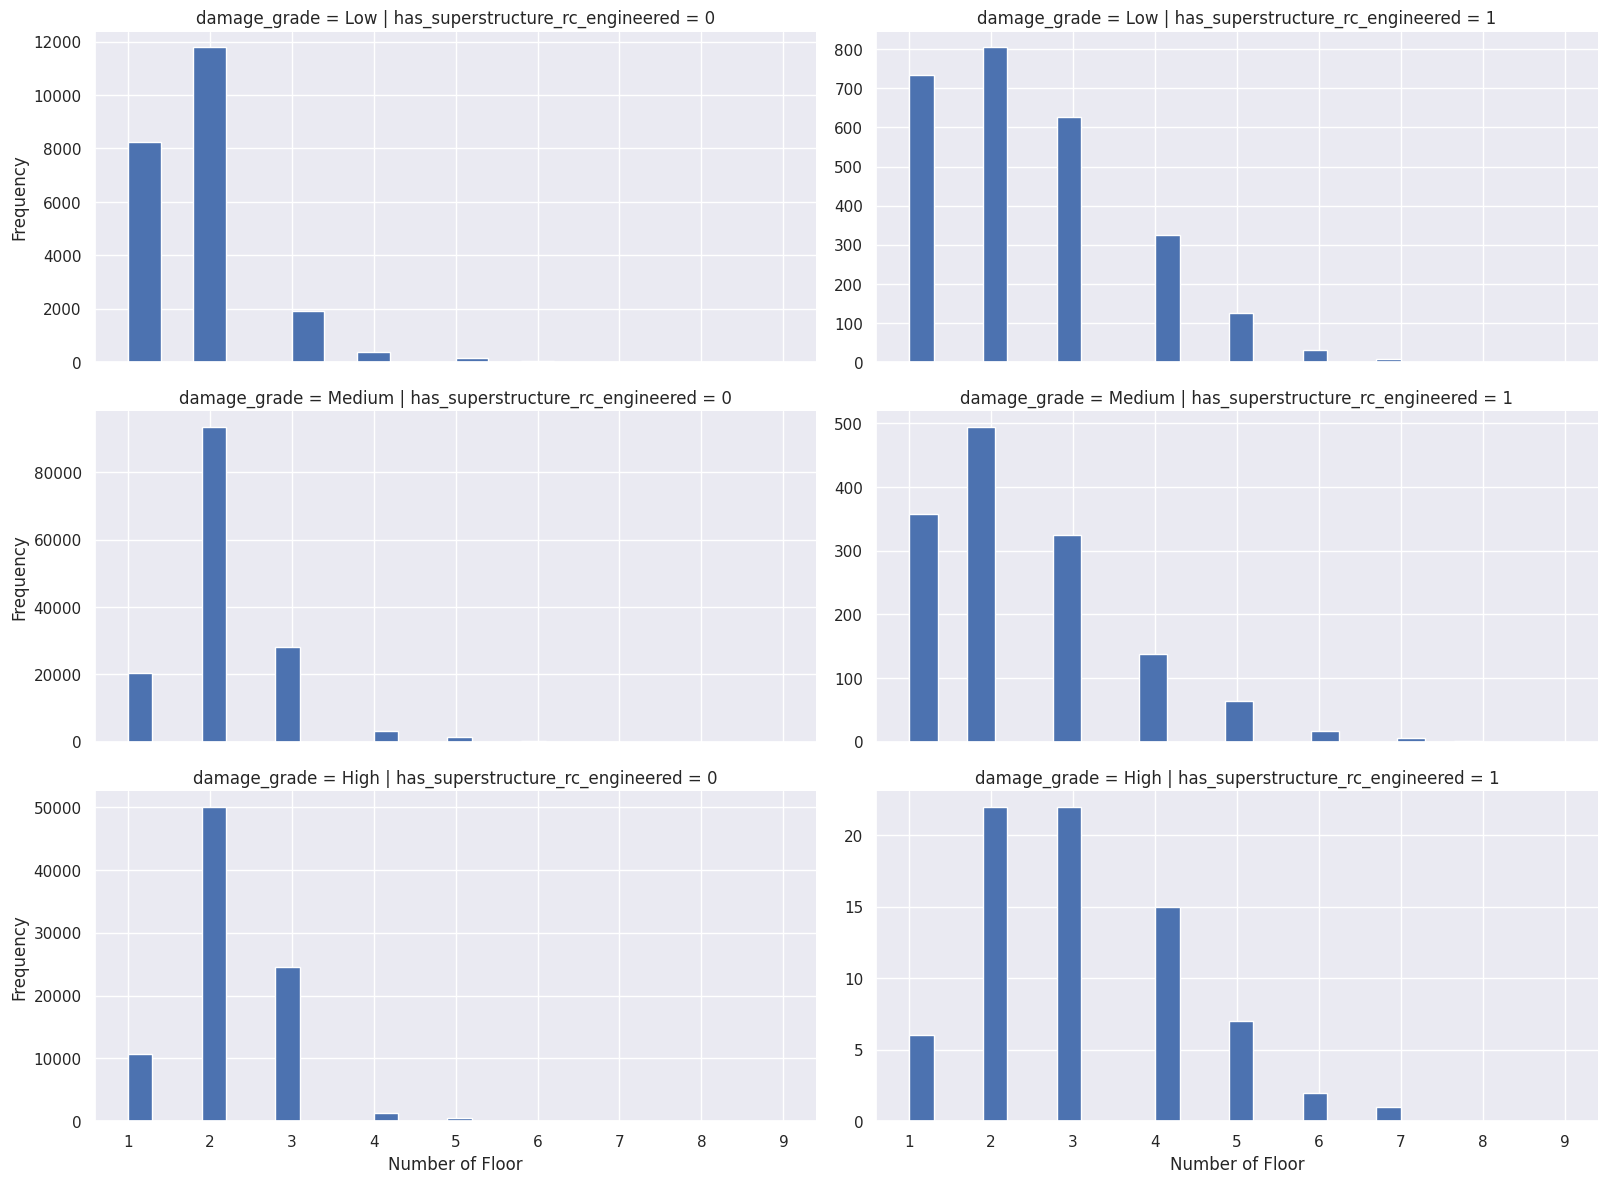

In [ ]:
facet_plot(train, 'has_superstructure_rc_engineered', 'count_floors_pre_eq', 'Number of Floor')

The graphs depict a series of histograms, comparing the number of floors in buildings categorized by damage_grade (Low, Medium, High) and whether or not they have has_superstructure_rc_engineered (a binary variable with values of 0 or 1, likely indicating whether a building has a reinforced concrete superstructure).


- The first row shows buildings with "Low" damage.
- The second row shows buildings with "Medium" damage.
- The third row shows buildings with "High" damage.

Columns split by has_superstructure_rc_engineered:

- The left column represents buildings without reinforced concrete (value = 0).

- The right column represents buildings with reinforced concrete (value = 1).

Conclusion:

1. Number of Floors for Low Damage (First Row):

Buildings without reinforced concrete (left) show a large number of single or two-story buildings, with a steep drop-off in higher floors.
Buildings with reinforced concrete (right) also have more buildings with 1 or 2 floors but show a slightly broader distribution, with more higher-floor buildings than the non-reinforced ones.

2. Number of Floors for Medium Damage (Second Row):

- Non-reinforced buildings (left) still primarily have 1 or 2 floors, but overall, the frequency of buildings is much higher than in the low damage category.
- Reinforced buildings (right) again show more diversity in floor count compared to non-reinforced, though the number of buildings is still significantly smaller than in the left column.

3. Number of Floors for High Damage (Third Row):

- The non-reinforced buildings (left) are heavily concentrated in buildings with 1 or 2 floors, with damage decreasing sharply for taller buildings.

- The reinforced buildings (right) show a smaller distribution overall, with a slight increase in buildings with more floors compared to their non-reinforced counterparts.


**Buildings with reinforced concrete** (has_superstructure_rc_engineered = 1) tend to be slightly more resilient and show a more varied distribution in terms of the number of floors.
 They also seem to have a lower frequency of severe damage, even for taller buildings.


**Damage Levels:** Low-damage buildings tend to have 1-2 floors, with higher-damage buildings concentrated in a similar range. However, non-reinforced buildings exhibit much more damage in terms of frequency as the number of floors increases.



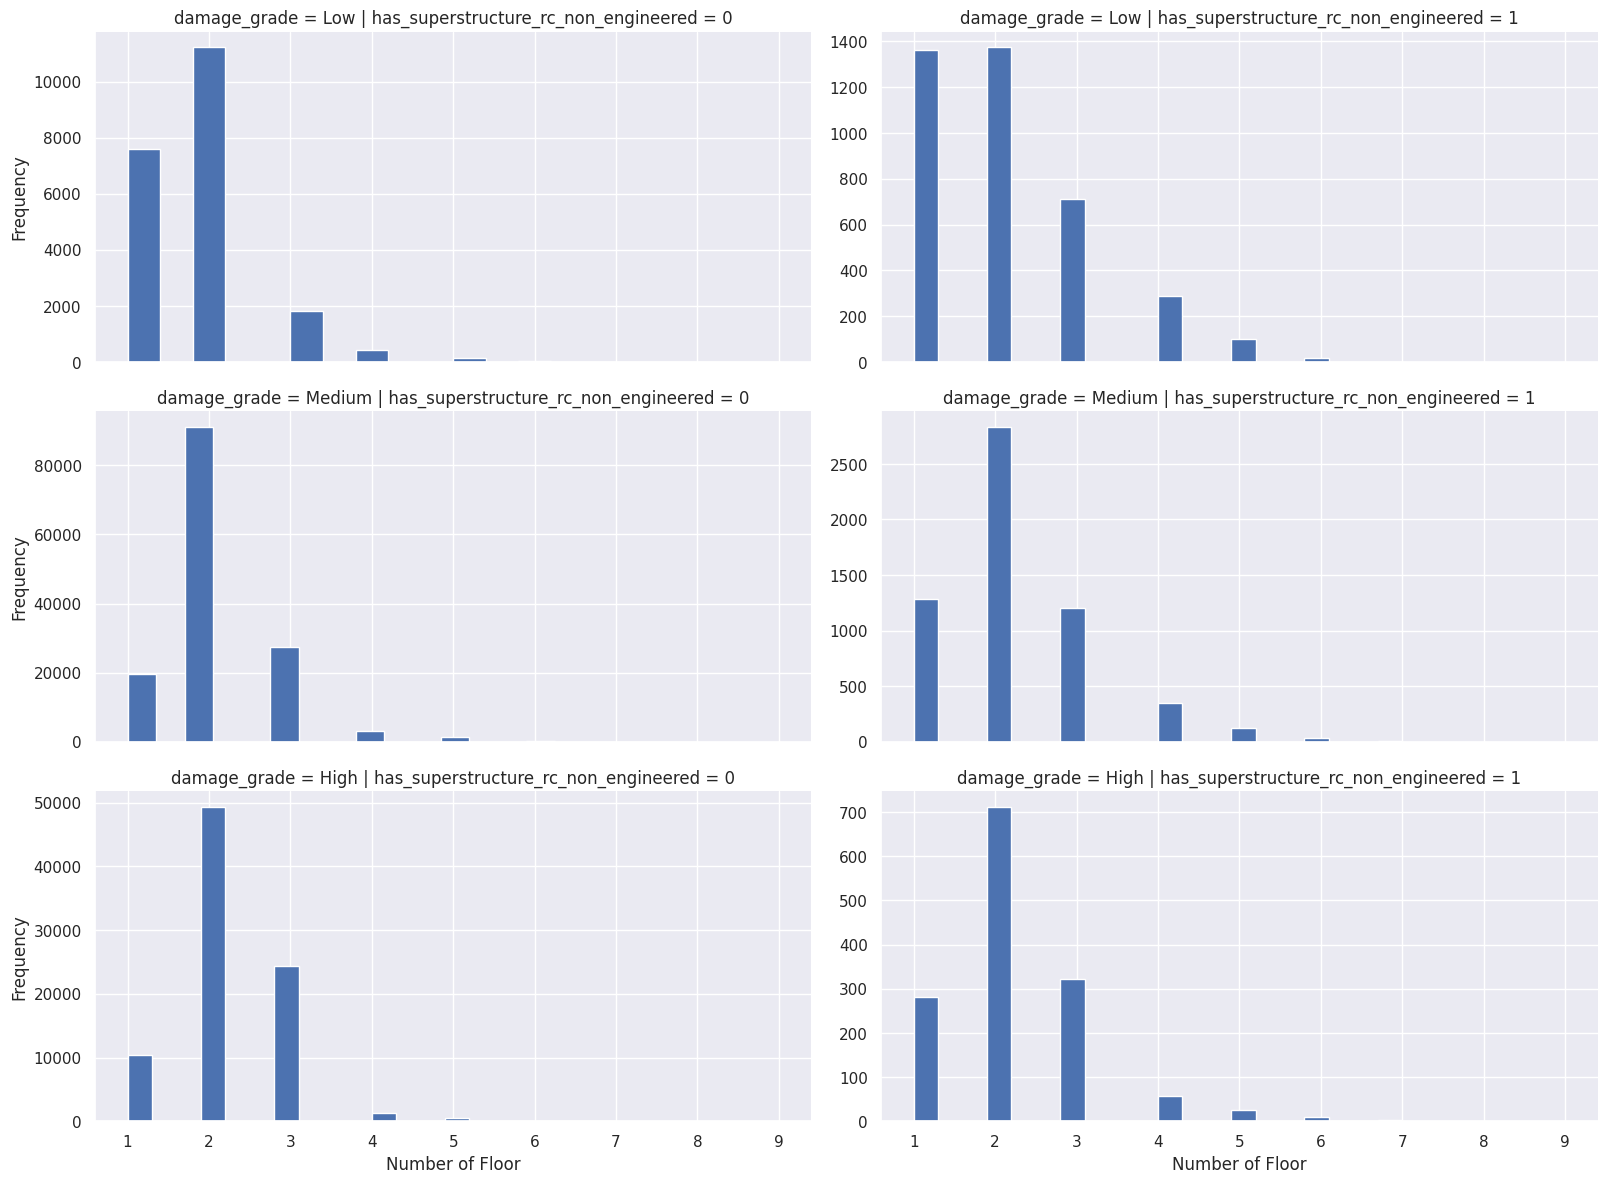

In [ ]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'count_floors_pre_eq', 'Number of Floor')

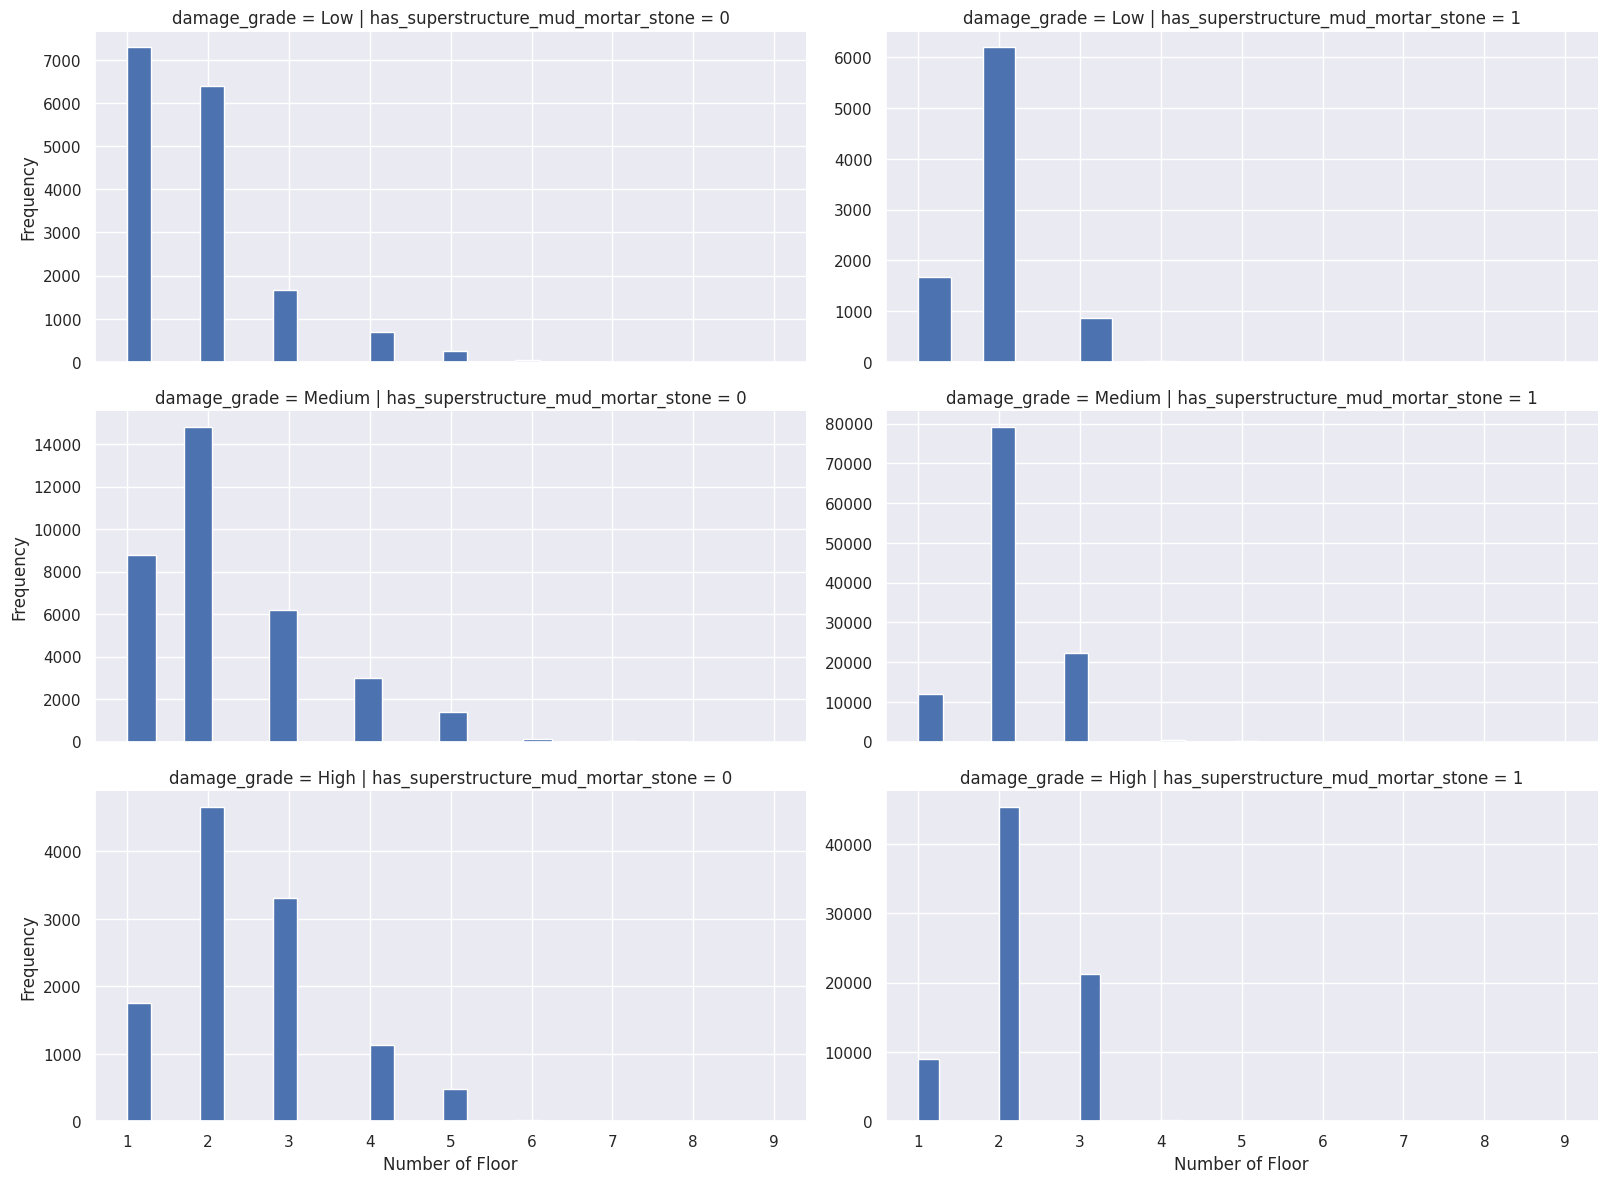

In [ ]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'count_floors_pre_eq', 'Number of Floor')

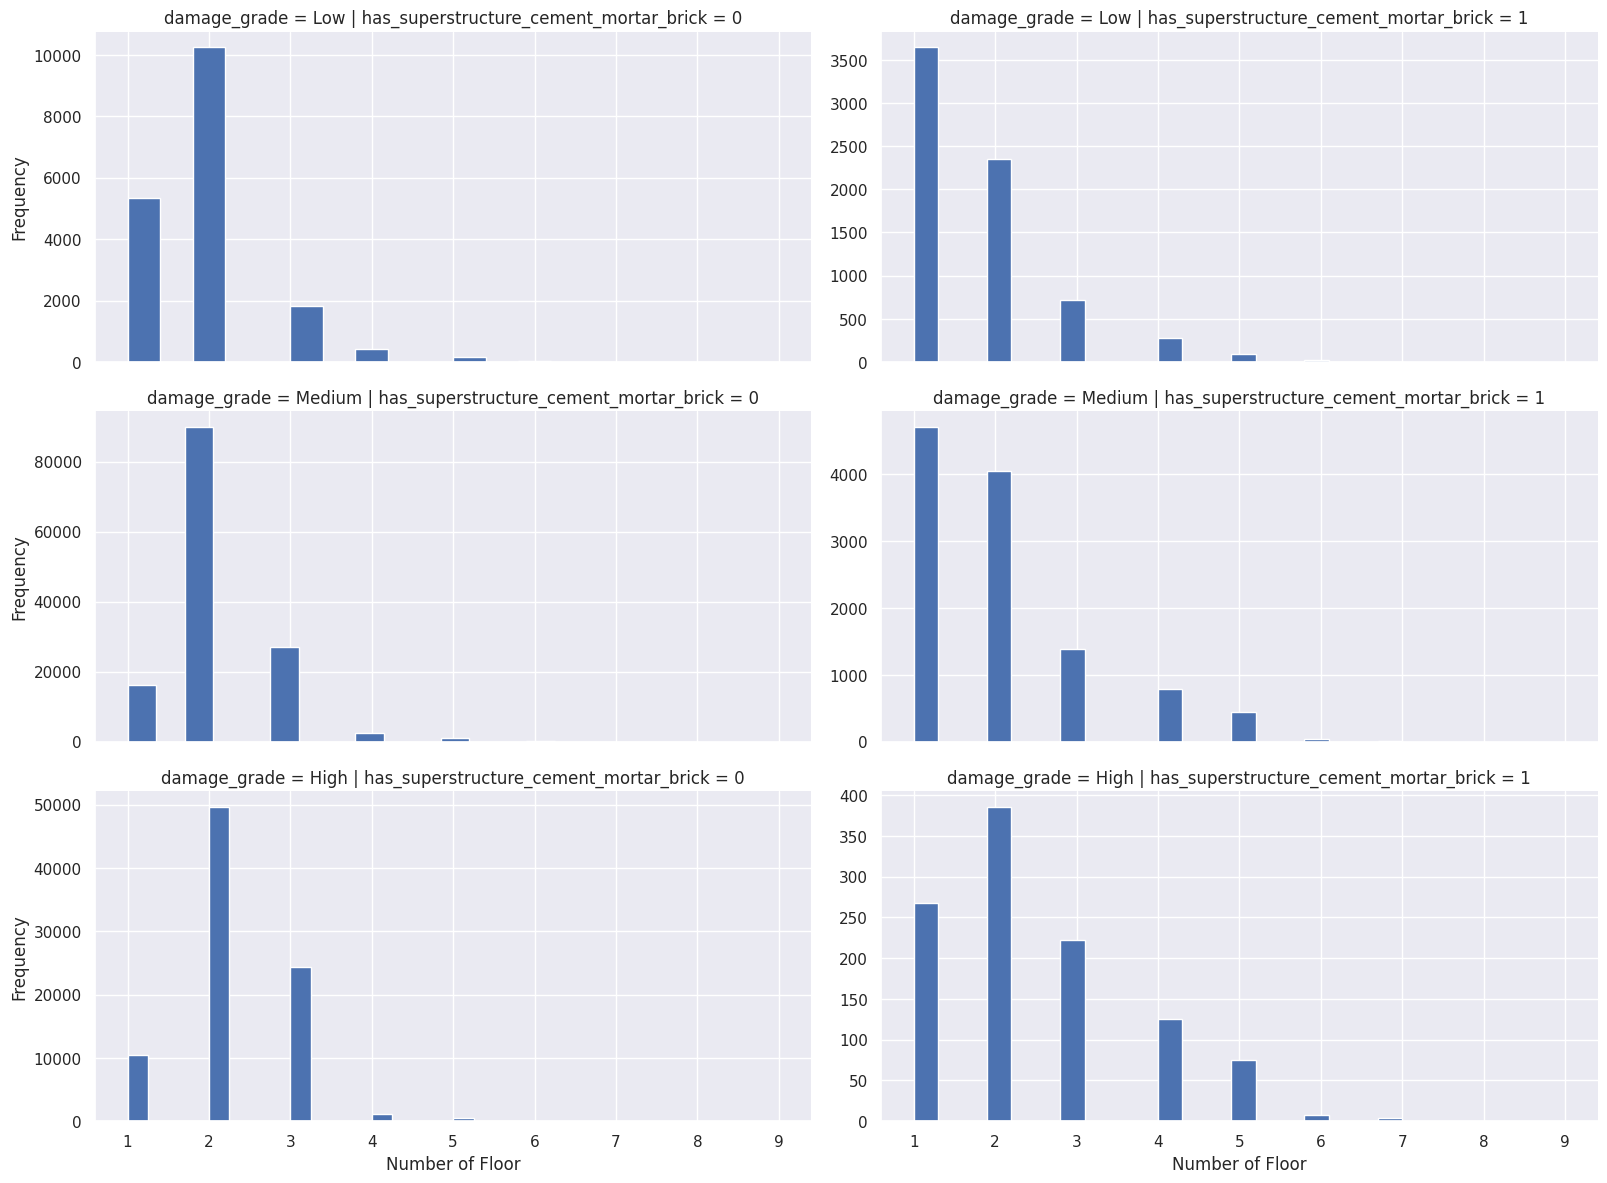

In [ ]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'count_floors_pre_eq', 'Number of Floor')

#### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Height Percentage**

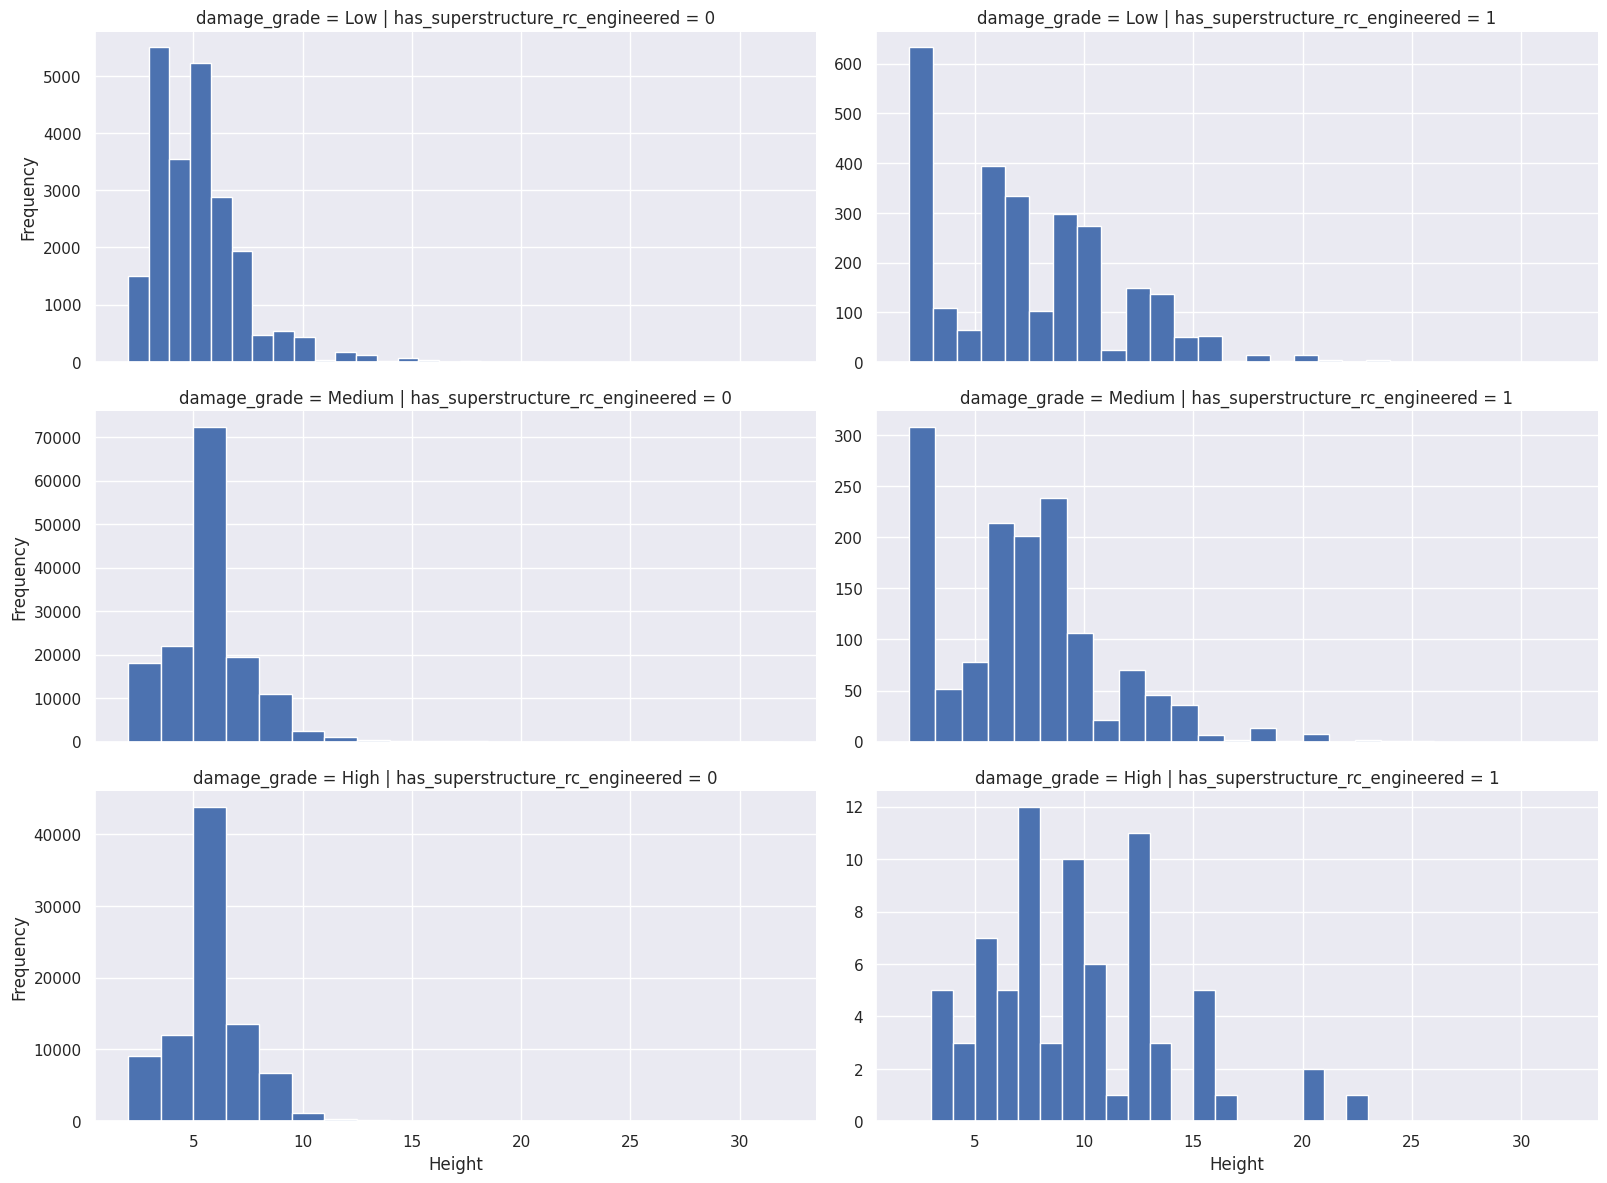

In [ ]:
facet_plot(train, 'has_superstructure_rc_engineered', 'height_percentage', 'Height')

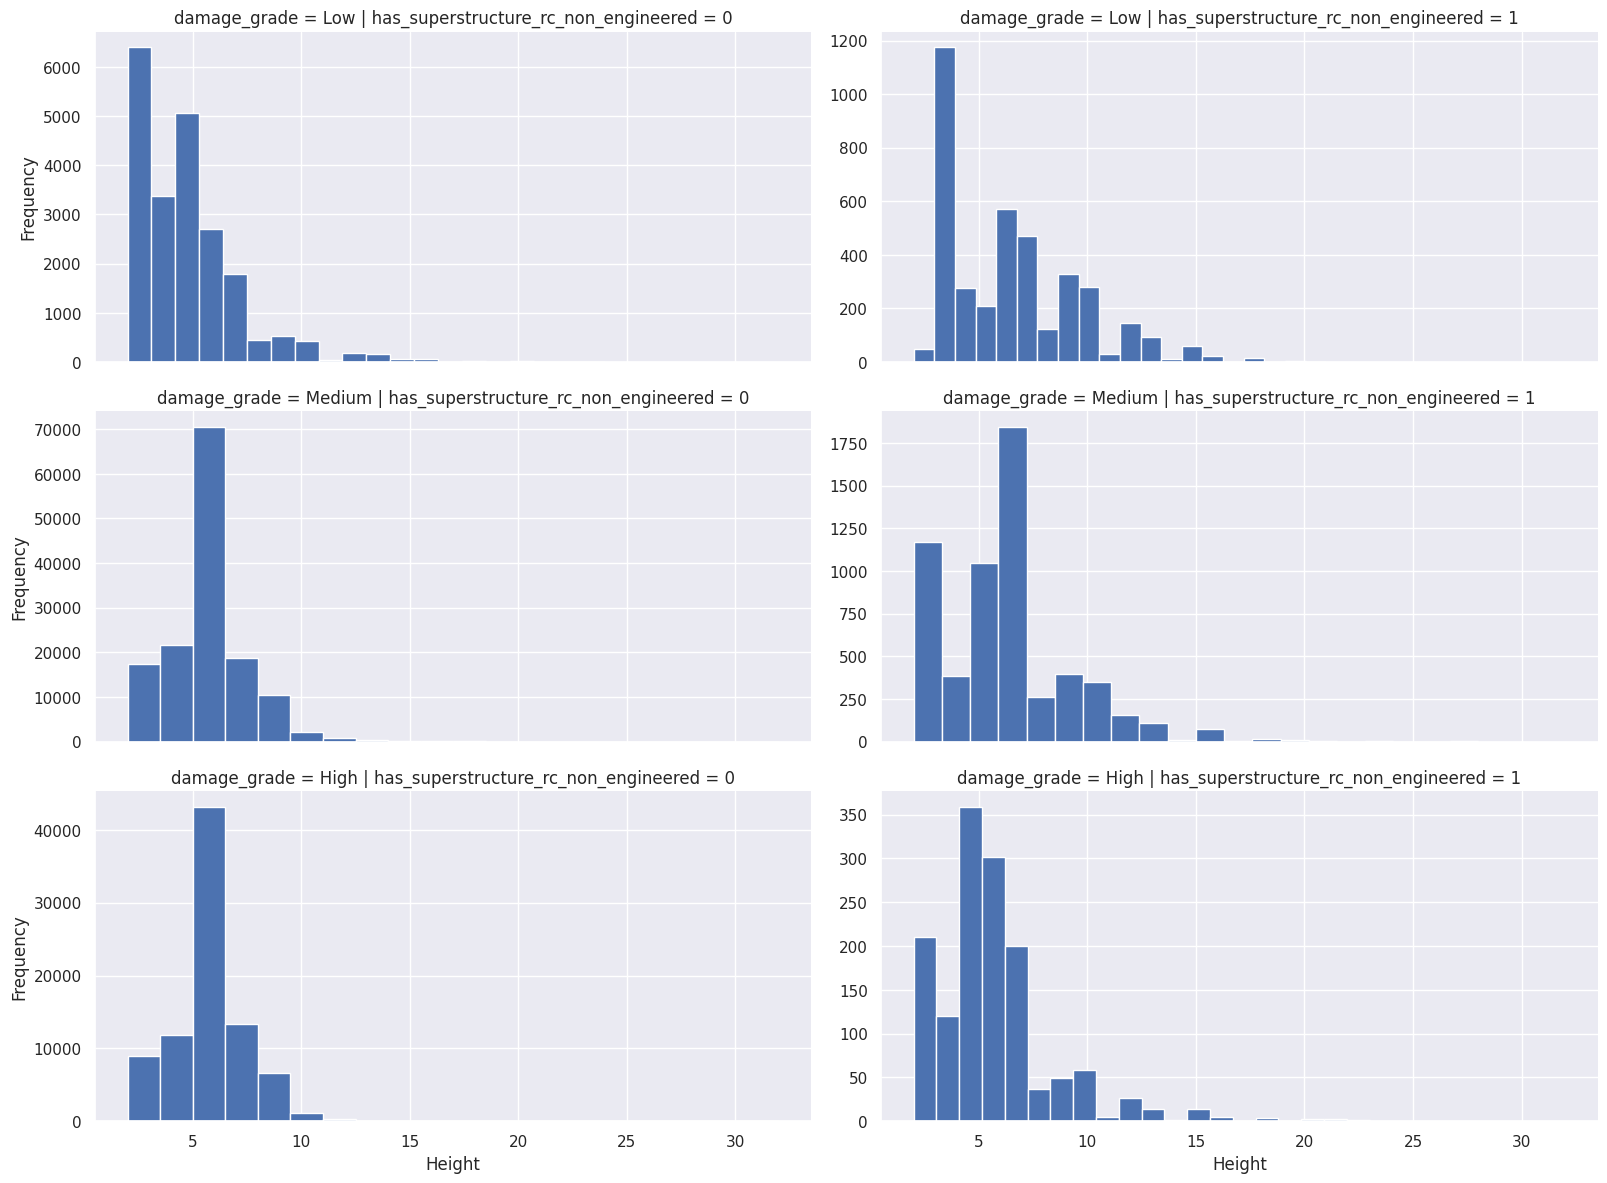

In [ ]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'height_percentage', 'Height')

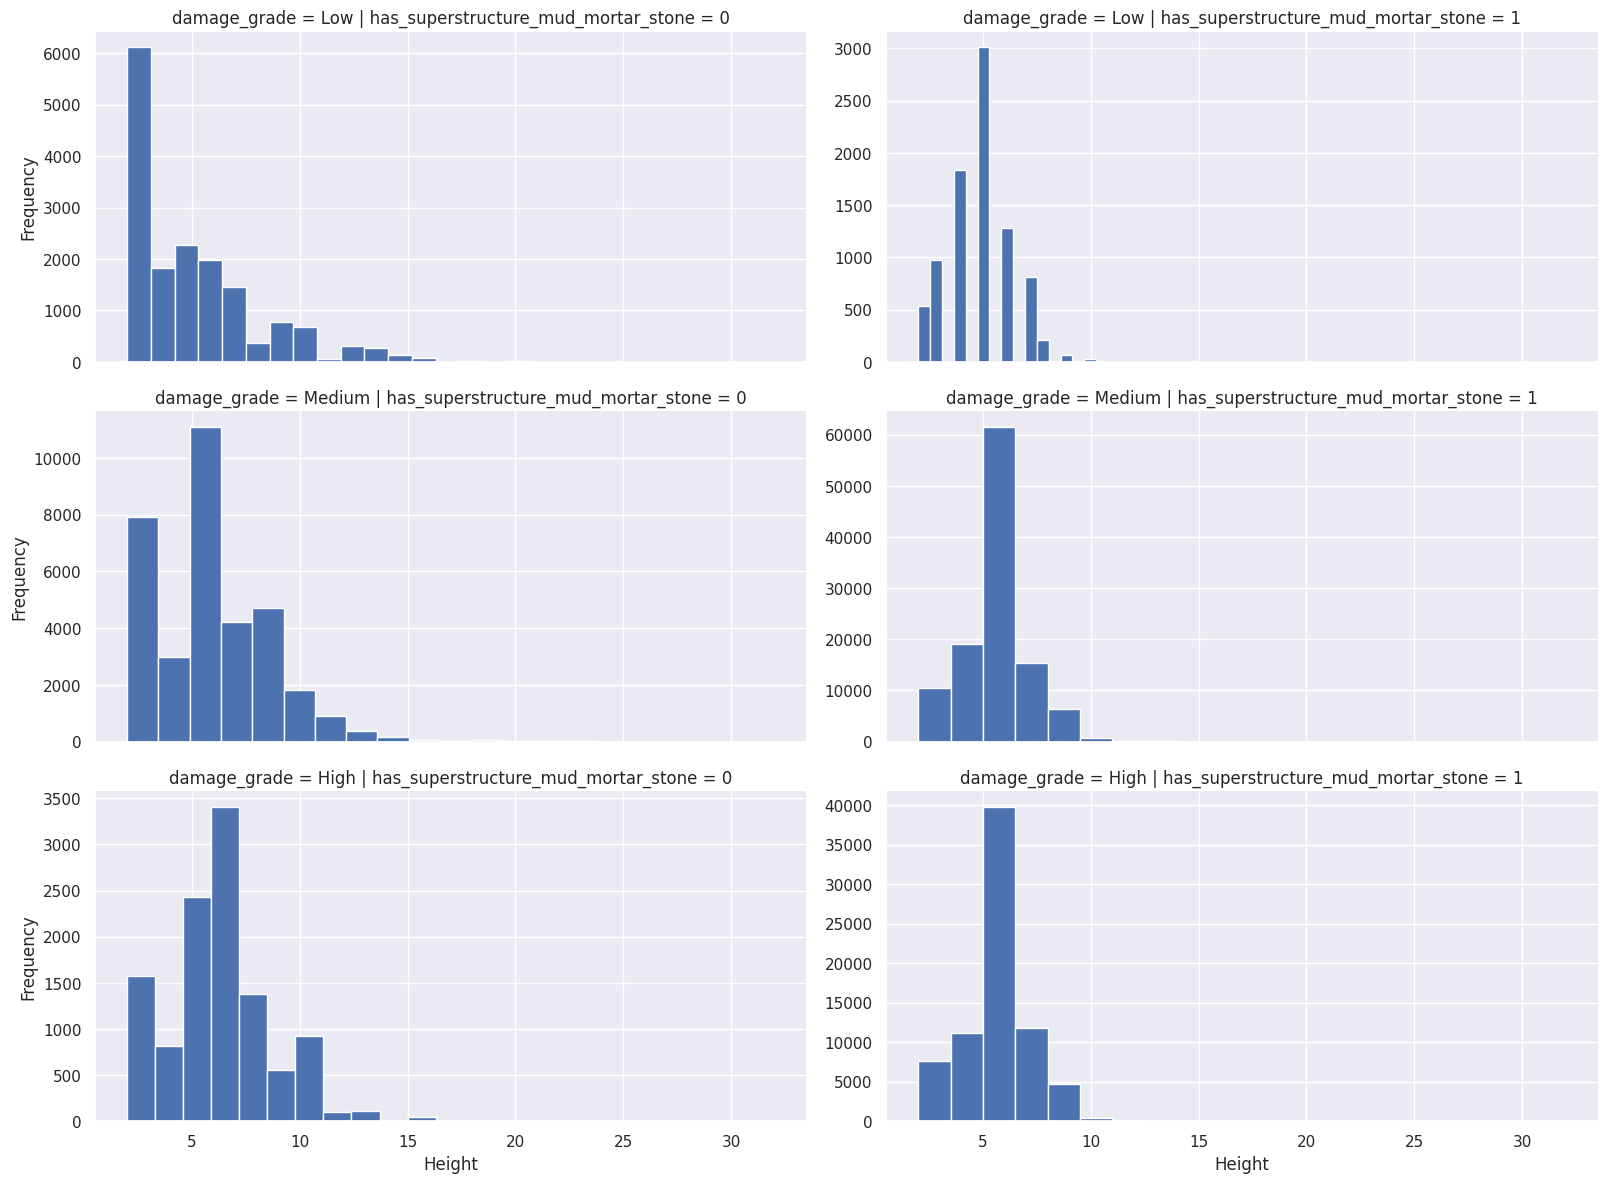

In [ ]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'height_percentage', 'Height')

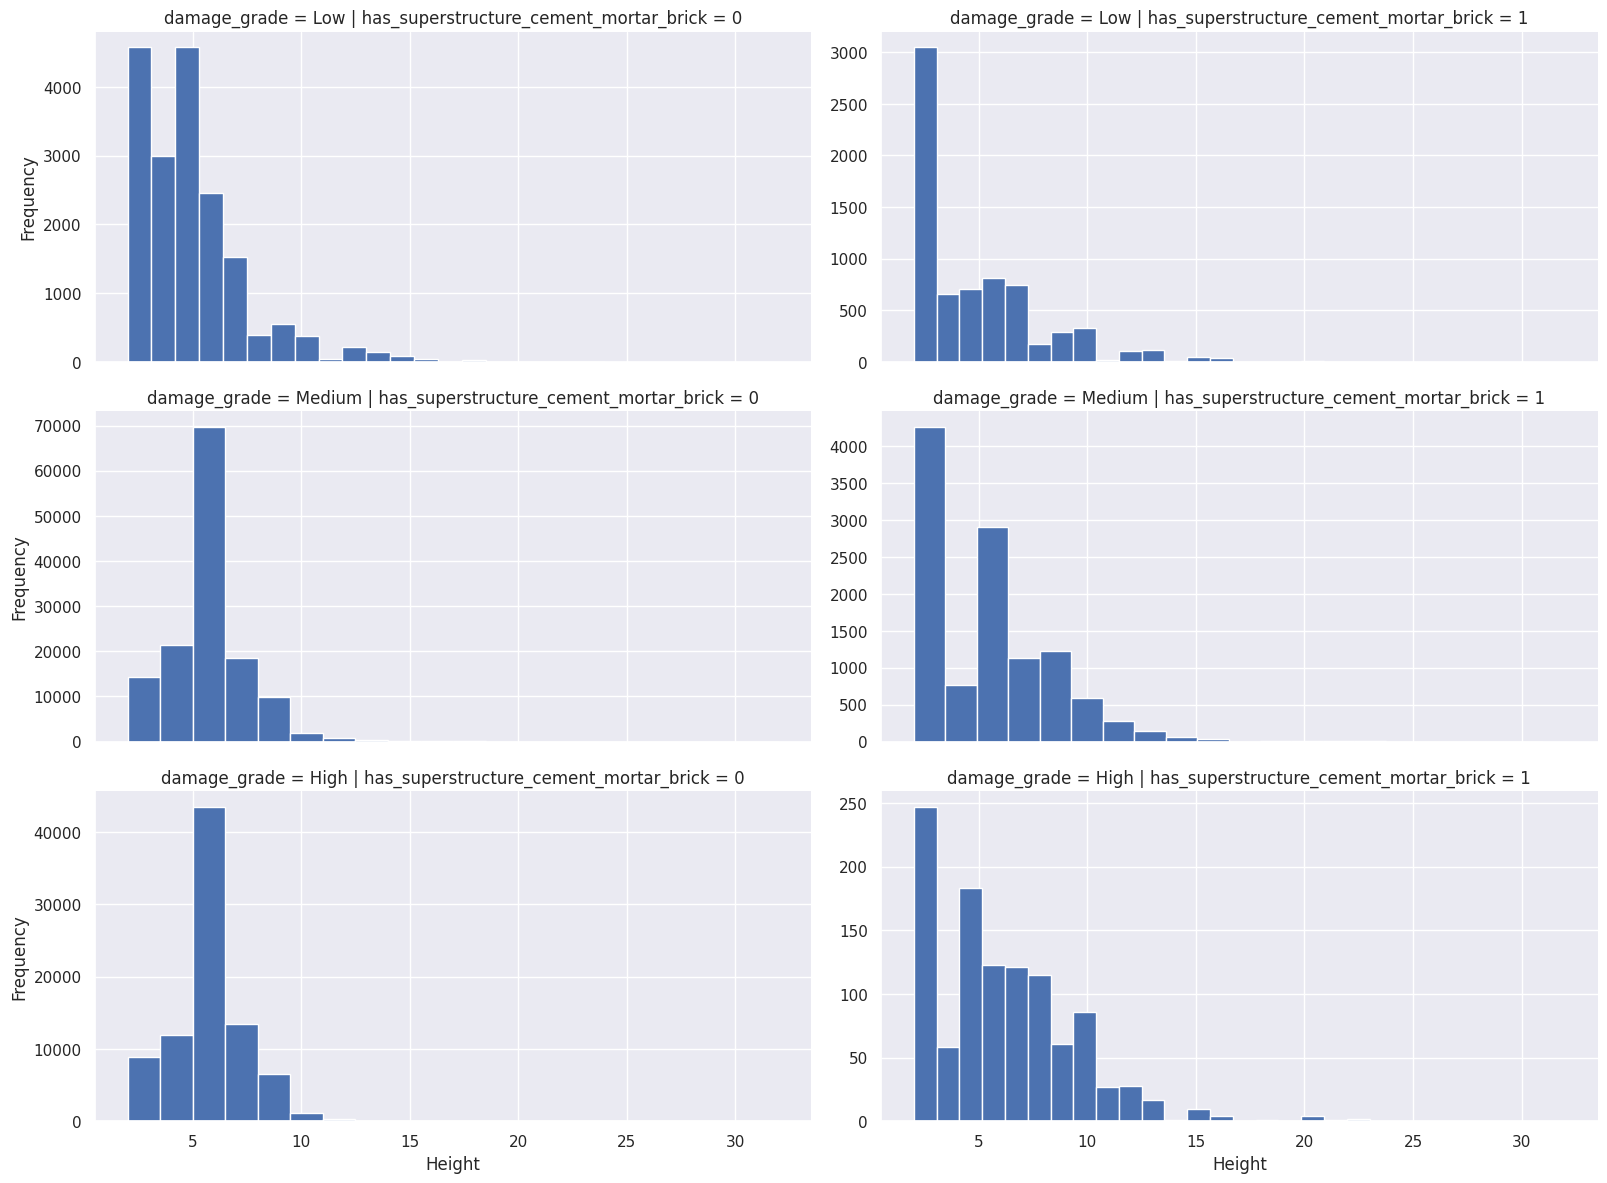

In [ ]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'height_percentage', 'Height')

#### **Superstructure RC, non RC, Mud Mortar Stone, Mud Mortar Brick, Cement Mortar Brick and Area Percentage**

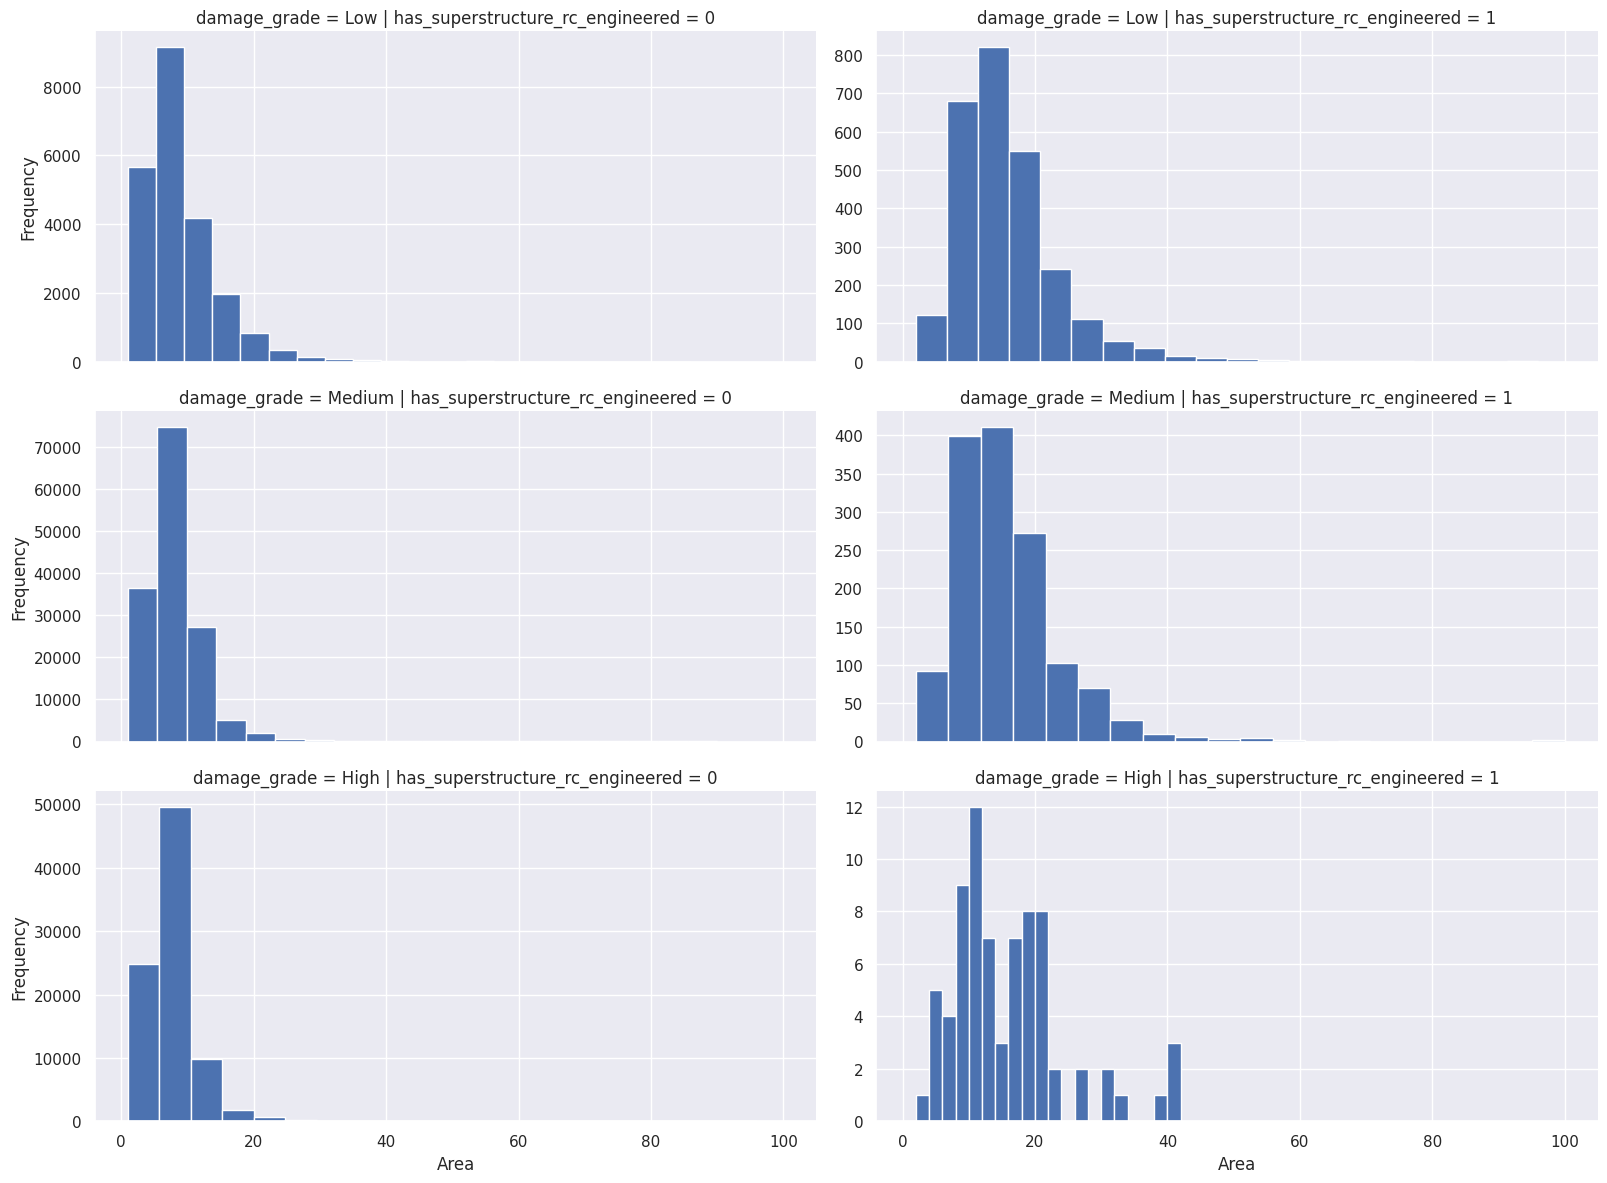

In [ ]:
facet_plot(train, 'has_superstructure_rc_engineered', 'area_percentage', 'Area')

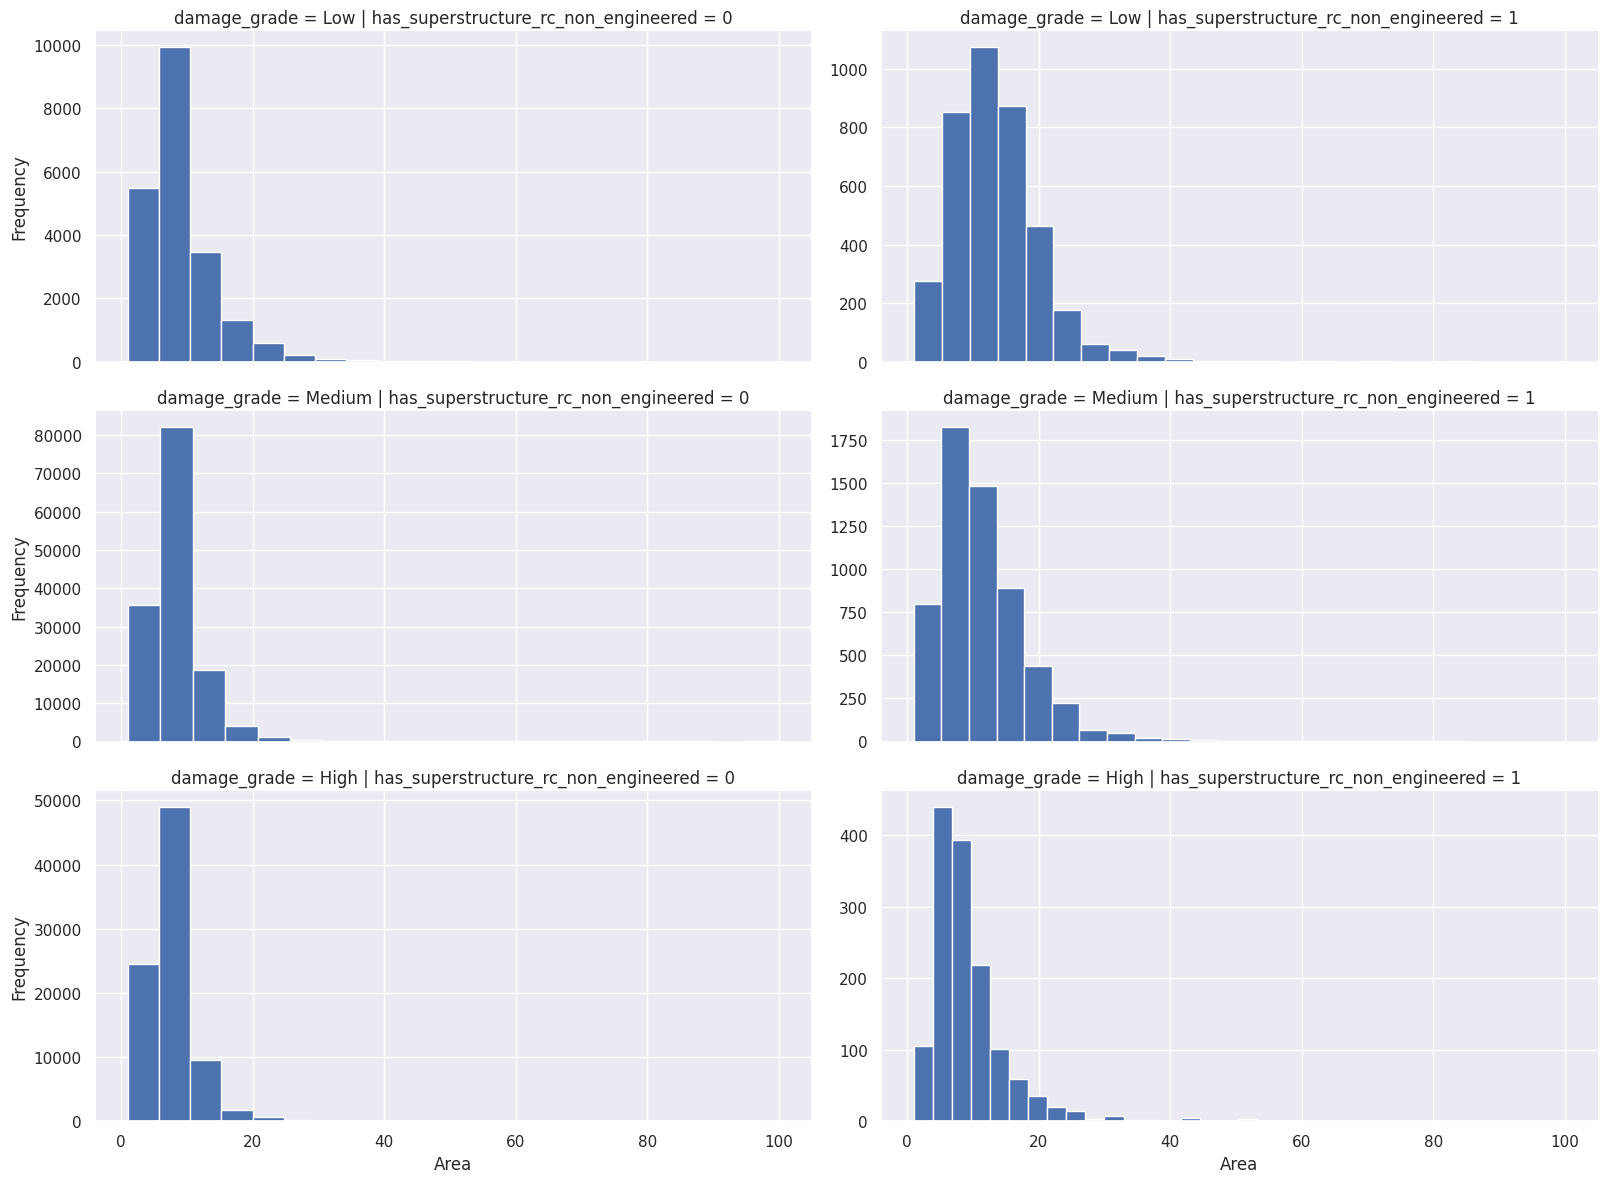

In [ ]:
facet_plot(train, 'has_superstructure_rc_non_engineered', 'area_percentage', 'Area')

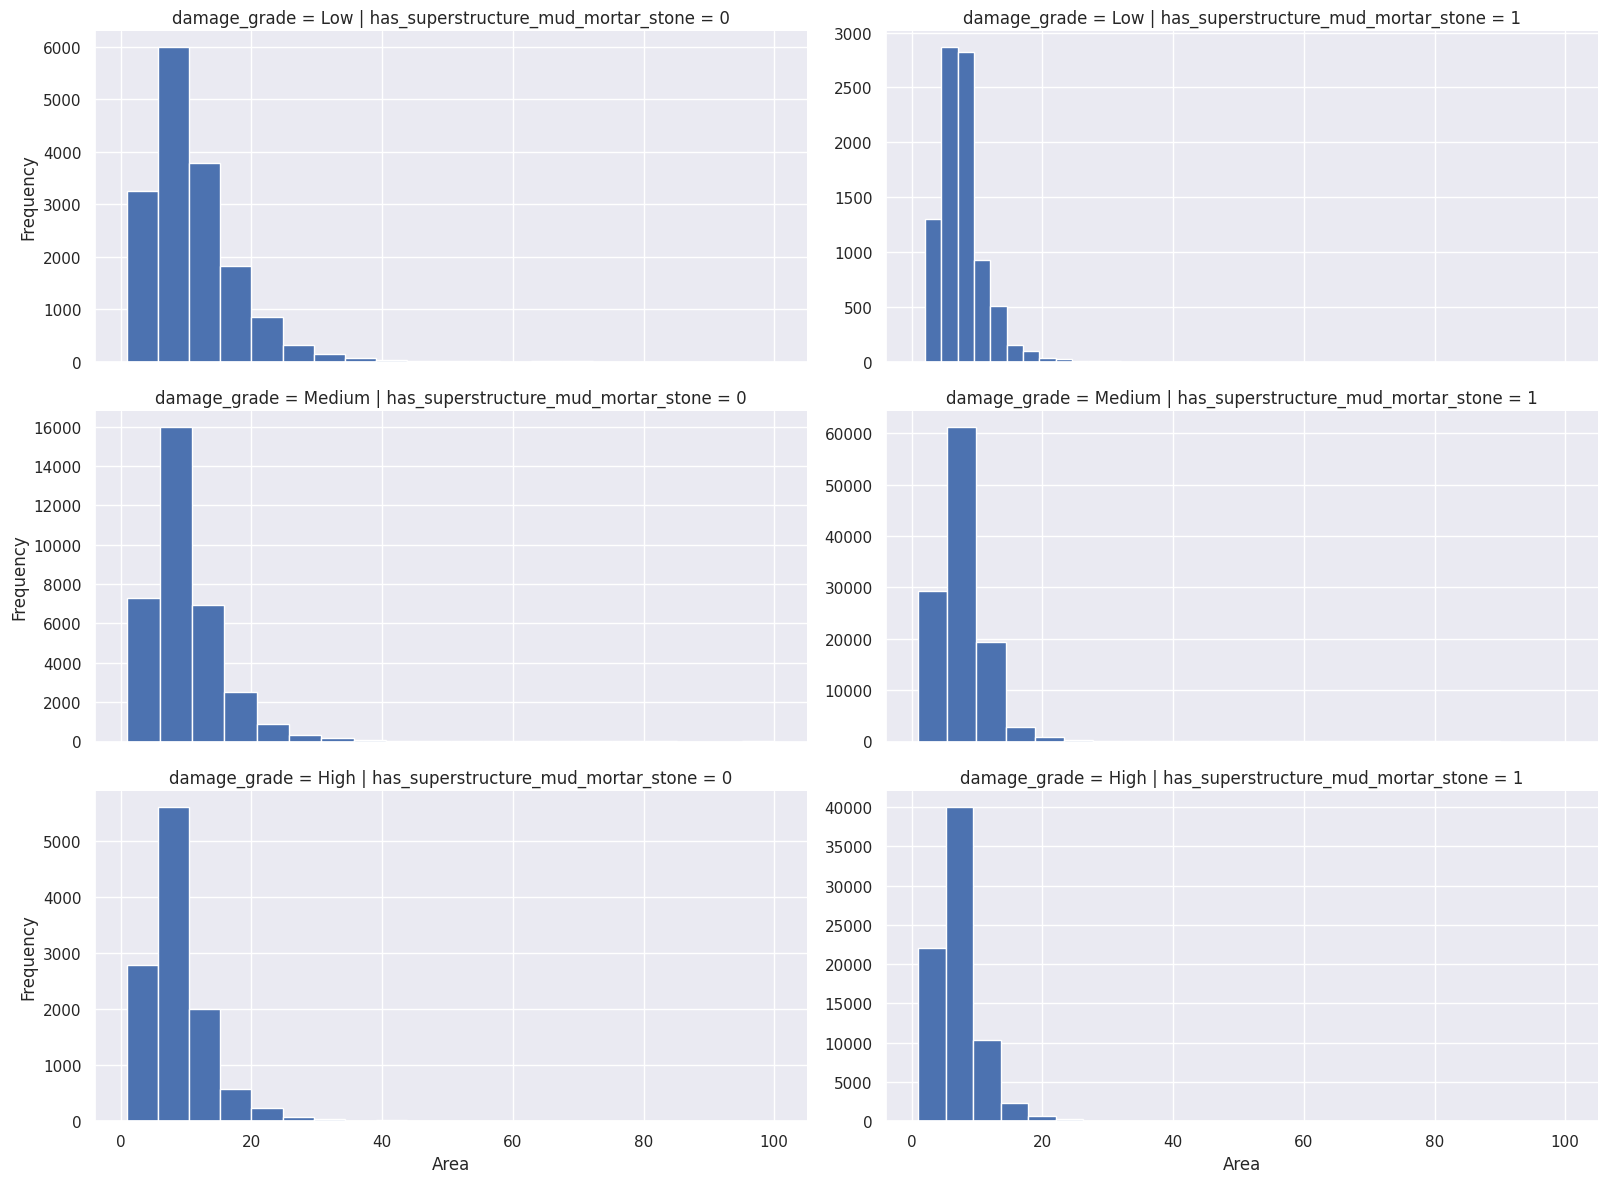

In [ ]:
facet_plot(train, 'has_superstructure_mud_mortar_stone', 'area_percentage', 'Area')

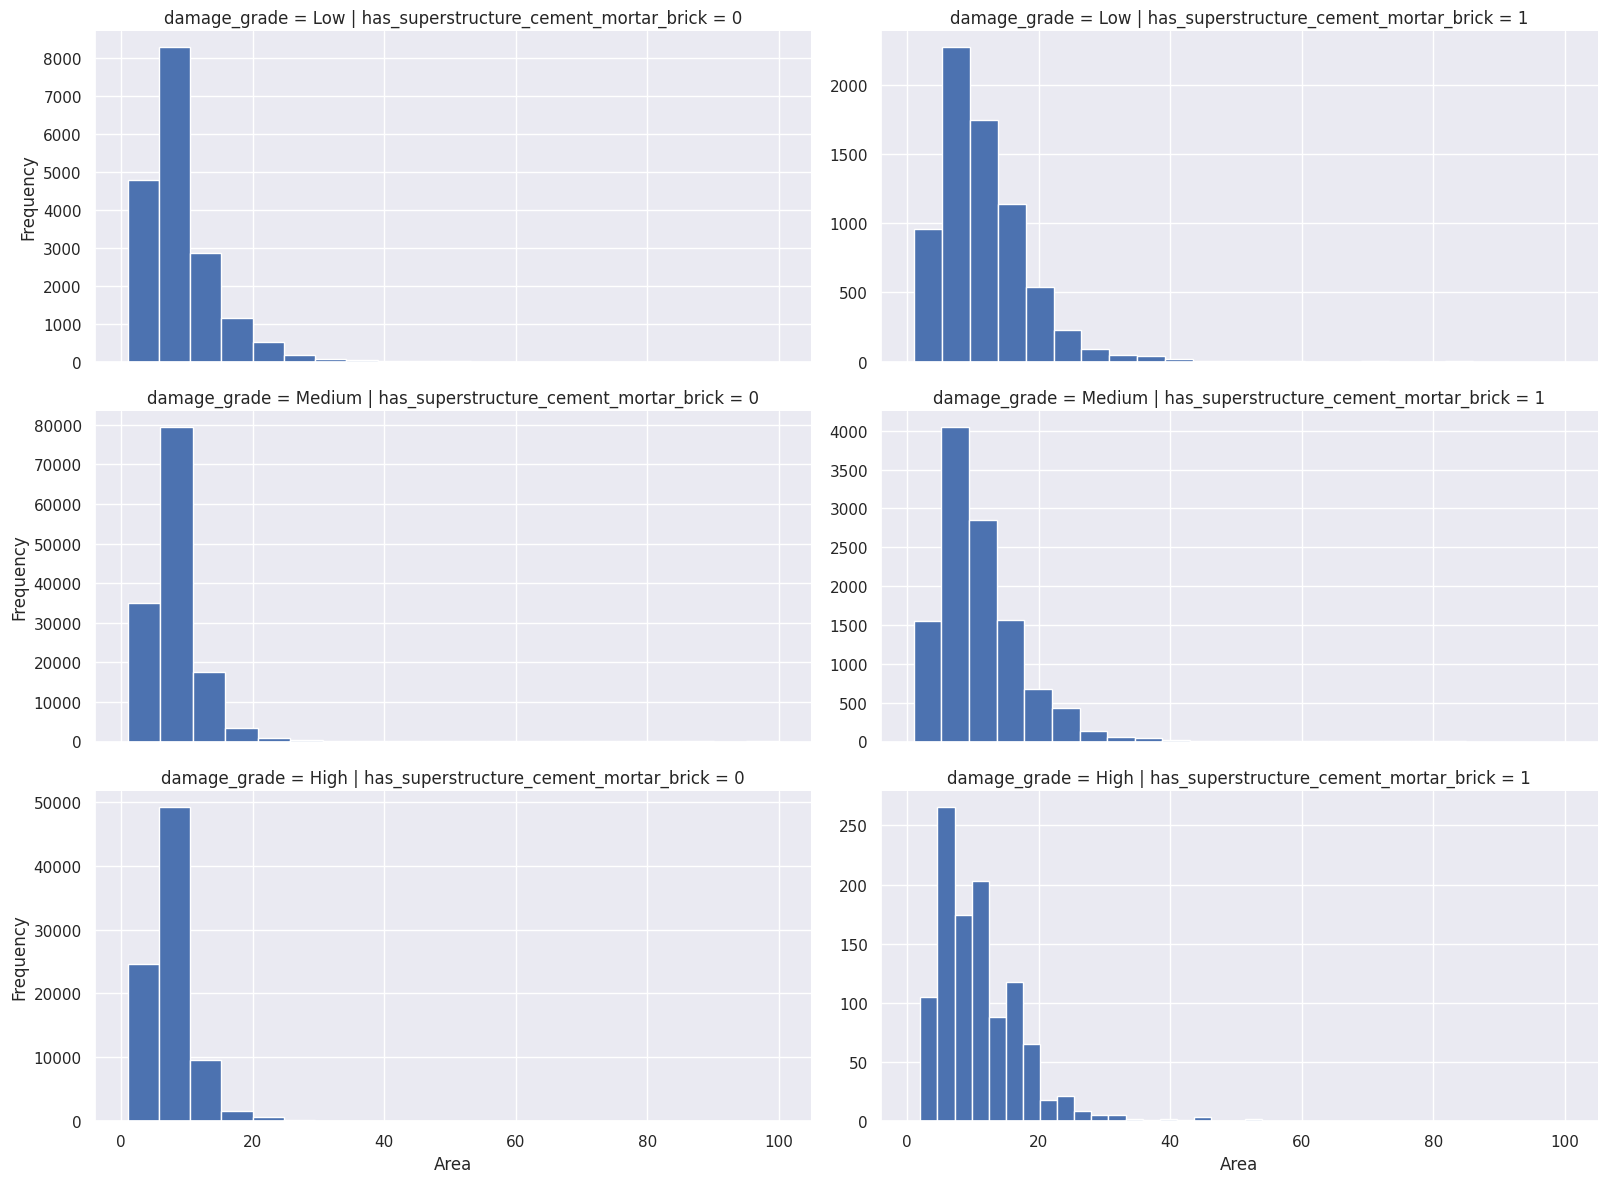

In [ ]:
facet_plot(train, 'has_superstructure_cement_mortar_brick', 'area_percentage', 'Area')

### **Multivariate Analysis**

In [ ]:
features = train.copy()
features['damage_grade'] = features['damage_grade'].replace({'Low':1, 'Medium':2, 'High':3})
features['damage_grade'] = features['damage_grade'].astype('int64')
#corr_matrix = features.corr()
numeric_features = features.select_dtypes(include=[int, float])

# Step 5: Calculate the correlation matrix
corr_matrix = numeric_features.corr()

# Display the correlation matrix
corr_matrix

building_id  geo_level_1_id  \
building_id                                1.000000       -0.002850   
geo_level_1_id                            -0.002850        1.000000   
geo_level_2_id                             0.000347       -0.061405   
geo_level_3_id                            -0.000393        0.002718   
count_floors_pre_eq                       -0.000654       -0.089364   
age                                       -0.001476       -0.003908   
area_percentage                           -0.002070        0.071158   
height_percentage                          0.000096       -0.063474   
has_superstructure_adobe_mud              -0.000307       -0.018245   
has_superstructure_mud_mortar_stone        0.002423       -0.152038   
has_superstructure_stone_flag              0.001443        0.007677   
has_superstructure_cement_mortar_stone    -0.000827        0.023656   
has_superstructure_mud_mortar_brick       -0.003768       -0.028854   
has_superstructure_cement_mortar_brick     0.001933        0.134121   
has_superstructure_timber                  0.001967        0.144985   
has_superstructure_bamboo                  0.001266        0.074169   
has_superstructure_rc_non_engineered       0.002472        0.016454   
has_superstructure_rc_engineered          -0.002259        0.015767   
has_superstructure_other                   0.002171        0.022670   
count_families                            -0.000599        0.035108   
has_secondary_use                          0.002606       -0.010428   
has_secondary_use_agriculture              0.002631       -0.019786   
has_secondary_use_hotel                    0.001934        0.001911   
has_secondary_use_rental                  -0.002152        0.023523   
has_secondary_use_institution              0.000706        0.003700   
has_secondary_use_school                  -0.000362        0.002977   
has_secondary_use_industry                 0.002348        0.002655   
has_secondary_use_health_post             -0.000374       -0.002303   
has_secondary_use_gov_office               0.000538        0.001060   
has_secondary_use_use_police              -0.003116        0.000523   
has_secondary_use_other                   -0.002295       -0.017992   
damage_grade                               0.001063       -0.072347   

                                        geo_level_2_id  geo_level_3_id  \
building_id                                   0.000347       -0.000393   
geo_level_1_id                               -0.061405        0.002718   
geo_level_2_id                                1.000000        0.000921   
geo_level_3_id                                0.000921        1.000000   
count_floors_pre_eq                           0.047730       -0.021646   
age                                           0.012594       -0.006385   
area_percentage                              -0.049443       -0.005643   
height_percentage                             0.035516       -0.024507   
has_superstructure_adobe_mud                  0.015833       -0.015732   
has_superstructure_mud_mortar_stone           0.076491        0.026294   
has_superstructure_stone_flag                -0.008743        0.019579   
has_superstructure_cement_mortar_stone       -0.009122        0.005966   
has_superstructure_mud_mortar_brick           0.014246       -0.023278   
has_superstructure_cement_mortar_brick       -0.079875       -0.005116   
has_superstructure_timber                    -0.023927       -0.003916   
has_superstructure_bamboo                    -0.032588        0.006143   
has_superstructure_rc_non_engineered         -0.038173        0.002265   
has_superstructure_rc_engineered             -0.036074       -0.012420   
has_superstructure_other                     -0.020144       -0.010604   
count_families                               -0.012439       -0.002479   
has_secondary_use                            -0.001519        0.007375   
has_secondary_use_agriculture                 0.017522        0.0159

#### **Correlation Matrix**

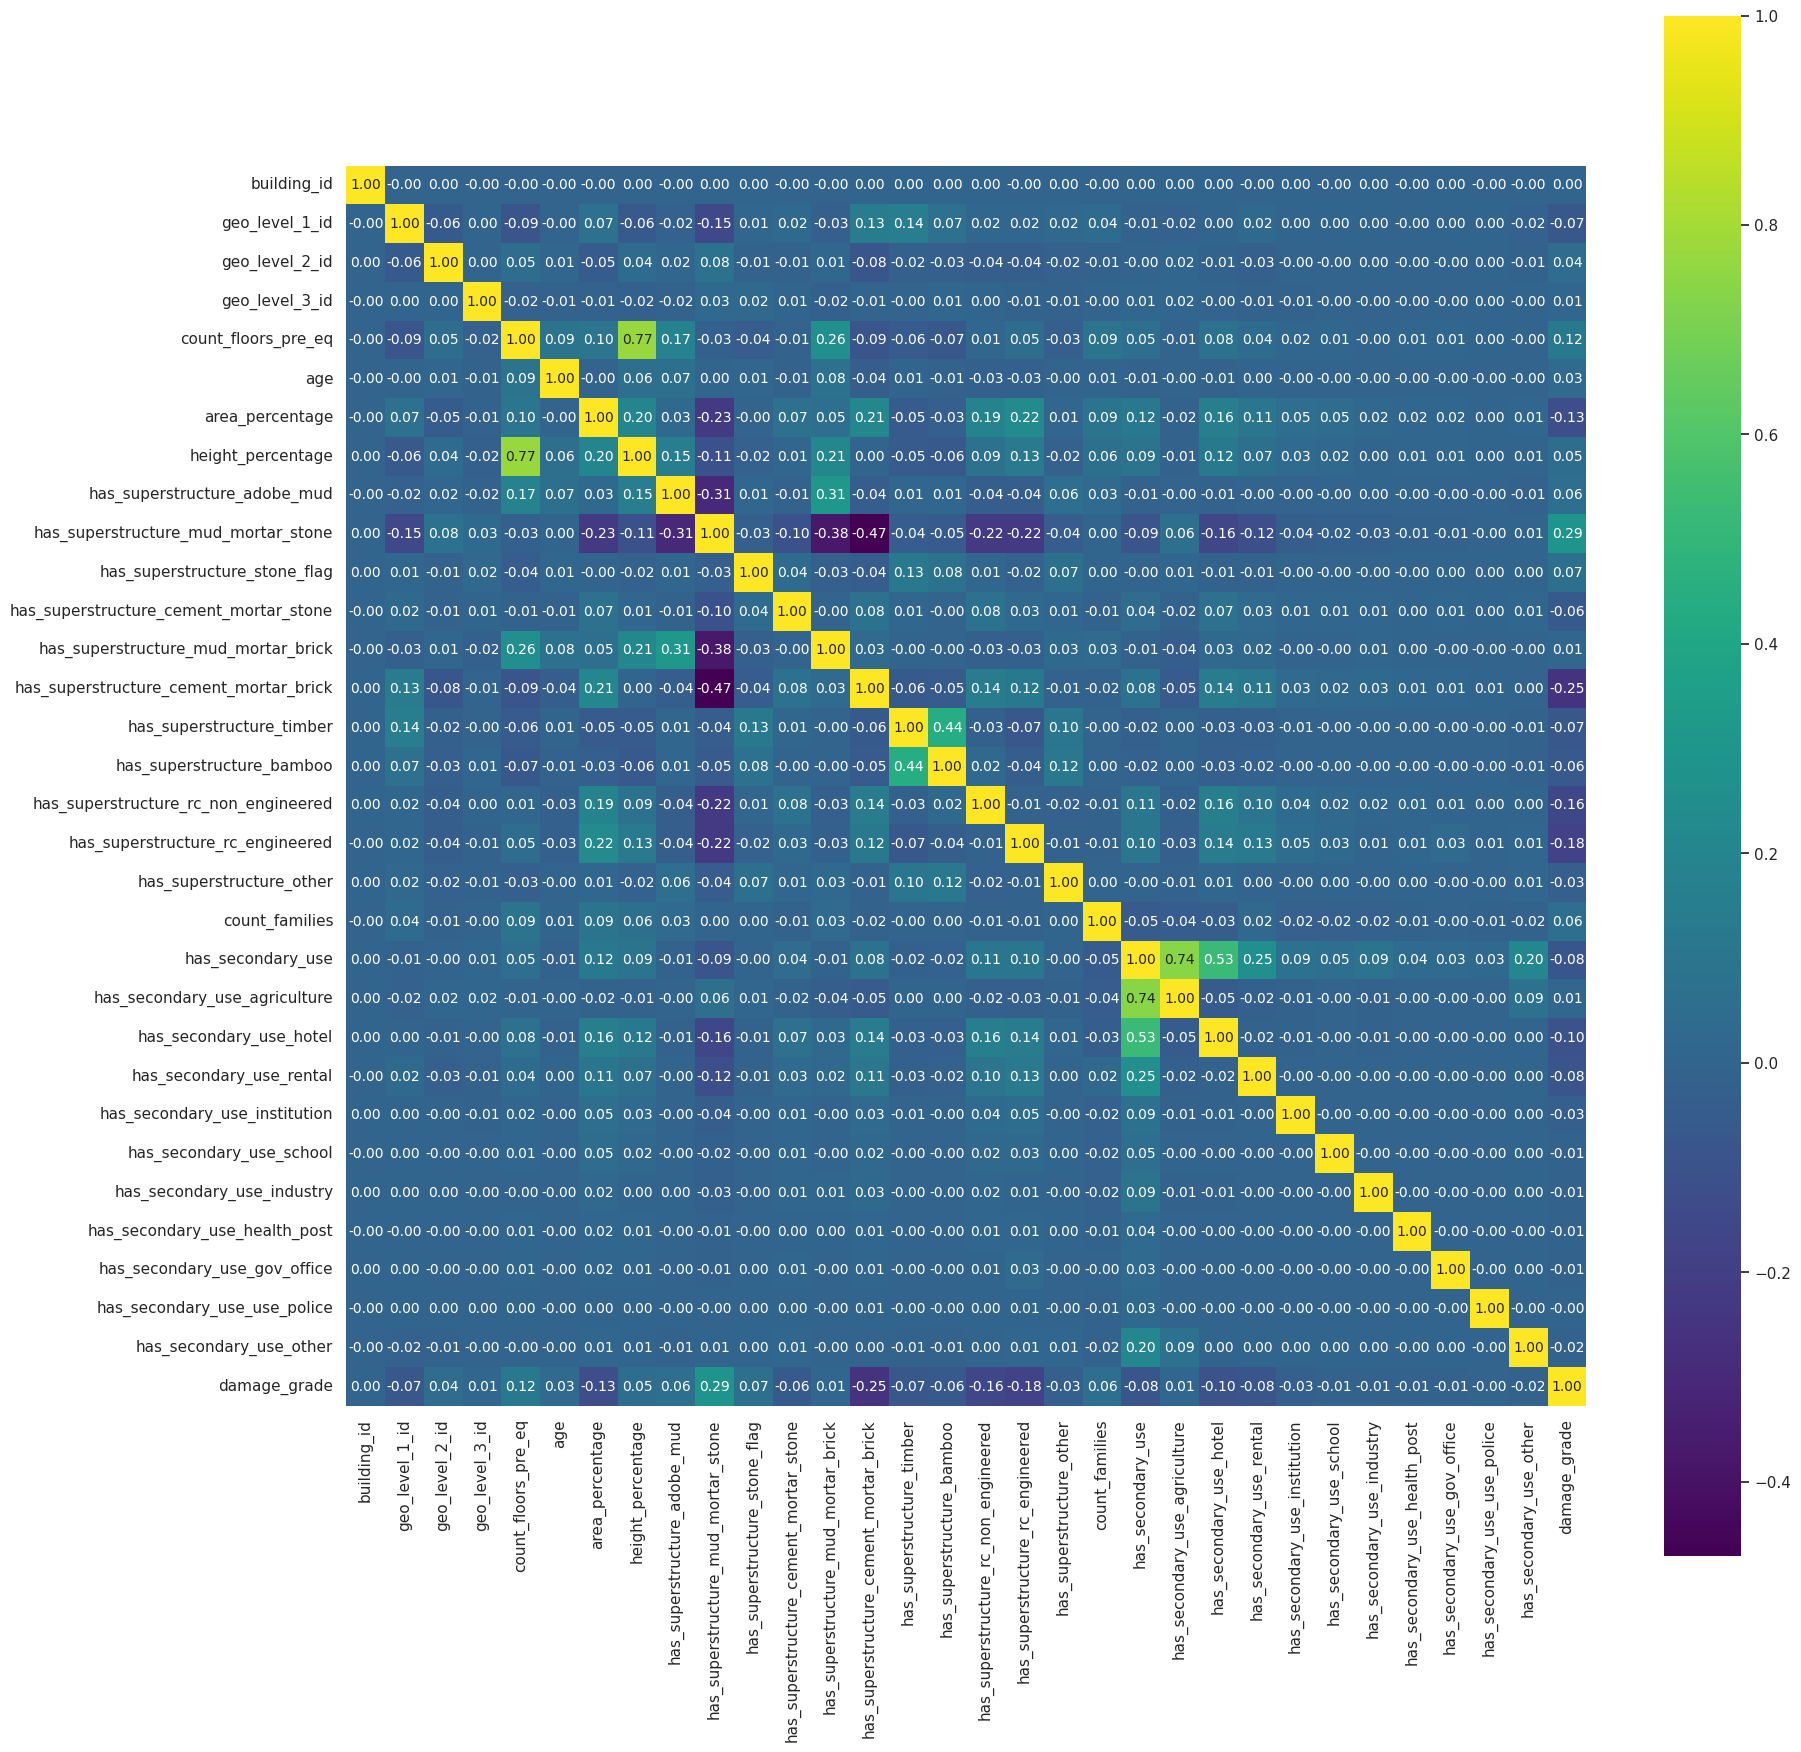

In [ ]:
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

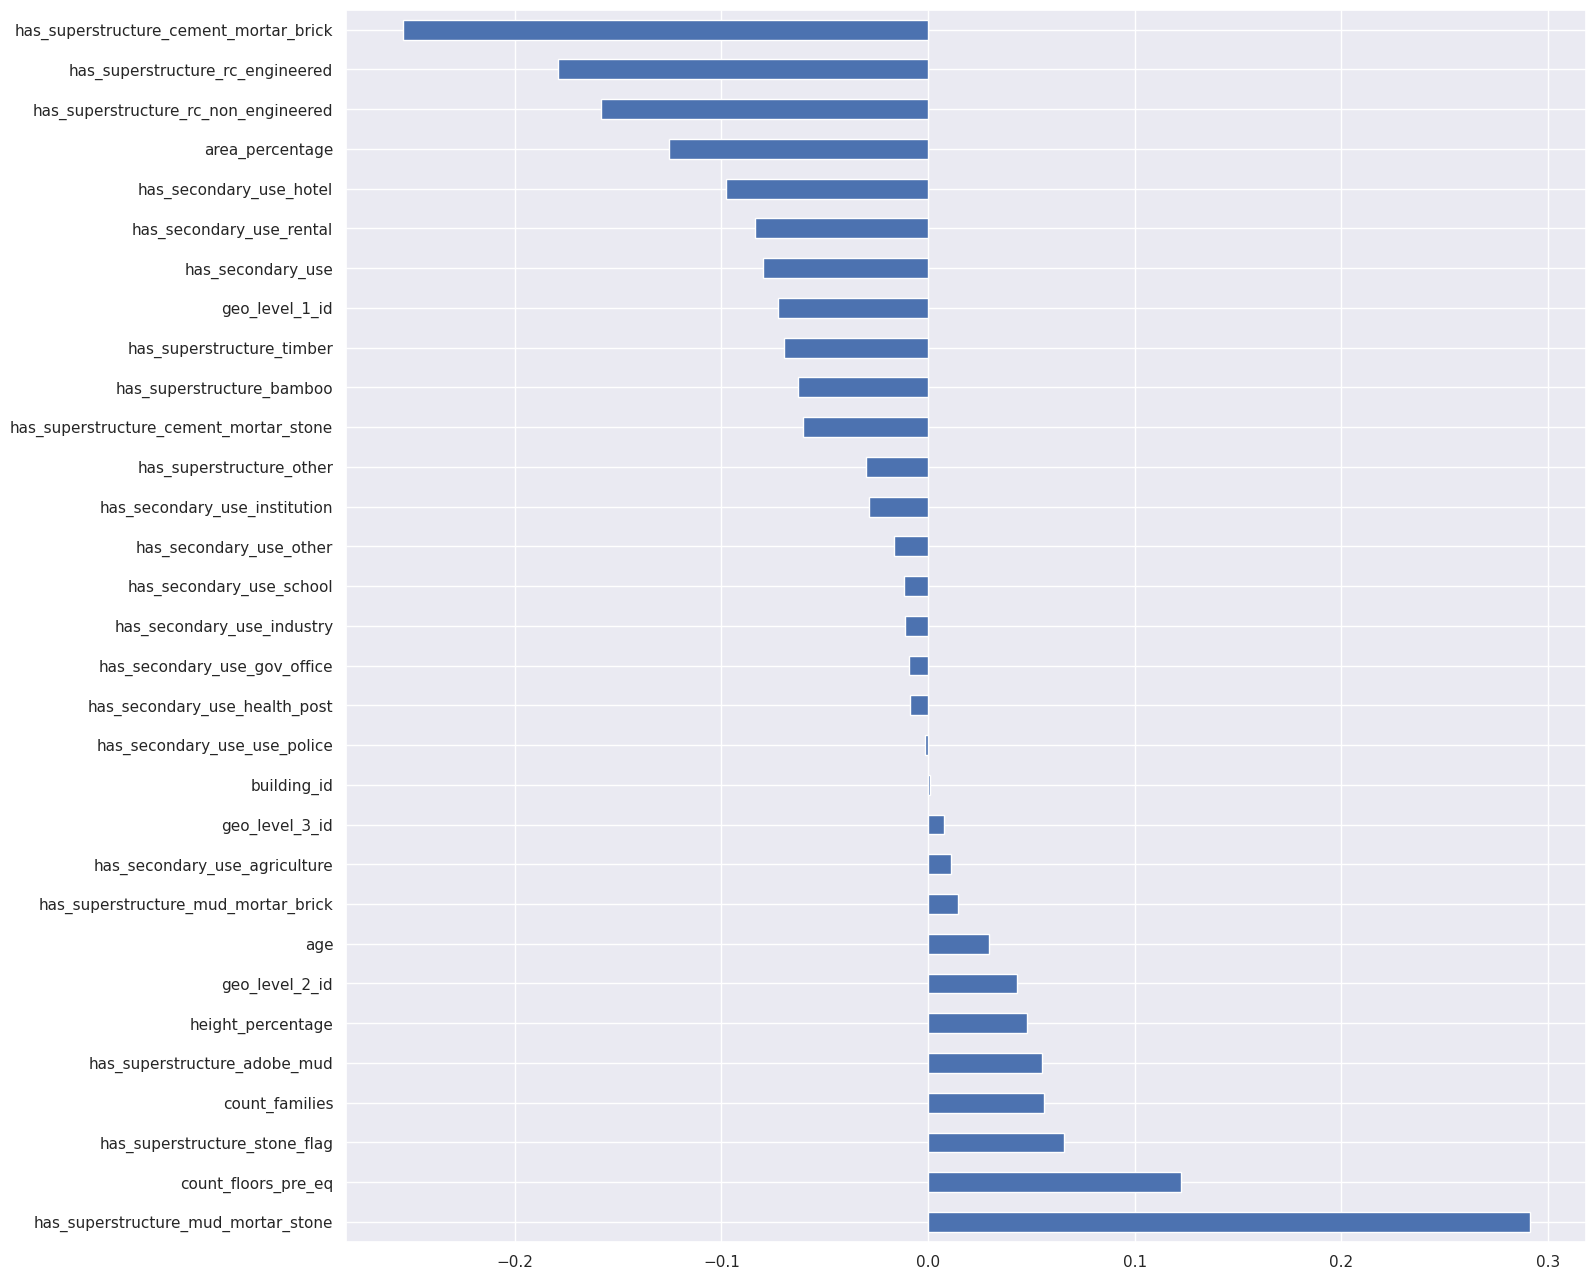

In [ ]:
plt.figure(figsize=(16,16))

corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False).plot(kind='barh')
plt.show()

In [ ]:
list_corr = corr_matrix['damage_grade'].drop('damage_grade')

In [ ]:
list_corr

building_id                               0.001063
geo_level_1_id                           -0.072347
geo_level_2_id                            0.043161
geo_level_3_id                            0.007932
count_floors_pre_eq                       0.122308
age                                       0.029273
area_percentage                          -0.125221
height_percentage                         0.048130
has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
count_families                            0.056151
has_secondary_use                        -0.079630
has_secondary_use_agriculture             0.011309
has_secondary_use_hotel                  -0.097942
has_secondary_use_rental                 -0.083754
has_secondary_use_institution            -0.028728
has_secondary_use_school                 -0.011692
has_secondary_use_industry               -0.011024
has_secondary_use_health_post            -0.008543
has_secondary_use_gov_office             -0.009378
has_secondary_use_use_police             -0.001656
has_secondary_use_other                  -0.016334
Name: damage_grade, dtype: float64

#### **Recommendation Material**

Define the features that fall under the category of material."
*   ***has_superstructure_adobe_mud***
*   ***has_superstructure_mud_mortar_stone***
*   ***has_superstructure_stone_flag***
*   ***has_superstructure_cement_mortar_stone***
*   ***has_superstructure_mud_mortar_brick***
*   ***has_superstructure_cement_mortar_brick***
*   ***has_superstructure_timber***
*   ***has_superstructure_bamboo***
*   ***has_superstructure_rc_non_engineered***
*   ***has_superstructure_rc_engineered***
*   ***has_superstructure_other***


In [ ]:
list_corr.loc[[
              'has_superstructure_adobe_mud',
              'has_superstructure_mud_mortar_stone',
              'has_superstructure_stone_flag',
              'has_superstructure_cement_mortar_stone',
              'has_superstructure_mud_mortar_brick',
              'has_superstructure_cement_mortar_brick',
              'has_superstructure_timber',
              'has_superstructure_bamboo',
              'has_superstructure_rc_non_engineered',
              'has_superstructure_rc_engineered',
              'has_superstructure_other'
              ]]

has_superstructure_adobe_mud              0.055314
has_superstructure_mud_mortar_stone       0.291325
has_superstructure_stone_flag             0.066039
has_superstructure_cement_mortar_stone   -0.060295
has_superstructure_mud_mortar_brick       0.014561
has_superstructure_cement_mortar_brick   -0.254131
has_superstructure_timber                -0.069852
has_superstructure_bamboo                -0.063051
has_superstructure_rc_non_engineered     -0.158145
has_superstructure_rc_engineered         -0.179014
has_superstructure_other                 -0.030224
Name: damage_grade, dtype: float64

- Based on the image illustrating the influence of building material features on damage levels, we will select four features that have the highest correlation with damage_grade. These four features are has_superstructure_mud_mortar_stone, has_superstructure_cement_mortar_brick, has_superstructure_rc_engineered, and has_superstructure_rc_non_engineered. Several insights were obtained from the data during the previous EDA process:

- Buildings without a Reinforced Concrete Engineered superstructure predominantly experience moderate to high levels of damage when assessed based on the distribution of the number of floors, building height, and area.
- The number of buildings using a Reinforced Concrete Non-Engineered superstructure experiences moderate levels of damage more than those using a Reinforced Concrete Engineered superstructure when viewed through the distribution of the number of floors, building height, and area.
Buildings with a Cement Mortar Brick superstructure experience lower damage levels compared to those without it.
Therefore, we can recommend building (house) characteristics with the following features:

Use a Reinforced Concrete Engineered superstructure.
Use a Cement Mortar Brick superstructure.


#### **Recommendation Characteristic**





Define the features that belong to the characteristics category

*   ***count_floors_pre_eq***
*   ***age***
*   ***area_percentage***
*   ***height_percentage***
*   ***foundation_type***
*   ***roof_type***
*   ***ground_floor_type***
*   ***other_floor_type***
*   ***position***

In [ ]:
list_corr.loc[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']]

count_floors_pre_eq    0.122308
age                    0.029273
area_percentage       -0.125221
height_percentage      0.048130
Name: damage_grade, dtype: float64

Based on the image illustrating the influence of building characteristic features on damage levels, it was found that the buildings experiencing the highest levels of damage meet the following criteria:

Buildings with two floors
Buildings aged 0-50 years
Buildings with a normalized height of 3-9 m
Buildings with a normalized area of 4-10 m²
Therefore, we can recommend building (house) characteristics with the following features:

- Buildings with one or three floors
- Buildings with a normalized height of less than 3 m or more than 9 m
- Buildings with a normalized area of less than 4 m² or more than 10 m²







## **Feature Selection**

In [ ]:
df = features.copy()
df = df.set_index('building_id')
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

### **Feature Selection for Numeric Feature**

In the previous correlation matrix, it was observed that there are two features with a high correlation level (>0.7). The correlation matrix can be used to check for multicollinearity. Multicollinearity can cause issues such as redundancy, where two features may contain similar or overlapping information. To address multicollinearity, we can either remove both features or one of them to ensure that no feature has a high correlation with another feature.

We will check between the features height_percentage and has_secondary_use_agriculture to determine which one has a higher correlation with the target damage_grade.

In [ ]:
corr_matrix.loc['height_percentage', 'damage_grade']

0.04813002366999064

In [ ]:
print(f'Correlation of the feature height_percentage with damage_grade: {corr_matrix.loc["height_percentage", "damage_grade"]:.4f}')
print(f'Correlation of the feature has_secondary_use_agriculture with damage_grade: {corr_matrix.loc["has_secondary_use_agriculture", "damage_grade"]:.4f}')


Correlation of the feature height_percentage with damage_grade: 0.0481
Correlation of the feature has_secondary_use_agriculture with damage_grade: 0.0113


Based on the correlation values above, it is evident that the feature height_percentage has a higher correlation level. Therefore, we will remove the feature has_secondary_use_agriculture.

In [ ]:
df_num = df_num.drop('has_secondary_use_agriculture', axis=1)
df_num.shape

(260601, 30)

### **Feature Selection for Categorical Feature**

The process of selecting categorical features will utilize SelectKBest. In this method, the chi-squared metric will be used, where a higher chi-squared value indicates a more significant influence of that feature.

In [ ]:
df_cat = pd.get_dummies(df_cat)
df_cat.head()

land_surface_condition_n  land_surface_condition_o  \
building_id                                                       
802906                          False                     False   
28830                           False                      True   
94947                           False                     False   
590882                          False                     False   
201944                          False                     False   

             land_surface_condition_t  foundation_type_h  foundation_type_i  \
building_id                                                                   
802906                           True              False              False   
28830                           False              False              False   
94947                            True              False              False   
590882                           True              False              False   
201944                           True              False              False   

             foundation_type_r  foundation_type_u  foundation_type_w  \
building_id                                                            
802906                    True              False              False   
28830                     True              False              False   
94947                     True              False              False   
590882                    True              False              False   
201944                    True              False              False   

             roof_type_n  roof_type_q  ...  plan_configuration_m  \
building_id                            ...                         
802906              True        False  ...                 False   
28830               True        False  ...                 False   
94947               True        False  ...                 False   
590882              True        False  ...                 False   
201944              True        False  ...                 False   

             plan_configuration_n  plan_configuration_o  plan_configuration_q  \
building_id                                                                     
802906                      False                 False                 False   
28830                       False                 False                 False   
94947                       False                 False                 False   
590882                      False                 False                 False   
201944                      False                 False                 False   

             plan_configuration_s  plan_configuration_u  \
building_id                                               
802906                      False                 False   
28830                       False                 False   
94947                       False                 False   
590882                      False                 False   
201944                      False                 False   

             legal_ownership_status_a  legal_ownership_status_r  \
building_id                                                       
802906                          False                     False   
28830                           False                     False   
94947                           False                     False   
590882                          False                     False   
201944                          False                     False   

             legal_ownership_status_v  legal_ownership_status_w  
building_id                                                      
802906                           True                     False  
28830                            True                     False  
94947                            True                     False  
590882                           True                     False  
201944                           True                     False  

[5 rows x 38 columns]

In [ ]:
df_cat.shape

(260601, 38)

In [ ]:
category_rank_feature = SelectKBest(score_func=chi2, k=38)
rank_feature = category_rank_feature.fit(df_cat, df_num['damage_grade'])
rank_feature.scores_

array([3.14202700e+02, 6.77046429e+01, 6.77640172e+01, 4.15860728e+02,
       2.79293047e+04, 6.39195232e+03, 5.49424844e+03, 8.31579458e+03,
       1.04584801e+03, 1.15697625e+03, 2.80485950e+04, 3.68489235e+03,
       9.75543604e+01, 3.24654211e+04, 6.05516649e+01, 1.22429528e+02,
       7.42291993e+03, 5.10846128e+03, 1.85494082e+04, 4.06602490e+02,
       2.59354872e+02, 1.48779877e+02, 4.93714399e+01, 6.22421247e+02,
       1.09200110e+02, 1.50572497e+02, 3.04753264e+01, 3.34305427e+00,
       1.36435198e+01, 1.65187836e+00, 5.72019260e+01, 3.23110604e+02,
       3.31565900e+01, 1.01176162e+03, 2.26362245e+03, 5.34417037e+01,
       3.96056239e+01, 2.29493063e+02])

In [ ]:
pd.DataFrame(df_cat.columns,rank_feature.scores_)

0
314.202700    land_surface_condition_n
67.704643     land_surface_condition_o
67.764017     land_surface_condition_t
415.860728           foundation_type_h
27929.304672         foundation_type_i
6391.952318          foundation_type_r
5494.248443          foundation_type_u
8315.794578          foundation_type_w
1045.848011                roof_type_n
1156.976251                roof_type_q
28048.595012               roof_type_x
3684.892346        ground_floor_type_f
97.554360          ground_floor_type_m
32465.421066       ground_floor_type_v
60.551665          ground_floor_type_x
122.429528         ground_floor_type_z
7422.919931         other_floor_type_j
5108.461280         other_floor_type_q
18549.408221        other_floor_type_s
406.602490          other_floor_type_x
259.354872                  position_j
148.779877                  position_o
49.371440                   position_s
622.421247                  position_t
109.200110        plan_configuration_a
150.572497        plan_configuration_c
30.475326         plan_configuration_d
3.343054          plan_configuration_f
13.643520         plan_configuration_m
1.651878          plan_configuration_n
57.201926         plan_configuration_o
323.110604        plan_configuration_q
33.156590         plan_configuration_s
1011.761619       plan_configuration_u
2263.622451   legal_ownership_status_a
53.441704     legal_ownership_status_r
39.605624     legal_ownership_status_v
229.493063    legal_ownership_status_w

In [ ]:
cat_score = pd.DataFrame(rank_feature.scores_, columns=['Score'])
cat_col = pd.DataFrame(df_cat.columns, columns=['Feature'])
univariate_cat_rank = pd.concat([cat_col, cat_score], axis=1)
univariate_cat_rank.set_index('Feature', inplace=True)
sorted_univariate_cat_rank = univariate_cat_rank.sort_values('Score', ascending=False)

In [ ]:
sorted_univariate_cat_rank

Score
Feature                               
ground_floor_type_v       32465.421066
roof_type_x               28048.595012
foundation_type_i         27929.304672
other_floor_type_s        18549.408221
foundation_type_w          8315.794578
other_floor_type_j         7422.919931
foundation_type_r          6391.952318
foundation_type_u          5494.248443
other_floor_type_q         5108.461280
ground_floor_type_f        3684.892346
legal_ownership_status_a   2263.622451
roof_type_q                1156.976251
roof_type_n                1045.848011
plan_configuration_u       1011.761619
position_t                  622.421247
foundation_type_h           415.860728
other_floor_type_x          406.602490
plan_configuration_q        323.110604
land_surface_condition_n    314.202700
position_j                  259.354872
legal_ownership_status_w    229.493063
plan_configuration_c        150.572497
position_o                  148.779877
ground_floor_type_z         122.429528
plan_configuration_a        109.200110
ground_floor_type_m          97.554360
land_surface_condition_t     67.764017
land_surface_condition_o     67.704643
ground_floor_type_x          60.551665
plan_configuration_o         57.201926
legal_ownership_status_r     53.441704
position_s                   49.371440
legal_ownership_status_v     39.605624
plan_configuration_s         33.156590
plan_configuration_d         30.475326
plan_configuration_m         13.643520
plan_configuration_f          3.343054
plan_configuration_n          1.651878

Select features with a chi-squared value greater than 100.

In [ ]:
chi2_greater100 = sorted_univariate_cat_rank[sorted_univariate_cat_rank['Score']>100]

In [ ]:
chi2_greater100

Score
Feature                               
ground_floor_type_v       32465.421066
roof_type_x               28048.595012
foundation_type_i         27929.304672
other_floor_type_s        18549.408221
foundation_type_w          8315.794578
other_floor_type_j         7422.919931
foundation_type_r          6391.952318
foundation_type_u          5494.248443
other_floor_type_q         5108.461280
ground_floor_type_f        3684.892346
legal_ownership_status_a   2263.622451
roof_type_q                1156.976251
roof_type_n                1045.848011
plan_configuration_u       1011.761619
position_t                  622.421247
foundation_type_h           415.860728
other_floor_type_x          406.602490
plan_configuration_q        323.110604
land_surface_condition_n    314.202700
position_j                  259.354872
legal_ownership_status_w    229.493063
plan_configuration_c        150.572497
position_o                  148.779877
ground_floor_type_z         122.429528
plan_configuration_a        109.200110

In [ ]:
chi2_greater100.shape

(25, 1)

##### **Merge Numeric and Categorical Feature**

In [ ]:
df_new = pd.concat([df_num, df_cat], axis=1)

In [ ]:
df_num.shape

(260601, 30)

In [ ]:
df_num.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'damage_grade'],
      dtype='object')

In [ ]:
df_cat.shape

(260601, 38)

In [ ]:
df_new.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
802906                    6             487           12198   
28830                     8             900            2812   
94947                    21             363            8973   
590882                   22             418           10694   
201944                   11             131            1488   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
802906                         2   30                6                  5   
28830                          2   10                8                  7   
94947                          2   10                5                  5   
590882                         2   10                6                  5   
201944                         3   30                8                  9   

             has_superstructure_adobe_mud  \
building_id                                 
802906                                  1   
28830                                   0   
94947                                   0   
590882                                  0   
201944                                  1   

             has_superstructure_mud_mortar_stone  \
building_id                                        
802906                                         1   
28830                                          1   
94947                                          1   
590882                                         1   
201944                                         0   

             has_superstructure_stone_flag  ...  plan_configuration_m  \
building_id                                 ...                         
802906                                   0  ...                 False   
28830                                    0  ...                 False   
94947                                    0  ...                 False   
590882                                   0  ...                 False   
201944                                   0  ...                 False   

             plan_configuration_n  plan_configuration_o  plan_configuration_q  \
building_id                                                                     
802906                      False                 False                 False   
28830                       False                 False                 False   
94947                       False                 False                 False   
590882                      False                 False                 False   
201944                      False                 False                 False   

             plan_configuration_s  plan_configuration_u  \
building_id                                               
802906                      False                 False   
28830                       False                 False   
94947                       False                 False   
590882                      False                 False   
201944                      False                 False   

             legal_ownership_status_a  legal_ownership_status_r  \
building_id                                                       
802906                          False                     False   
28830                           False                     False   
94947                           False                     False   
590882                          False                     False   
201944                          False                     False   

             legal_ownership_status_v  legal_ownership_status_w  
building_id                                                      
802906                           True                     False  
28830                            True                     False  
94947                            True                     False  
590882                           True                   

In [ ]:
d1=df_new.copy()

d2= df_new[list(df_num.columns)+list(chi2_greater100.index)]
d2.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'damage_grade', 'ground_floor_type_v', 'roof_type_x',
       'foundation_

## **Building Model**

### **Split Data into Train Data and Validation Data**

Separate the data into the label (target variable) and the other features. In this case, we will create a variable y to store the target variable and X to store the other features.

In [ ]:
data = df_new.copy()
y = data['damage_grade']
X = data[list(df_num.columns)+list(chi2_greater100.index)]
X.drop('damage_grade', axis=1, inplace=True)

In [ ]:
# Remapping yclasses from [1, 2, 3] to [0, 1, 2]
y = y.map({1: 0, 2: 1, 3: 2})

In [ ]:
y.unique()

array([2, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((208480, 54), (52121, 54), (208480,), (52121,))

In [ ]:
X_train.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
882292                   20             281            7097   
193569                   26             886           12157   
898082                   26              36            1125   
136982                   13            1372            4555   
742018                    8             206            6064   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
882292                         2   15                6                  7   
193569                         2   10                6                  6   
898082                         1    0                5                  3   
136982                         2   10                6                  5   
742018                         3   35                6                  5   

             has_superstructure_adobe_mud  \
building_id                                 
882292                                  0   
193569                                  0   
898082                                  0   
136982                                  0   
742018                                  0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
882292                                         1   
193569                                         0   
898082                                         0   
136982                                         1   
742018                                         1   

             has_superstructure_stone_flag  ...  foundation_type_h  \
building_id                                 ...                      
882292                                   0  ...              False   
193569                                   0  ...              False   
898082                                   0  ...              False   
136982                                   0  ...              False   
742018                                   0  ...              False   

             other_floor_type_x  plan_configuration_q  \
building_id                                             
882292                    False                 False   
193569                    False                 False   
898082                    False                 False   
136982                    False                 False   
742018                     True                 False   

             land_surface_condition_n  position_j  legal_ownership_status_w  \
building_id                                                                   
882292                          False       False                     False   
193569                          False       False                     False   
898082                           True       False                     False   
136982                          False       False                     False   
742018                          False       False                     False   

             plan_configuration_c  position_o  ground_floor_type_z  \
building_id                                                          
882292                      False       False                False   
193569                      False       False                False   
898082                      False       False                False   
136982                      False       False                False   
742018                      False       False                False   

             plan_configuration_a  
building_id                        
882292                      False  
193569                      False  
898082                      False  
136982                      False  
742018                      False  

[5 rows x 54 columns]

In [ ]:
X_test.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
315409                    6             449             484   
838451                   27             548            2513   
808750                   24             780            9035   
322968                   10             661            6346   
212418                   10            1207             276   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
315409                         2    0                9                  8   
838451                         2    0                5                  5   
808750                         3   25                4                  7   
322968                         3   30                6                  7   
212418                         2   15                5                  5   

             has_superstructure_adobe_mud  \
building_id                                 
315409                                  0   
838451                                  0   
808750                                  0   
322968                                  0   
212418                                  0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
315409                                         1   
838451                                         1   
808750                                         1   
322968                                         1   
212418                                         1   

             has_superstructure_stone_flag  ...  foundation_type_h  \
building_id                                 ...                      
315409                                   0  ...              False   
838451                                   0  ...              False   
808750                                   0  ...              False   
322968                                   0  ...              False   
212418                                   0  ...              False   

             other_floor_type_x  plan_configuration_q  \
building_id                                             
315409                    False                 False   
838451                    False                 False   
808750                    False                 False   
322968                    False                 False   
212418                    False                 False   

             land_surface_condition_n  position_j  legal_ownership_status_w  \
building_id                                                                   
315409                          False       False                     False   
838451                          False       False                     False   
808750                          False       False                     False   
322968                          False       False                     False   
212418                          False       False                     False   

             plan_configuration_c  position_o  ground_floor_type_z  \
building_id                                                          
315409                      False       False                False   
838451                      False       False                False   
808750                      False       False                False   
322968                      False       False                False   
212418                      False       False                False   

             plan_configuration_a  
building_id                        
315409                      False  
838451                      False  
808750                      False  
322968                      False  
212418                      False  

[5 rows x 54 columns]

In [ ]:
y_train.head().to_frame()

damage_grade
building_id              
882292                  0
193569                  0
898082                  0
136982                  1
742018                  2

In [ ]:
y_test.head().to_frame()

damage_grade
building_id              
315409                  1
838451                  2
808750                  1
322968                  1
212418                  2

### **Scaling Data**

In the data preprocessing stage, we will apply StandardScaler to normalize the data in the scaled_col.

In [ ]:
scaler = StandardScaler()

scaled_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
              'count_floors_pre_eq', 'age', 'area_percentage',
              'height_percentage']

X_train[scaled_col] = scaler.fit_transform(X_train[scaled_col])
X_test[scaled_col] = scaler.transform(X_test[scaled_col])

In [ ]:
X_train.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'ground_floor_type_v', 'roof_type_x', 'foundation_type_i',
       'other_

In [ ]:
X_train.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
882292             0.758641       -1.019753        0.228478   
193569             1.505643        0.446238        1.615688   
898082             1.505643       -1.613419       -1.408759   
136982            -0.112861        1.623877       -0.468417   
742018            -0.735362       -1.201487       -0.054721   

             count_floors_pre_eq       age  area_percentage  \
building_id                                                   
882292                 -0.178354 -0.156363        -0.461464   
193569                 -0.178354 -0.224906        -0.461464   
898082                 -1.556477 -0.361991        -0.690498   
136982                 -0.178354 -0.224906        -0.461464   
742018                  1.199770  0.117809        -0.461464   

             height_percentage  has_superstructure_adobe_mud  \
building_id                                                    
882292                0.817733                             0   
193569                0.295711                             0   
898082               -1.270355                             0   
136982               -0.226311                             0   
742018               -0.226311                             0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
882292                                         1   
193569                                         0   
898082                                         0   
136982                                         1   
742018                                         1   

             has_superstructure_stone_flag  ...  foundation_type_h  \
building_id                                 ...                      
882292                                   0  ...              False   
193569                                   0  ...              False   
898082                                   0  ...              False   
136982                                   0  ...              False   
742018                                   0  ...              False   

             other_floor_type_x  plan_configuration_q  \
building_id                                             
882292                    False                 False   
193569                    False                 False   
898082                    False                 False   
136982                    False                 False   
742018                     True                 False   

             land_surface_condition_n  position_j  legal_ownership_status_w  \
building_id                                                                   
882292                          False       False                     False   
193569                          False       False                     False   
898082                           True       False                     False   
136982                          False       False                     False   
742018                          False       False                     False   

             plan_configuration_c  position_o  ground_floor_type_z  \
building_id                                                          
882292                      False       False                False   
193569                      False       False                False   
898082                      False       False                False   
136982                      False       False                False   
742018                      False       False                False   

             plan_configuration_a  
building_id                        
882292                      False  
193569                      False  
898082                      False  
136982                      False  
742018                      False  

[5 rows x 54 columns]

In [ ]:
X_test.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
315409            -0.984363       -0.612668       -1.584491   
838451             1.630143       -0.372778       -1.028236   
808750             1.256643        0.189387        0.759785   
322968            -0.486362       -0.098965        0.022590   
212418            -0.486362        1.224061       -1.641514   

             count_floors_pre_eq       age  area_percentage  \
building_id                                                   
315409                 -0.178354 -0.361991         0.225640   
838451                 -0.178354 -0.361991        -0.690498   
808750                  1.199770 -0.019277        -0.919532   
322968                  1.199770  0.049266        -0.461464   
212418                 -0.178354 -0.156363        -0.690498   

             height_percentage  has_superstructure_adobe_mud  \
building_id                                                    
315409                1.339754                             0   
838451               -0.226311                             0   
808750                0.817733                             0   
322968                0.817733                             0   
212418               -0.226311                             0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
315409                                         1   
838451                                         1   
808750                                         1   
322968                                         1   
212418                                         1   

             has_superstructure_stone_flag  ...  foundation_type_h  \
building_id                                 ...                      
315409                                   0  ...              False   
838451                                   0  ...              False   
808750                                   0  ...              False   
322968                                   0  ...              False   
212418                                   0  ...              False   

             other_floor_type_x  plan_configuration_q  \
building_id                                             
315409                    False                 False   
838451                    False                 False   
808750                    False                 False   
322968                    False                 False   
212418                    False                 False   

             land_surface_condition_n  position_j  legal_ownership_status_w  \
building_id                                                                   
315409                          False       False                     False   
838451                          False       False                     False   
808750                          False       False                     False   
322968                          False       False                     False   
212418                          False       False                     False   

             plan_configuration_c  position_o  ground_floor_type_z  \
building_id                                                          
315409                      False       False                False   
838451                      False       False                False   
808750                      False       False                False   
322968                      False       False                False   
212418                      False       False                False   

             plan_configuration_a  
building_id                        
315409                      False  
838451                      False  
808750                      False  
322968                      False  
212418                      False  

[5 rows x 54 columns]

### **Using Cross Validation**

In comparing the performance of several machine learning algorithms to be tested, we will use the F1 Score Micro metric. The reason for using the F1 Score as a metric is that we want to create a machine learning model that can maximize both Precision and Recall. The metrics Precision and Recall are considered important because the values of FN (False Negative) and FP (False Positive) are critical factors. Additionally, the F1 Score is regarded as more effective when dealing with imbalanced classes.

The Micro approach is chosen because we want to first calculate the sum of all TP (True Positive), FP (False Positive), and FN (False Negative) across all classes in the target variable.

**Define a function to create confusion matrix**

In [ ]:
def make_confusion_matrix(pred, title):
    cam = confusion_matrix(y_test, pred)
    sns.heatmap(cam, annot=True, cmap='viridis',
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'],
                fmt="d")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Using {} Algorithm'.format(title))
    plt.show()

### **1. Logistic Regression**

In [ ]:
model_cv_1 = LogisticRegression(random_state=0)
kfold = KFold(n_splits=10)
scores_1 = cross_val_score(model_cv_1, X_train, y_train, scoring="f1_micro", cv=kfold)
result_1 = scores_1.mean()
print('Average F1 Score (Micro) for Logistic Algorithm is : {}'.format(result_1))

Average F1 Score (Micro) for Logistic Algorithm is : 0.5911790099769763


### **2. Decision Tree Classifier**

In [ ]:
model_cv_2 = DecisionTreeClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_2 = cross_val_score(model_cv_2, X_train, y_train, scoring="f1_micro", cv=kfold)
result_2 = scores_2.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_2))

Average F1 Score (Micro) for Decision Tree is : 0.6576026477359939


### **3. K-Nearest Neighbors**

In [ ]:
model_cv_3 = KNeighborsClassifier()
kfold = KFold(n_splits=10)
scores_3 = cross_val_score(model_cv_3, X_train, y_train, scoring="f1_micro", cv=kfold)
result_3 = scores_3.mean()
print('Average F1 Score (Micro) for K-Nearest Neighbors is : {}'.format(result_3))

Average F1 Score (Micro) for K-Nearest Neighbors is : 0.6559717958557176


### **4. Linear Discriminant Analysis**

In [ ]:
model_cv_4 = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=10)
scores_4 = cross_val_score(model_cv_4, X_train, y_train, scoring="f1_micro", cv=kfold)
result_4 = scores_4.mean()
print('Average F1 Score (Micro) for Linear Discriminant Analysis is : {}'.format(result_4))

Average F1 Score (Micro) for Linear Discriminant Analysis is : 0.5867661166538757


### **5. Naive Bayes**

In [ ]:
model_cv_5 = GaussianNB()
kfold = KFold(n_splits=10)
scores_5 = cross_val_score(model_cv_5, X_train, y_train, scoring="f1_micro", cv=kfold)
result_5 = scores_5.mean()
print('Average F1 Score (Micro) for Naive Bayes is : {}'.format(result_5))

Average F1 Score (Micro) for Naive Bayes is : 0.430962202609363


### **6. Extreme Gradient Boosting**

In [ ]:
model_cv_6 = XGBClassifier(verbosity=0)
kfold = KFold(n_splits=10)
scores_6 = cross_val_score(model_cv_6, X_train, y_train, scoring="f1_micro", cv=kfold)
result_6 = scores_6.mean()
print('Average F1 Score (Micro) for Extreme Gradient Boosting is : {}'.format(result_6))

Average F1 Score (Micro) for Extreme Gradient Boosting is : 0.7245539140445126


### **7. Random Forest Classifier**

In [ ]:
model_cv_7 = RandomForestClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_7 = cross_val_score(model_cv_7, X_train, y_train, scoring="f1_micro", cv=kfold)
result_7 = scores_7.mean()
print('Average F1 Score (Micro) for Random Forest is : {}'.format(result_7))

Average F1 Score (Micro) for Random Forest is : 0.7145577513430544


### **Fit and Predict Several Algorithm**

#### **1. Logistic Regression**

              precision    recall  f1-score   support

           0       0.57      0.30      0.39      4979
           1       0.60      0.88      0.71     29703
           2       0.55      0.20      0.29     17439

    accuracy                           0.59     52121
   macro avg       0.58      0.46      0.47     52121
weighted avg       0.58      0.59      0.54     52121



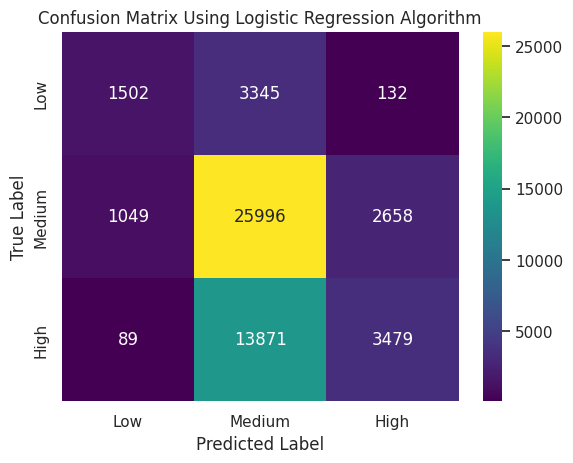

Train F1 Score (Micro) for Logistic Regression Algorithm is : 0.5915291634689179
Test F1 Score (Micro) for Logistic Regression Algorithm is : 0.5943285815698087


In [ ]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)
train_pred_1 = model_1.predict(X_train)

print(classification_report(y_test, pred_1))
make_confusion_matrix(pred_1, 'Logistic Regression')
train_score_1 = f1_score(y_train, train_pred_1, average='micro')
score_1 = f1_score(y_test, pred_1, average='micro')
print('Train F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(score_1))

with open('model_1', 'wb') as files:
    pickle.dump(model_1, files)

### **3. Decision Tree Classifier**

In [ ]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)
train_pred_2 = model_2.predict(X_train)

print(classification_report(y_test, pred_2))
#make_confusion_matrix(pred_2, 'Decision Tree')
train_score_2 = f1_score(y_train, train_pred_2, average='micro')
score_2 = f1_score(y_test, pred_2, average='micro')
print('Train F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(train_score_2))
print('Test F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(score_2))

with open('model_2', 'wb') as files:
    pickle.dump(model_2, files)

              precision    recall  f1-score   support

           0       0.48      0.51      0.50      4979
           1       0.71      0.71      0.71     29703
           2       0.62      0.62      0.62     17439

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

Train F1 Score (Micro) for Decision Tree Algorithm is : 0.9864207597851112
Test F1 Score (Micro) for Decision Tree Algorithm is : 0.6595614051917653


### **4. K-Nearest Neighbors Classifier**

In [ ]:
model_3 = KNeighborsClassifier()
model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)
train_pred_3 = model_3.predict(X_train)

print(classification_report(y_test, pred_3))
#make_confusion_matrix(pred_3, 'K-Nearest Neighbors')
train_score_3 = f1_score(y_train, train_pred_3, average='micro')
score_3 = f1_score(y_test, pred_3, average='micro')
print('Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : {}'.format(train_score_3))
print('Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : {}'.format(score_3))

with open('model_3', 'wb') as files:
    pickle.dump(model_3, files)

              precision    recall  f1-score   support

           0       0.52      0.46      0.49      4979
           1       0.69      0.75      0.72     29703
           2       0.63      0.56      0.59     17439

    accuracy                           0.66     52121
   macro avg       0.61      0.59      0.60     52121
weighted avg       0.65      0.66      0.66     52121

Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.7661022640061397
Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.6590241937031139


### **5. Linear Discriminant Analysis**

In [ ]:
model_4 = LinearDiscriminantAnalysis()
model_4.fit(X_train, y_train)
pred_4 = model_4.predict(X_test)
train_pred_4 = model_4.predict(X_train)

print(classification_report(y_test, pred_4))
#make_confusion_matrix(pred_4, 'Linear Discriminant Analysis')
train_score_4 = f1_score(y_train, train_pred_4, average='micro')
score_4 = f1_score(y_test, pred_4, average='micro')
print('Train F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : {}'.format(train_score_4))
print('Test F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : {}'.format(score_4))

with open('model_4', 'wb') as files:
    pickle.dump(model_4, files)

              precision    recall  f1-score   support

           0       0.49      0.50      0.50      4979
           1       0.60      0.85      0.70     29703
           2       0.57      0.18      0.27     17439

    accuracy                           0.59     52121
   macro avg       0.55      0.51      0.49     52121
weighted avg       0.58      0.59      0.54     52121

Train F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : 0.587212202609363
Test F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : 0.5883233245716698


### **6. Naive Bayes**

In [ ]:
model_5 = GaussianNB()
model_5.fit(X_train, y_train)
pred_5 = model_5.predict(X_test)
train_pred_5 = model_5.predict(X_train)

print(classification_report(y_test, pred_5))
#make_confusion_matrix(pred_5, 'Naive Bayes')
train_score_5 = f1_score(y_train, train_pred_5, average='micro')
score_5 = f1_score(y_test, pred_5, average='micro')
print('Train F1 Score (Micro) for Naive Bayes Algorithm is : {}'.format(train_score_5))
print('Test F1 Score (Micro) for Naive Bayes Algorithm is : {}'.format(score_5))

with open('model_5', 'wb') as files:
    pickle.dump(model_5, files)

              precision    recall  f1-score   support

           0       0.39      0.52      0.45      4979
           1       0.66      0.15      0.25     29703
           2       0.40      0.88      0.55     17439

    accuracy                           0.43     52121
   macro avg       0.49      0.52      0.42     52121
weighted avg       0.55      0.43      0.37     52121

Train F1 Score (Micro) for Naive Bayes Algorithm is : 0.43118284727551803
Test F1 Score (Micro) for Naive Bayes Algorithm is : 0.4337982770860114


### **7. Extreme Gradient Boosting**

In [ ]:
model_6 = XGBClassifier(verbosity=0, tree_method='hist')
model_6.fit(X_train, y_train)
pred_6 = model_6.predict(X_test)
train_pred_6 = model_6.predict(X_train)

print(classification_report(y_test, pred_6))
#make_confusion_matrix(pred_6, 'Extreme Gradient Boosting')
train_score_6 = f1_score(y_train, train_pred_6, average='micro')
score_6 = f1_score(y_test, pred_6, average='micro')
print('Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(train_score_6))
print('Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(score_6))

with open('model_6', 'wb') as files:
    pickle.dump(model_6, files)

              precision    recall  f1-score   support

           0       0.69      0.45      0.54      4979
           1       0.72      0.85      0.78     29703
           2       0.75      0.58      0.66     17439

    accuracy                           0.72     52121
   macro avg       0.72      0.63      0.66     52121
weighted avg       0.73      0.72      0.72     52121

Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.7436588641596317
Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.7246407398169644


#### **8. Random Forest Classifier**

In [ ]:
model_7 = RandomForestClassifier(random_state=0)
model_7.fit(X_train, y_train)
pred_7 = model_7.predict(X_test)
train_pred_7 = model_7.predict(X_train)

print(classification_report(y_test, pred_7))
#make_confusion_matrix(pred_7, 'Random Forest')
train_score_7 = f1_score(y_train, train_pred_7, average='micro')
score_7 = f1_score(y_test, pred_7, average='micro')
print('Train F1 Score (Micro) for Random Forest Algorithm is : {}'.format(train_score_7))
print('Test F1 Score (Micro) for Random Forest Algorithm is : {}'.format(score_7))

with open('model_7', 'wb') as files:
    pickle.dump(model_7, files)

              precision    recall  f1-score   support

           0       0.64      0.47      0.54      4979
           1       0.72      0.83      0.77     29703
           2       0.72      0.59      0.65     17439

    accuracy                           0.71     52121
   macro avg       0.69      0.63      0.65     52121
weighted avg       0.71      0.71      0.71     52121

Train F1 Score (Micro) for Random Forest Algorithm is : 0.9864111665387567
Test F1 Score (Micro) for Random Forest Algorithm is : 0.7142418602866407


### **Comparing Algorithm**

In [ ]:
names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Linear Discriminant Analysis',
         'Naive Bayes', 'Extreme Gradient Boosting', 'Random Forest']
cv_score_f1 = [result_1, result_2, result_3, result_4, result_5, result_6, result_7]
train_score_f1 = [train_score_1, train_score_2, train_score_3, train_score_4, train_score_5, train_score_6, train_score_7]
score_f1 = [score_1, score_2, score_3, score_4, score_5, score_6, score_7]

In [ ]:
compare = pd.DataFrame()
compare['Algorithm'] = names
compare['CV F1 Score'] = cv_score_f1
compare['F1 Score (Train)'] = train_score_f1
compare['F1 Score (Test)'] = score_f1
compare

Algorithm  CV F1 Score  F1 Score (Train)  \
0           Logistic Regression     0.591179          0.591529   
1                 Decision Tree     0.657603          0.986421   
2           K-Nearest Neighbors     0.655972          0.766102   
3  Linear Discriminant Analysis     0.586766          0.587212   
4                   Naive Bayes     0.430962          0.431183   
5     Extreme Gradient Boosting     0.724554          0.743659   
6                 Random Forest     0.714558          0.986411   

   F1 Score (Test)  
0         0.594329  
1         0.659561  
2         0.659024  
3         0.588323  
4         0.433798  
5         0.724641  
6         0.714242

Using 7 machine learning algorithms with random_state = 0, we observe that the Random Forest Algorithm and Extreme Gradient Boosting are the two algorithms that provide the highest F1 Score when tested on the test data (Validation Data).

## **Hyperparameter Tuning**

We identified two algorithms that produced the highest F1 Scores: Extreme Gradient Boosting and Random Forest. Therefore, we will conduct Hyperparameter Tuning on these two algorithms. The hyperparameter tuning process can be done using either GridSearchCV or RandomizedCV. For this case, we will use RandomizedCV.








### **Extreme Gradient Boosting Parameter Tuning**

In [ ]:
xgb_params = {'n_estimators':range(50, 201, 50),
              'max_depth': range(3, 15)}
xgb_model = XGBClassifier(tree_method="hist", verbosity=0)
kfold = KFold(n_splits=4)
rscv_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, n_iter=5,
                              scoring='f1_micro', cv=kfold, random_state=0, n_jobs=-1)

rscv_xgb.fit(X,y)
print("Optimal hyperparameter combination for XGBClassifier:", rscv_xgb.best_params_)
print()
print("Mean cross-validated training accuracy score:", rscv_xgb.best_score_)

with open('rscv_xgb', 'wb') as files:
    pickle.dump(rscv_xgb, files)

Optimal hyperparameter combination for XGBClassifier: {'n_estimators': 150, 'max_depth': 10}

Mean cross-validated training accuracy score: 0.7409910234743298


### **Random Forest Parameter Tuning**

In [ ]:
params = {'n_estimators': range(50, 251, 50),
          'max_depth': range(15, 30),
          'max_features': ['sqrt', 'log2', None]}

rf_model = RandomForestClassifier(random_state=0)
kfold = KFold(n_splits=4)
rscv_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=params, n_iter=5,
                             scoring='f1_micro', cv=kfold, random_state=0, n_jobs=-1)

rscv_rf.fit(X,y)
print("Optimal hyperparameter combination for RandomForestClassifier:", rscv_rf.best_params_)
print()
print("Mean cross-validated training accuracy score:", rscv_rf.best_score_)

with open('rscv_rf', 'wb') as files:
    pickle.dump(rscv_rf, files)

Optimal hyperparameter combination for RandomForestClassifier: {'n_estimators': 100, 'max_features': None, 'max_depth': 21}

Mean cross-validated training accuracy score: 0.7339687866382026


### **Build Model With Parameter Tuning**

#### **Extreme Gradient Boosting**

In [ ]:
tuning_xgb_model = XGBClassifier(n_estimators=150, max_depth=10, verbosity=0, tree_method="hist")
tuning_xgb_model.fit(X_train,y_train)
pred_xgb = tuning_xgb_model.predict(X_test)
train_pred_xgb = tuning_xgb_model.predict(X_train)
print('F1 Score (Micro) on Training Data :', f1_score(y_train, train_pred_xgb, average='micro'))
print('F1 Score (Micro) on Testing Data :', f1_score(y_test, pred_xgb, average='micro'))

with open('tuning_xgb_model', 'wb') as files:
    pickle.dump(tuning_xgb_model, files)

F1 Score (Micro) on Training Data : 0.8559861857252494
F1 Score (Micro) on Testing Data : 0.7427524414343547


#### **Random Forest Classifier**

In [ ]:
tuning_rf_model = RandomForestClassifier(n_estimators=100, max_features=None, max_depth=21, random_state=0)
tuning_rf_model.fit(X_train,y_train)
pred_rf = tuning_rf_model.predict(X_test)
train_pred_rf = tuning_rf_model.predict(X_train)
print('F1 Score (Micro) on Training Data :', f1_score(y_train, train_pred_rf, average='micro'))
print('F1 Score (Micro) on Testing Data :', f1_score(y_test, pred_rf, average='micro'))

with open('tuning_rf_model', 'wb') as files:
    pickle.dump(tuning_rf_model, files)

F1 Score (Micro) on Training Data : 0.8994675748273215
F1 Score (Micro) on Testing Data : 0.7350204332226934


### **Feature Importance**

#### **Extreme Gradient Boosting**

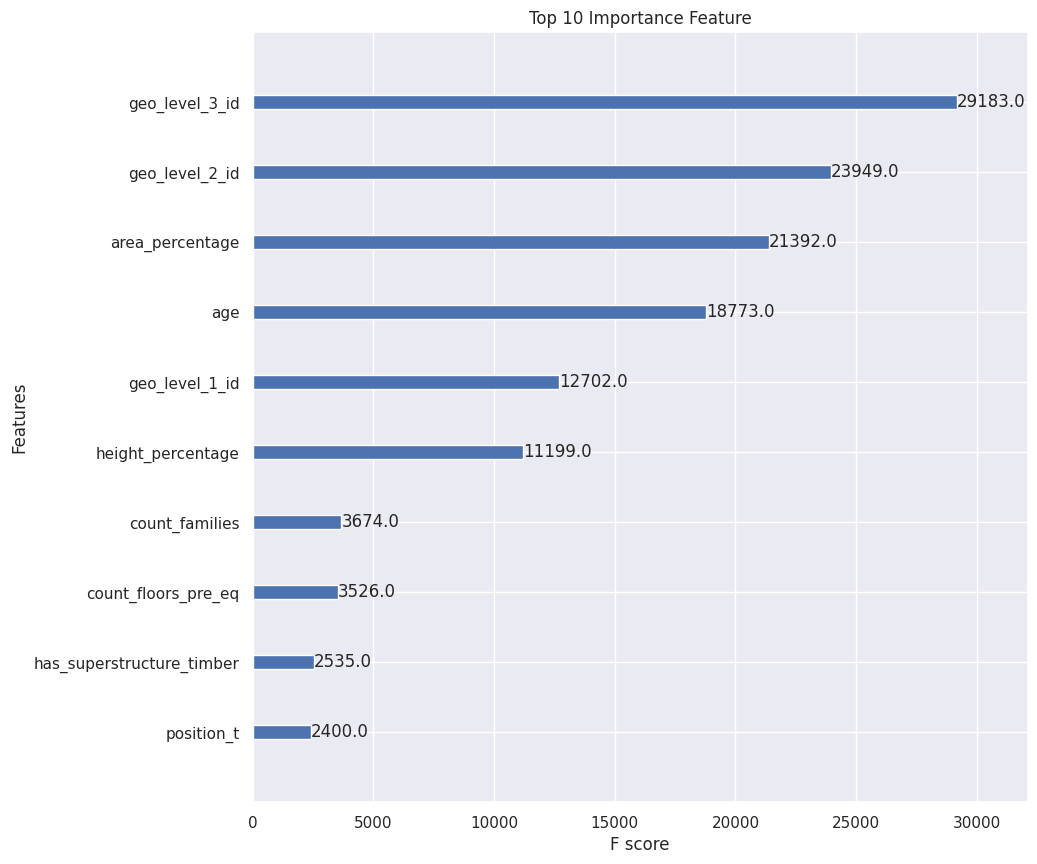

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plot_importance(tuning_xgb_model, max_num_features=10, ax=ax)
plt.title('Top 10 Importance Feature')
plt.show()

Using Extreme Gradient Boosting, the 10 most important features in the model are:

*   geo_level_3_id
*   geo_level_2_id
*   area_percentage
*   age
*   geo_level_1_id
*   height_percentage
*   count_families
*   count_floors_pre_eq
*   has_superstructure_timber
*   position_t


#### **Random Forest Classifier**

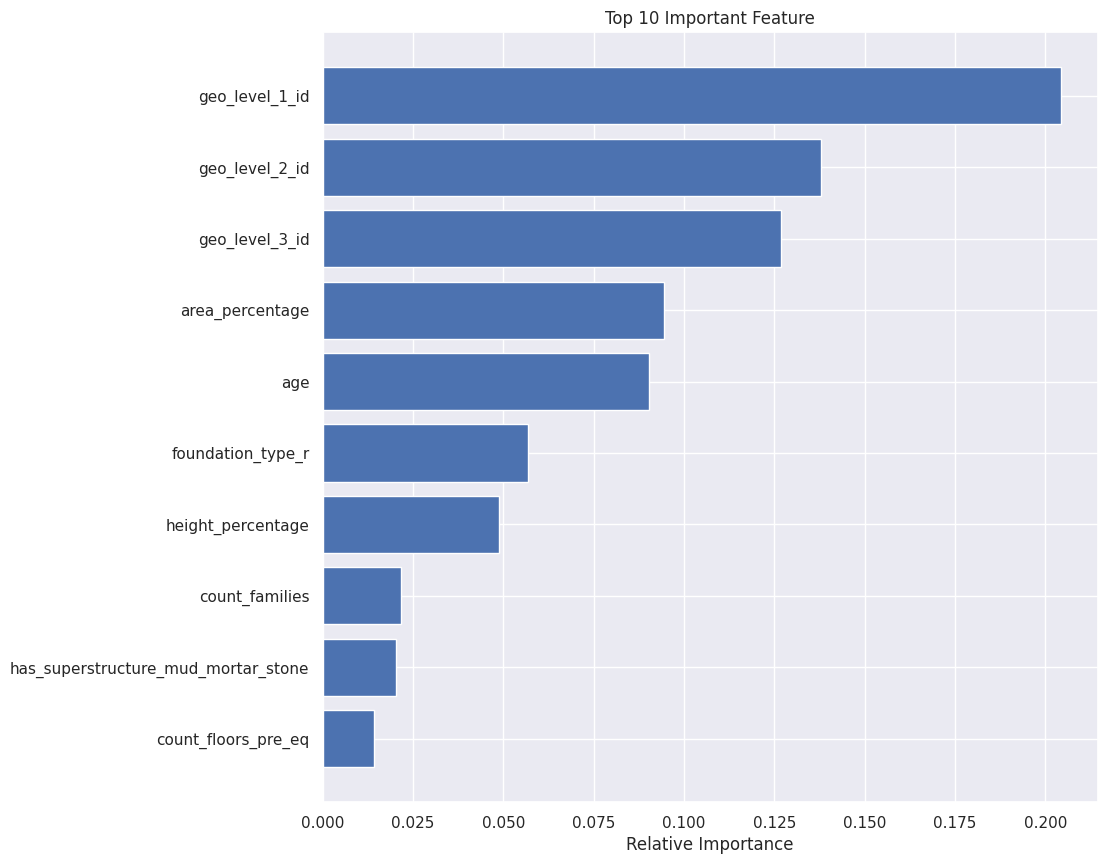

In [ ]:
features = X.columns
importances = tuning_rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices[-10:])), importances[indices][-10:], color='b', align='center')
plt.yticks(range(len(indices[-10:])), features[indices][-10:])
plt.xlabel('Relative Importance')
plt.title('Top 10 Important Feature')
plt.show()

Using Random Forest, the 10 most important features in the model are:
*   geo_level_1_id
*   geo_level_2_id
*   geo_level_3_id
*   area_percentage
*   age
*   foundation_type_r
*   height_percentage
*   count_families
*   has_superstructure_mud_mortar_stone
*   count_floors_pre_eq

## **Final Model**

After performing hyperparameter tuning for Extreme Gradient Boosting and Random Forest, we obtained F1 scores for both models on the training data and validation data. The Extreme Gradient Boosting model appears to be more stable, with F1 scores on the training data and validation data ranging from 85.6% to 74.3%. In contrast, the Random Forest model has an F1 score of 89.9% on the training data and 73.5% on the validation data. Therefore, for the final model, we will use Extreme Gradient Boosting to predict the test data.






.

In [ ]:
def final_confusion_matrix(pred, title):
    cam = confusion_matrix(y, pred)
    sns.heatmap(cam, annot=True, cmap='viridis',
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'],
                fmt="d")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Using {} Algorithm'.format(title))
    plt.show()

In [ ]:
scaler_final = StandardScaler()
scaled_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
              'count_floors_pre_eq', 'age', 'area_percentage',
              'height_percentage']
X[scaled_col] = scaler_final.fit_transform(X[scaled_col])

F1 Score (Micro) on Training Data : 0.844904662683566
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.76      0.82     25124
           1       0.83      0.92      0.87    148259
           2       0.86      0.75      0.80     87218

    accuracy                           0.84    260601
   macro avg       0.86      0.81      0.83    260601
weighted avg       0.85      0.84      0.84    260601



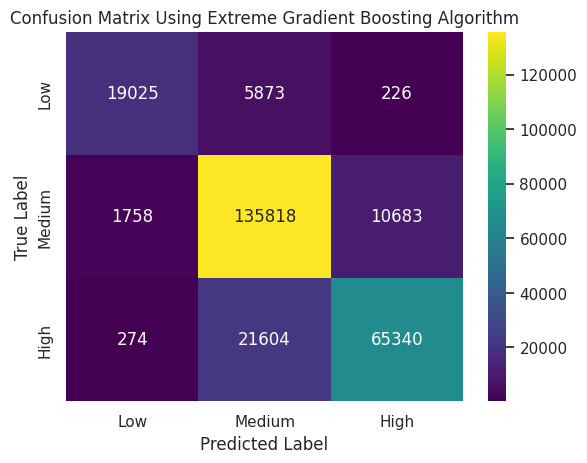

In [ ]:
xgfinal = XGBClassifier(n_estimators=150, max_depth=10, verbosity=0, tree_method="hist")
xgfinal.fit(X, y)
pred_final_model = xgfinal.predict(X)
print('F1 Score (Micro) on Training Data :', f1_score(y, pred_final_model, average='micro'))
print('Classification report: \n',classification_report(y, pred_final_model))
final_confusion_matrix(pred_final_model, 'Extreme Gradient Boosting')

with open('xgfinal', 'wb') as files:
    pickle.dump(xgfinal, files)

In [ ]:
X_train.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other',
       'ground_floor_type_v', 'roof_type_x', 'foundation_type_i',
       'other_

In [ ]:
y_train.head()

building_id
882292    0
193569    0
898082    0
136982    1
742018    2
Name: damage_grade, dtype: int64

## **Predict on Unseen Data**

Now, we will predict the damage levels for the buildings in the test data.

In [ ]:
pred_testing_data = xgfinal.predict(X_test)

In [ ]:
final = pd.DataFrame()
final['building_id'] = X_test.index
final['damage_grade'] = pred_testing_data

In [ ]:
final

building_id  damage_grade
0           315409             1
1           838451             1
2           808750             1
3           322968             1
4           212418             1
...            ...           ...
52116        62808             1
52117       756596             1
52118       574520             1
52119       575825             0
52120       851515             1

[52121 rows x 2 columns]

The prediction results, which represent the damage levels of the buildings, will be saved into a CSV file.

In [ ]:
final.to_csv('Damage Grade Prediction.csv', index=False)

# **Conclusion**

**Damage Overview:** The 2015 Nepal earthquake caused significant damage to buildings, with the majority (56.89%) experiencing medium damage, followed by high damage (33.47%) and low damage (9.64%). The severity of damage tends to become more uniform with an increase in geographical levels, suggesting that location plays a substantial role in determining damage patterns.

**Building Characteristics for Reduced Damage:** Specific building features help minimize earthquake impact:

- Use of reinforced concrete or cement mortar brick superstructures.
- Buildings with either 1 or 3 floors.
- Structures with a height below 3 meters or above 9 meters.
- Buildings with a footprint area smaller than 4 square meters or larger than 10 square meters. These characteristics are recommended for enhancing resilience against earthquakes.

**Predictive Model Performance:** Machine learning techniques, particularly the Extreme Gradient Boosting model, proved effective in predicting building damage. This model, configured with an F1 Score of 74%, identified the top contributing features as geographical location identifiers, building area and height, and other structural factors such as age and family count. These findings reinforce that geographical location (proximity to the epicenter) and structural specifications are pivotal in assessing earthquake risk and potential damage.